#Install library

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 6.9 MB/s 


In [ ]:
from livelossplot import PlotLossesKerasTF

#Import library

In [ ]:
#Import the necessary library

import matplotlib.pyplot as plt
import pandas as pd
import re
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
# import required libraries
import os
import sys
from PIL import Image
import numpy as np

In [ ]:
from tensorflow.keras import Input, Model, layers
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, MaxPool2D, Flatten, Rescaling
from tensorflow.keras.layers import Layer

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.model_selection import train_test_split

#HTML link image

In [ ]:
html_div_txt = ''' <div class="MosaicGrid-module__grid___FkDSh"><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/an-aerial-view-of-florence-italy-and-florence-cathedral-gm1205752676-347464482" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/an-aerial-view-of-florence-italy-and-florence-cathedral-picture-id1205752676?k=20&amp;m=1205752676&amp;s=612x612&amp;w=0&amp;h=Hn070U4SxWAZpvq183L-JaZuu0Mi7wsA4eMG8USx9G8=" alt="An aerial view of Florence, Italy and Florence Cathedral"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/drone-view-of-zemun-belgrade-serbia-gm1410470892-460656114" data-max-width="612" data-max-height="344" style="--width:612; --height:344;"><img src="https://media.istockphoto.com/photos/drone-view-of-zemun-belgrade-serbia-picture-id1410470892?k=20&amp;m=1410470892&amp;s=612x612&amp;w=0&amp;h=Gihen9hcFwDlTuZp5PfIO1fk8lDYMSBBlGKk5-tGk2A=" alt="Drone view of Zemun, Belgrade, Serbia."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunset-over-the-old-town-gm1187412985-335409560" data-max-width="612" data-max-height="288" style="--width:612; --height:288;"><img src="https://media.istockphoto.com/photos/sunset-over-the-old-town-picture-id1187412985?k=20&amp;m=1187412985&amp;s=612x612&amp;w=0&amp;h=VBW-YFM2DRpSv4C5g1TeqPwOJ450m6rdmaKmUolh7Ak=" alt="Sunset over the old town"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-over-the-temples-of-chaiyaphum-in-thailand-to-the-surrounding-mountains-at-gm1297003884-390256011" data-max-width="612" data-max-height="344" style="--width:612; --height:344;"><img src="https://media.istockphoto.com/photos/view-over-the-temples-of-chaiyaphum-in-thailand-to-the-surrounding-picture-id1297003884?k=20&amp;m=1297003884&amp;s=612x612&amp;w=0&amp;h=yHEybpX2YzLOfU0_Oeg32CGyzhzbYeD6NSEcqRsXUS0=" alt="View over the temples of Chaiyaphum in Thailand to the surrounding mountains at sunset"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunset-over-florence-italy-gm1157593714-315916879" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/sunset-over-florence-italy-picture-id1157593714?k=20&amp;m=1157593714&amp;s=612x612&amp;w=0&amp;h=ny02hfxc4nHXQHAG8Yyvj-16VaLCRz4ZIm-x-AOWNek=" alt="Sunset over Florence, Italy"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/magic-sunset-over-florence-gm1038552908-277986288" data-max-width="612" data-max-height="305" style="--width:612; --height:305;"><img src="https://media.istockphoto.com/photos/magic-sunset-over-florence-picture-id1038552908?k=20&amp;m=1038552908&amp;s=612x612&amp;w=0&amp;h=yeQIvjfMjc_LGC-KnCarWOd4pRfFLf8C_udJL6ttGps=" alt="Magic sunset over Florence"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/nice-sunset-from-the-heights-of-the-city-of-madrid-gm1137342242-303262786" data-max-width="408" data-max-height="612" style="--width:408; --height:612;"><img src="https://media.istockphoto.com/photos/nice-sunset-from-the-heights-of-the-city-of-madrid-picture-id1137342242?k=20&amp;m=1137342242&amp;s=612x612&amp;w=0&amp;h=j47nuk7kcj8ZYcFDxSOb7grnl2P6SBlQ-Nxn4ObO0Fw=" alt="Nice sunset from the heights of the city of Madrid"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/mosque-through-the-sunset-qasimi-mosque-view-from-the-roof-in-nuba-village-at-hebron-gm1272863211-375012838" data-max-width="612" data-max-height="411" style="--width:612; --height:411;"><img src="https://media.istockphoto.com/photos/mosque-through-the-sunset-qasimi-mosque-view-from-the-roof-in-nuba-picture-id1272863211?k=20&amp;m=1272863211&amp;s=612x612&amp;w=0&amp;h=HKpA6LBMdCTGevc4pqFhD5NN_Ra5f9Ijep43OPNa7IY=" alt="Mosque Through the Sunset. Qasimi Mosque view from the roof in Nuba village at Hebron, Palestine . HDR Mosque"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/aerial-view-of-sunset-above-european-city-gm1170236115-323747786" data-max-width="612" data-max-height="612" style="--width:612; --height:612;"><img src="https://media.istockphoto.com/photos/aerial-view-of-sunset-above-european-city-picture-id1170236115?k=20&amp;m=1170236115&amp;s=612x612&amp;w=0&amp;h=VnRVcJD5fCHWfl05xx7514-gukN8hpa8xbMeJQsdKOc=" alt="aerial view of sunset above european city"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-of-bratislava-st-martins-cathedral-from-castle-in-the-morning-gm1178176604-329198693" data-max-width="612" data-max-height="309" style="--width:612; --height:309;"><img src="https://media.istockphoto.com/photos/view-of-bratislava-st-martins-cathedral-from-castle-in-the-morning-picture-id1178176604?k=20&amp;m=1178176604&amp;s=612x612&amp;w=0&amp;h=HEyJ5lVFUS6jiBH059esKBLW-_of9aBGvD91hS1Q32o=" alt="View of Bratislava St. Martin's cathedral from castle in the morning."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/jamaa-el-fna-market-square-with-koutoubia-mosque-marrakesh-morocco-gm1199709725-343359540" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/jamaa-el-fna-market-square-with-koutoubia-mosque-marrakesh-morocco-picture-id1199709725?k=20&amp;m=1199709725&amp;s=612x612&amp;w=0&amp;h=erUgktLi34cLFgyBYa5j1sCO23Ewqw3m2ZUp8Hx96Jg=" alt="Jamaa el Fna market square with Koutoubia mosque, Marrakesh, Morocco"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunset-over-florence-gm1226301319-361271669" data-max-width="612" data-max-height="405" style="--width:612; --height:405;"><img src="https://media.istockphoto.com/photos/sunset-over-florence-picture-id1226301319?k=20&amp;m=1226301319&amp;s=612x612&amp;w=0&amp;h=9dJGWPde2TxKIlT87QfQmbpiQRKdmqaUTtuQx0aAP2k=" alt="Sunset over Florence"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/malaysia-mosque-with-muslim-pray-in-malaysia-gm1156855780-315453950" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/malaysia-mosque-with-muslim-pray-in-malaysia-picture-id1156855780?k=20&amp;m=1156855780&amp;s=612x612&amp;w=0&amp;h=RvNsKGqCmJYNiU2GTULUCfTKUCrQJBjfu6H7IFXUbvc=" alt="Malaysia Mosque with Muslim pray in Malaysia"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-over-the-city-of-augsburg-gm1392547369-448750367" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/view-over-the-city-of-augsburg-picture-id1392547369?k=20&amp;m=1392547369&amp;s=612x612&amp;w=0&amp;h=-EQpjSF3XFMdibbTB0RkRQ4WdqhHhlXZ1kIm50CBNP0=" alt="View over  the city of Augsburg"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/the-tall-pagoda-gm627681028-111211675" data-max-width="612" data-max-height="343" style="--width:612; --height:343;"><img src="https://media.istockphoto.com/photos/the-tall-pagoda-picture-id627681028?k=20&amp;m=627681028&amp;s=612x612&amp;w=0&amp;h=l5eeai-y1B_x8u3pakvEHTasOsLfvJEcmYKHliE9ne4=" alt="the tall pagoda"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/skyline-kiev-city-with-beautiful-morning-sky-pedestrian-bridge-left-bank-the-dnieper-gm1188850124-336383263" data-max-width="612" data-max-height="343" style="--width:612; --height:343;"><img src="https://media.istockphoto.com/photos/skyline-kiev-city-with-beautiful-morning-sky-pedestrian-bridge-left-picture-id1188850124?k=20&amp;m=1188850124&amp;s=612x612&amp;w=0&amp;h=kSNOhs4iDuWRZl8RmlooYEojkqrPILgaWIoLjXAM3qA=" alt="Skyline, Kiev city with beautiful morning sky. Pedestrian bridge. Left bank the Dnieper River."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/genova-at-sunset-gm836319700-136030785" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/genova-at-sunset-picture-id836319700?k=20&amp;m=836319700&amp;s=612x612&amp;w=0&amp;h=75myRFGqDLeDX0QPIWPkPvw98jClbErpGNY87ghpK5Q=" alt="Genova at sunset"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/florence-panorama-gm664497770-120958933" data-max-width="612" data-max-height="292" style="--width:612; --height:292;"><img src="https://media.istockphoto.com/photos/florence-panorama-picture-id664497770?k=20&amp;m=664497770&amp;s=612x612&amp;w=0&amp;h=ZNqHX7gmoYrtrwhAlB4YyRDj5O6XIf740JIw7HnVhx4=" alt="Florence Panorama"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/arno-river-and-ponte-vecchio-at-sunset-florence-gm500887591-42979886" data-max-width="612" data-max-height="243" style="--width:612; --height:243;"><img src="https://media.istockphoto.com/photos/arno-river-and-ponte-vecchio-at-sunset-florence-picture-id500887591?k=20&amp;m=500887591&amp;s=612x612&amp;w=0&amp;h=rK_1I1cA04IbvgLeL4dDxG9FUTQpOi3_g9oz1WEJh7Q=" alt="Arno River and Ponte Vecchio at sunset, Florence"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/winter-sunset-over-tobolsk-gm1296960101-390225844" data-max-width="612" data-max-height="417" style="--width:612; --height:417;"><img src="https://media.istockphoto.com/photos/winter-sunset-over-tobolsk-picture-id1296960101?k=20&amp;m=1296960101&amp;s=612x612&amp;w=0&amp;h=2MyT8B_ytSggEGKxkY1FfQ3YaVMLZgh2azOXYT-jeLc=" alt="Winter sunset over Tobolsk"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/church-gm912363162-251174119" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/church-picture-id912363162?k=20&amp;m=912363162&amp;s=612x612&amp;w=0&amp;h=4OgQtksUqeLO73jvOc_Mgmw2LI1GQ7jls0-bQNtX6D4=" alt="Church"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-terrazza-del-pincio-in-rome-at-italy-gm1326102199-410914230" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/view-terrazza-del-pincio-in-rome-at-italy-picture-id1326102199?k=20&amp;m=1326102199&amp;s=612x612&amp;w=0&amp;h=E6SfYeXOmk22Lc3d0zl12eG_svn4F9adE7H-8wkS4rU=" alt="View Terrazza Del Pincio In Rome At Italy"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/beautiful-sunset-in-verona-veneto-region-italy-gm901614046-248735413" data-max-width="405" data-max-height="612" style="--width:405; --height:612;"><img src="https://media.istockphoto.com/photos/beautiful-sunset-in-verona-veneto-region-italy-picture-id901614046?k=20&amp;m=901614046&amp;s=612x612&amp;w=0&amp;h=gnd2YvuTstXFYQCv4pA-8DLmOQ_YA7_aAttIUTLfT4o=" alt="Beautiful sunset in Verona, Veneto region, Italy."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/view-over-florence-from-piazzale-michelangelo-gm687360854-126336249" data-max-width="612" data-max-height="407" style="--width:612; --height:407;"><img src="https://media.istockphoto.com/photos/view-over-florence-from-piazzale-michelangelo-picture-id687360854?k=20&amp;m=687360854&amp;s=612x612&amp;w=0&amp;h=2U8zMJ_Tz9-Whb6hTgKNFerZtsIzxUYGHRyN5fn8PLo=" alt="View over Florence from Piazzale Michelangelo"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/florence-the-capital-of-tuscany-gm933853270-255767655" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/florence-the-capital-of-tuscany-picture-id933853270?k=20&amp;m=933853270&amp;s=612x612&amp;w=0&amp;h=rgS7jfUPTGN5lBucO_sHTjv102IgVxW0QPQJpXxRzec=" alt="Florence - The capital of Tuscany"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/beautiful-sunset-above-voronezh-city-gm923900514-253588764" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/beautiful-sunset-above-voronezh-city-picture-id923900514?k=20&amp;m=923900514&amp;s=612x612&amp;w=0&amp;h=G87ypNCKXTm2ugXWDx7Z5ZJ3uBTEcItkESbWxs-_utU=" alt="Beautiful sunset above Voronezh city"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/city-by-the-sea-at-sunrise-vinitsa-bulgaria-gm1309896335-399469035" data-max-width="612" data-max-height="191" style="--width:612; --height:191;"><img src="https://media.istockphoto.com/photos/city-by-the-sea-at-sunrise-vinitsa-bulgaria-picture-id1309896335?k=20&amp;m=1309896335&amp;s=612x612&amp;w=0&amp;h=gZ7Y92MaeTe_lfO_iqacHNQWXRndUPwozCO834Y2IvQ=" alt="City by the Sea at Sunrise Vinitsa, Bulgaria"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/aerial-view-of-the-monument-motherland-shrouded-in-thick-fog-at-dawn-kiev-ukraine-gm1188850505-336383647" data-max-width="612" data-max-height="343" style="--width:612; --height:343;"><img src="https://media.istockphoto.com/photos/aerial-view-of-the-monument-motherland-shrouded-in-thick-fog-at-dawn-picture-id1188850505?k=20&amp;m=1188850505&amp;s=612x612&amp;w=0&amp;h=7LVOnitKQe4SkWsvvYP-29YCm2id_2GWDIomD2B-yzI=" alt="Aerial view of the Monument Motherland, shrouded in thick fog at dawn, Kiev, Ukraine. The concept of the apocalyptic doomsday."></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/photo/sunrise-or-sunset-over-the-rooftops-of-rome-gm829904894-134974697" data-max-width="612" data-max-height="408" style="--width:612; --height:408;"><img src="https://media.istockphoto.com/photos/sunrise-or-sunset-over-the-rooftops-of-rome-picture-id829904894?k=20&amp;m=829904894&amp;s=612x612&amp;w=0&amp;h=WjNt0uwvBddJejmb9zN6wTTAoss4HTOpYrVK5fidTVg=" alt="Sunrise or sunset over the rooftops of Rome"></a><a data-testid="mosaic-grid-asset" class="MosaicGridAsset-module__asset___KUL2E" href="/search/search-by-asset?assetid=1066139134&amp;assettype=image" data-max-width="612" data-max-height="395" style="--width:612; --height:395;"><div class="Overlay-module__overlay___vpiF7" data-testid="mosaic-grid-overlay"></div><div class="Overlay-module__overlayText___OM41u"><div class="Overlay-module__count___hP7sy">+12455</div><div class="Overlay-module__media___OyqRg">Similar images</div></div><img src="https://media.istockphoto.com/photos/panoramic-view-of-hamburg-city-picture-id684763938?k=20&amp;m=684763938&amp;s=612x612&amp;w=0&amp;h=nYxTW9oVlSqFczo_vjUi3FYqKouE_9uqGpx5sWwP8iM=" alt="panoramic view of Hamburg city"></a></div> '''

In [ ]:
html_div_txt_0 = '''<div class="_zoneItems_882m9_1 zoneItems"><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><a href="https://www.timeout.com/norway" class="tileImageLink" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Norway&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::1::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731472/750/562/image.jpg" srcset="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" data-srcset="https://media.timeout.com/images/105731472/380/285/image.jpg 380w,https://media.timeout.com/images/105731472/750/562/image.jpg 750w,https://media.timeout.com/images/105731472/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731472/1372/1029/image.jpg 1372w" data-sizes="auto" class="lazyload _image_1p2xe_33 aspect-ratio-4-3" title="Norway" alt="Norway" width="750" height="562"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></a></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><a href="https://www.timeout.com/norway" class="" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Norway&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::1::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><h3 class="_h3_cuogz_1"><span>1.</span>&nbsp;Norway</h3></a></div><div class="_summary_1p2xe_21"><p>The northern reaches of Norway are nicely nestled within the Arctic circle, and the mega-long nights in winter make perfect aurora viewing conditions. The town of Troms<em>ø</em> is a popular place for Northern Light-hunters to base themselves. You can sometimes even spot the lights from the town itself.</p>
<p>If you’re taking your quest very seriously, there are few places better than Svalbard for spotting the lights. The world’s northernmost year-round settlement, Svalbard is in darkness pretty much constantly between November and February, providing optimum opportunties. Just make sure you take an official tour rather than heading out into the wilderness on your own. This is polar bear territory.&nbsp;<br><br><strong>Stay here</strong> It’s not opening until 2022, but Svart, <a href="https://www.timeout.com/news/the-worlds-first-energy-positive-hotel-is-opening-in-arctic-norway-113020">the world’s first energy-positive hotel</a>, would make a dreamy base. The circular hotel which stands in the shallows of a fjord,&nbsp;will be off grid and zero waste – and its Arctic Circle location makes it a good bet for seeing the Northern Lights during your stay too.</p></div><div class="_ctaButtons_1p2xe_43"><div class="_cta_1p2xe_43 _viewMoreCta_1p2xe_105"><a class="_a_12eii_1" href="https://www.timeout.com/norway" data-track-click="{&quot;pev2&quot;:&quot;click on read more button&quot;,&quot;prop59&quot;:&quot;large_list::read more button&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;action&quot;:&quot;link - internal&quot;,&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;read more button&quot;}}"><span class="_textContent_12eii_36">Read more</span></a></div></div></div></article><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><a href="https://www.timeout.com/iceland" class="tileImageLink" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Iceland&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::2::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731475/750/562/image.jpg" srcset="data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==" data-srcset="https://media.timeout.com/images/105731475/380/285/image.jpg 380w,https://media.timeout.com/images/105731475/750/562/image.jpg 750w,https://media.timeout.com/images/105731475/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731475/1372/1029/image.jpg 1372w" data-sizes="auto" class="lazyload _image_1p2xe_33 aspect-ratio-4-3" title="Iceland" alt="Iceland" width="750" height="562"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></a></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><a href="https://www.timeout.com/iceland" class="" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Iceland&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::2::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><h3 class="_h3_cuogz_1"><span>2.</span>&nbsp;Iceland</h3></a></div><div class="_summary_1p2xe_21"><meta charset="utf-8"><meta charset="utf-8">
<p><span><a href="https://www.timeout.com/reykjavik">Reykjavik</a> is popular with aurora-spotters, who base themselves in the city and head out into the darkness at night on organised tours or in rented cars. You can even see&nbsp;the lights in town sometimes, especially in&nbsp;</span><span>Oskjuhlid forest. But heading away from the bright lights will aid your chances. T</span>he Westfjords&nbsp;and North Iceland&nbsp;have longer hours of darkness and statistically less frequent cloud cover.&nbsp;</p>
<p><strong>Stay here</strong> Rural <a href="https://www.hotelranga.is/" target="_blank" rel="noopener noreferrer">Hotel Ranga</a> in southern Iceland boasts zero light pollution, riverside hot tubs and a special&nbsp;wake-up call&nbsp;if you want to be roused each time&nbsp;the Northern Lights appear. Yes please!&nbsp;</p></div><div class="_ctaButtons_1p2xe_43"><div class="_cta_1p2xe_43 _viewMoreCta_1p2xe_105"><a class="_a_12eii_1" href="https://www.timeout.com/iceland" data-track-click="{&quot;pev2&quot;:&quot;click on read more button&quot;,&quot;prop59&quot;:&quot;large_list::read more button&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;action&quot;:&quot;link - internal&quot;,&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;read more button&quot;}}"><span class="_textContent_12eii_36">Read more</span></a></div></div></div></article><div class="_adsInline_882m9_6"><div class="_inlineAdWrapper_1elek_65"><div class="_inlineAdContainer_1elek_60"><span class="caps xs-block xs-text-10 xs-mb2 xs-text-center _inlineAdHeader_1elek_75">Advertising</span><div class="_inlineAd_1elek_60"><div id="ad-list-1-3300" class="_ad_1elek_1 _ad-list_1elek_54 " data-google-query-id="CODXmoeP3_kCFYe6dwod9p0HCA"><div id="google_ads_iframe_/5185/list/feature_0__container__" style="border: 0pt none; display: inline-block; width: 300px; height: 250px;"><iframe frameborder="0" src="https://a49c730888484234214b28e43412aebc.safeframe.googlesyndication.com/safeframe/1-0-38/html/container.html" id="google_ads_iframe_/5185/list/feature_0" title="3rd party ad content" name="" scrolling="no" marginwidth="0" marginheight="0" width="300" height="250" data-is-safeframe="true" sandbox="allow-forms allow-popups allow-popups-to-escape-sandbox allow-same-origin allow-scripts allow-top-navigation-by-user-activation" role="region" aria-label="Advertisement" tabindex="0" data-google-container-id="8" style="border: 0px; vertical-align: bottom;" data-load-complete="true"></iframe></div></div></div></div></div></div><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><a href="https://www.timeout.com/canada" class="tileImageLink" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Canada&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::3::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731479/750/562/image.jpg" srcset="https://media.timeout.com/images/105731479/380/285/image.jpg 380w,https://media.timeout.com/images/105731479/750/562/image.jpg 750w,https://media.timeout.com/images/105731479/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731479/1372/1029/image.jpg 1372w" data-srcset="https://media.timeout.com/images/105731479/380/285/image.jpg 380w,https://media.timeout.com/images/105731479/750/562/image.jpg 750w,https://media.timeout.com/images/105731479/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731479/1372/1029/image.jpg 1372w" data-sizes="auto" class="_image_1p2xe_33 aspect-ratio-4-3 lazyautosizes lazyloaded" title="Canada" alt="Canada" width="750" height="562" sizes="700px"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></a></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><a href="https://www.timeout.com/canada" class="" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Canada&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::3::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><h3 class="_h3_cuogz_1"><span>3.</span>&nbsp;Canada</h3></a></div><div class="_summary_1p2xe_21"><meta charset="utf-8">
<p>Though you might spot them anywhere in Canada, much of Northern Canada falls into the Aurora Zone, so is a brilliant place to try your luck. The Northwest Territories are your best bet. Churchill in northern <a href="https://www.timeout.com/manitoba">Manitoba</a> is another spot that’s popular with aurora-hunters for a reason, as are Yukon, Nunavut, Newfoundland and Labrador. You might even get lucky in <a href="https://www.timeout.com/alberta">Alberta</a> during autumn – the lights have been known to make an appearance in Banff National Park.&nbsp;</p>
<p><strong>Stay here</strong> <a href="https://auroravillage.com/" target="_blank" rel="noopener noreferrer">Aurora Village</a> is found near Yellowknife, in Canada’s Northwest Territories, and you can probably guess from its name that it’s a great place to see the Northern Lights. Spend the&nbsp;night watching the skies besides the fire in a teepee before being transferred to a hotel in Yellowknife for a well-deserved nap/scroll through your aurora snaps.&nbsp;</p></div><div class="_ctaButtons_1p2xe_43"><div class="_cta_1p2xe_43 _viewMoreCta_1p2xe_105"><a class="_a_12eii_1" href="https://www.timeout.com/canada" data-track-click="{&quot;pev2&quot;:&quot;click on read more button&quot;,&quot;prop59&quot;:&quot;large_list::read more button&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;action&quot;:&quot;link - internal&quot;,&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;read more button&quot;}}"><span class="_textContent_12eii_36">Read more</span></a></div></div></div></article><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><a href="https://www.timeout.com/scotland" class="tileImageLink" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Scotland&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::4::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731481/750/562/image.jpg" srcset="https://media.timeout.com/images/105731481/380/285/image.jpg 380w,https://media.timeout.com/images/105731481/750/562/image.jpg 750w,https://media.timeout.com/images/105731481/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731481/1372/1029/image.jpg 1372w" data-srcset="https://media.timeout.com/images/105731481/380/285/image.jpg 380w,https://media.timeout.com/images/105731481/750/562/image.jpg 750w,https://media.timeout.com/images/105731481/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731481/1372/1029/image.jpg 1372w" data-sizes="auto" class="_image_1p2xe_33 aspect-ratio-4-3 lazyautosizes lazyloaded" title="Scotland" alt="Scotland" width="750" height="562" sizes="700px"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></a></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><a href="https://www.timeout.com/scotland" class="" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Scotland&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::4::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><h3 class="_h3_cuogz_1"><span>4.</span>&nbsp;Scotland</h3></a></div><div class="_summary_1p2xe_21"><p>When the conditions are right, the Northern Lights&nbsp;can be spotted&nbsp;anwhere in&nbsp;Scotland – they have been&nbsp;sighted as far south as <a href="https://www.timeout.com/edinburgh">Edinburgh</a> – but northern Scotland, which sits at a similar latitude to parts of Norway, is where you’re most likely to get an eyefull of the dancing colours. The islands of Shetland, Orkney, Harris, Lewis and the most northerly top of <a href="https://www.timeout.com/isle-of-skye">Skye</a> all get regular visits from the lights. Other good places to try your luck are Caithness, the northernmost edge of the Scottish mainland, and&nbsp;the Cairngorms National Park.&nbsp;&nbsp;</p>
<p><strong>Stay here</strong> <a href="https://thehighlandhaven.co.uk/" target="_blank" rel="noopener noreferrer">The Highland Haven</a> is a neat, scandi inspired cabin just off the scenic North Coast 500 road at the far north of the Scottish mainland, near Dunnet Head, the most northerly point.&nbsp;</p></div><div class="_ctaButtons_1p2xe_43"><div class="_cta_1p2xe_43 _viewMoreCta_1p2xe_105"><a class="_a_12eii_1" href="https://www.timeout.com/scotland" data-track-click="{&quot;pev2&quot;:&quot;click on read more button&quot;,&quot;prop59&quot;:&quot;large_list::read more button&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;action&quot;:&quot;link - internal&quot;,&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;read more button&quot;}}"><span class="_textContent_12eii_36">Read more</span></a></div></div></div></article><div class="_adsInline_882m9_6"><div class="_inlineAdWrapper_1elek_65"><div class="_inlineAdContainer_1elek_60"><span class="caps xs-block xs-text-10 xs-mb2 xs-text-center _inlineAdHeader_1elek_75">Advertising</span><div class="_inlineAd_1elek_60"><div id="ad-list-2-7213" class="_ad_1elek_1 _ad-list_1elek_54 " data-google-query-id="CM-A2JuP3_kCFZLAdwodXgsAyg"><div id="google_ads_iframe_/5185/list/feature_1__container__" style="border: 0pt none; display: inline-block; width: 300px; height: 250px;"><iframe frameborder="0" src="https://a49c730888484234214b28e43412aebc.safeframe.googlesyndication.com/safeframe/1-0-38/html/container.html" id="google_ads_iframe_/5185/list/feature_1" title="3rd party ad content" name="" scrolling="no" marginwidth="0" marginheight="0" width="300" height="250" data-is-safeframe="true" sandbox="allow-forms allow-popups allow-popups-to-escape-sandbox allow-same-origin allow-scripts allow-top-navigation-by-user-activation" role="region" aria-label="Advertisement" tabindex="0" data-google-container-id="9" style="border: 0px; vertical-align: bottom;" data-load-complete="true"></iframe></div></div></div></div></div></div><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><a href="https://www.timeout.com/sweden" class="tileImageLink" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Sweden&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::5::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731471/750/562/image.jpg" srcset="https://media.timeout.com/images/105731471/380/285/image.jpg 380w,https://media.timeout.com/images/105731471/750/562/image.jpg 750w,https://media.timeout.com/images/105731471/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731471/1372/1029/image.jpg 1372w" data-srcset="https://media.timeout.com/images/105731471/380/285/image.jpg 380w,https://media.timeout.com/images/105731471/750/562/image.jpg 750w,https://media.timeout.com/images/105731471/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731471/1372/1029/image.jpg 1372w" data-sizes="auto" class="_image_1p2xe_33 aspect-ratio-4-3 lazyautosizes ls-is-cached lazyloaded" title="Sweden" alt="Sweden" width="750" height="562" sizes="700px"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></a></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><a href="https://www.timeout.com/sweden" class="" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Sweden&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::5::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><h3 class="_h3_cuogz_1"><span>5.</span>&nbsp;Sweden</h3></a></div><div class="_summary_1p2xe_21"><meta charset="utf-8">
<p>Swedish Lapland is an ideal aurora-hunting playground, with plenty of wholesome outdoorsy activities to keep you occupied while you’re waiting.&nbsp;<span>For the very best chance of seeing the Northern Lights, head to the&nbsp;Aurora Sky Station in Abisko National Park.&nbsp;Kiruna, the country’s northernmost city is also an ideal base, as is the nearby village of&nbsp;Jukkasjärvi (home to the Ice Hotel). For a side of stunning scenery and isolation, visit the tiny village of&nbsp;</span>Porjus.</p>
<p><strong>Stay here</strong> There are countless cool places to kip while you hunt the Northern Lights in Sweden, but <a href="https://www.icehotel.com/" target="_blank" rel="noopener noreferrer">The Ice Hotel</a> is one of the most iconic. The famous hotel, freshly constructed and sculpted out of snow and ice each winter, is not only a unique place to spend the night but in a stellar location for seeing the aurora.&nbsp;</p></div><div class="_ctaButtons_1p2xe_43"><div class="_cta_1p2xe_43 _viewMoreCta_1p2xe_105"><a class="_a_12eii_1" href="https://www.timeout.com/sweden" data-track-click="{&quot;pev2&quot;:&quot;click on read more button&quot;,&quot;prop59&quot;:&quot;large_list::read more button&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;action&quot;:&quot;link - internal&quot;,&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;read more button&quot;}}"><span class="_textContent_12eii_36">Read more</span></a></div></div></div></article><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><a href="https://www.timeout.com/finland" class="tileImageLink" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Finland&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::6::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731469/750/562/image.jpg" srcset="https://media.timeout.com/images/105731469/380/285/image.jpg 380w,https://media.timeout.com/images/105731469/750/562/image.jpg 750w,https://media.timeout.com/images/105731469/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731469/1372/1029/image.jpg 1372w" data-srcset="https://media.timeout.com/images/105731469/380/285/image.jpg 380w,https://media.timeout.com/images/105731469/750/562/image.jpg 750w,https://media.timeout.com/images/105731469/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731469/1372/1029/image.jpg 1372w" data-sizes="auto" class="_image_1p2xe_33 aspect-ratio-4-3 lazyautosizes ls-is-cached lazyloaded" title="Finland" alt="Finland" width="750" height="562" sizes="700px"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></a></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><a href="https://www.timeout.com/finland" class="" data-track-click="{&quot;pev2&quot;:&quot;click on a tile&quot;,&quot;eVar98&quot;:&quot;Finland&quot;,&quot;prop59&quot;:&quot;large_list::1::list item::6::undefined::tile::false::::::::false&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;in content&quot;,&quot;action&quot;:&quot;link - internal&quot;}}"><h3 class="_h3_cuogz_1"><span>6.</span>&nbsp;Finland</h3></a></div><div class="_summary_1p2xe_21"><meta charset="utf-8">
<p>Finnish Lapland plays host to the Northern Lights an impressive 200 nights a year. You’ll want to visit this northern region in winter, when 24-hour summer daylight is replaced with almost constant night. Popular bases for aurora-spotting holidays include remote Utsjoki in the far north,&nbsp;Kilpisjärvi in the west and the skiing town of&nbsp;Levi. In the central Lapland resort of&nbsp;Luosto, bells are rung when the aurora makes an appearance. Handy!</p>
<p><strong>Stay here </strong>If just the thought of spending all night outside in the hope that you’ll catch a glimpse of the aurora makes your toes feel chilly, give this a go instead. <a href="https://arctictreehousehotel.com/accommodation/arctic-tree-house-suites/" target="_blank" rel="noopener noreferrer">The Arctic Treehouse Hotel</a> has suites with floor-to-ceiling windows at the end of the bed, for admiring the view and watching for the Northern Lights from beneath a duvet.</p></div><div class="_ctaButtons_1p2xe_43"><div class="_cta_1p2xe_43 _viewMoreCta_1p2xe_105"><a class="_a_12eii_1" href="https://www.timeout.com/finland" data-track-click="{&quot;pev2&quot;:&quot;click on read more button&quot;,&quot;prop59&quot;:&quot;large_list::read more button&quot;}" target="_self" rel="" data-data-layer="{&quot;triggerOn&quot;:0,&quot;payload&quot;:{&quot;action&quot;:&quot;link - internal&quot;,&quot;category&quot;:&quot;GP Engagement&quot;,&quot;label&quot;:&quot;read more button&quot;}}"><span class="_textContent_12eii_36">Read more</span></a></div></div></div></article><div class="_adsInline_882m9_6"><div class="_inlineAdWrapper_1elek_65"><div class="_inlineAdContainer_1elek_60"><span class="caps xs-block xs-text-10 xs-mb2 xs-text-center _inlineAdHeader_1elek_75">Advertising</span><div class="_inlineAd_1elek_60"><div id="ad-list-3-5464" class="_ad_1elek_1 _ad-list_1elek_54 " data-google-query-id="COLXmoeP3_kCFYe6dwod9p0HCA"><div id="google_ads_iframe_/5185/list/feature_2__container__" style="border: 0pt none; display: inline-block; width: 300px; height: 250px;"><iframe frameborder="0" src="https://a49c730888484234214b28e43412aebc.safeframe.googlesyndication.com/safeframe/1-0-38/html/container.html" id="google_ads_iframe_/5185/list/feature_2" title="3rd party ad content" name="" scrolling="no" marginwidth="0" marginheight="0" width="300" height="250" data-is-safeframe="true" sandbox="allow-forms allow-popups allow-popups-to-escape-sandbox allow-same-origin allow-scripts allow-top-navigation-by-user-activation" role="region" aria-label="Advertisement" tabindex="0" data-google-container-id="a" style="border: 0px; vertical-align: bottom;" data-load-complete="true"></iframe></div></div></div></div></div></div><article class="tile _article_1p2xe_1"><div class="_imageContainer_1p2xe_33"><div class="_imageWrap_1p2xe_229"><img src="https://media.timeout.com/images/105731478/750/562/image.jpg" srcset="https://media.timeout.com/images/105731478/380/285/image.jpg 380w,https://media.timeout.com/images/105731478/750/562/image.jpg 750w,https://media.timeout.com/images/105731478/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731478/1372/1029/image.jpg 1372w" data-srcset="https://media.timeout.com/images/105731478/380/285/image.jpg 380w,https://media.timeout.com/images/105731478/750/562/image.jpg 750w,https://media.timeout.com/images/105731478/1024/768/image.jpg 1024w,https://media.timeout.com/images/105731478/1372/1029/image.jpg 1372w" data-sizes="auto" class="_image_1p2xe_33 aspect-ratio-4-3 lazyautosizes lazyloaded" title="Greenland" alt="Greenland" width="750" height="562" sizes="700px"></div><figcaption class="_figcaption_1ctb8_1"><span>Photograph: Shutterstock</span></figcaption></div><div class="articleContent _articleContent_1p2xe_216"><div class="_title_1p2xe_9"><h3 class="_h3_cuogz_1"><span>7.</span>&nbsp;Greenland</h3></div><div class="_summary_1p2xe_21"><p>Light pollution is minimal in wild, rural Greenland. If you visit during the winter months, your chance of spotting the Nothern Lights is pretty good wherever you’re based. The lights can be seen from Greenland’s capital Nuuk, while&nbsp;Kangerlussuaq and&nbsp;Sisimiut are also good places to base yourself. Southern Greenland might be better if you don’t love the biting cold, but if you’re feeling brave, you should book a trip to beautiful Ilulissat in northern Greenland.&nbsp;</p>
<p><strong>Stay here</strong> Got your thermals on? You can sleep overnight inside an actual igloo while hunting for the Northern Lights in Greenland. <a href="https://www.worldofgreenland.com/en/igloo-lodge/accommodation-igloo-lodge" target="_blank" rel="noopener noreferrer">Iglo Lodge</a>, on&nbsp;the shores of frozen Lake Nalluarsup, is a collection of traditional hand-built igloos, filled with candles and really, really good sleeping bags.&nbsp;</p></div></div></article></div>'''

In [ ]:
html_div_txt_1 = '''<div class="container-fluid thb-large-box"><div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item53826213 thcell thcell53826213" id="thcell53826213" data-width="1258.5456805469" data-height="450" data-status="" style="width: 548.8px; height: 196px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-panorama-rays-sunlight-scenic-fresh-green-deciduous-trees-sun-casting-its-light-foliage-image53826213">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-panorama-rays-sunlight-scenic-fresh-green-deciduous-trees-sun-casting-its-light-foliage-53826213.jpg" data-src="https://thumbs.dreamstime.com/b/forest-panorama-rays-sunlight-scenic-fresh-green-deciduous-trees-sun-casting-its-light-foliage-53826213.jpg" alt="Forest panorama with rays of sunlight. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage stock photos" title="Forest panorama with rays of sunlight. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest panorama with rays of sunlight. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage</div>
    </a>

</div><div class="item-slide item-photo item36703721 thcell thcell36703721" id="thcell36703721" data-width="674.91563554556" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-beautiful-rain-forest-ang-ka-nature-trail-doi-inthanon-national-park-thailand-image36703721">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-rain-forest-ang-ka-nature-trail-doi-inthanon-national-park-thailand-36703721.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-rain-forest-ang-ka-nature-trail-doi-inthanon-national-park-thailand-36703721.jpg" alt="Beautiful rain forest at ang ka nature trail. In doi inthanon national park, Thailand stock image" title="Beautiful rain forest at ang ka nature trail. In doi inthanon national park, Thailand stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful rain forest at ang ka nature trail. In doi inthanon national park, Thailand</div>
    </a>

</div><div class="item-slide item-photo item131400332 thcell thcell131400332" id="thcell131400332" data-width="799.97302400863" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/autumn-nature-landscape-colorful-forest-autumn-nature-landscape-colorful-forest-morning-sunlight-image131400332">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-nature-landscape-colorful-forest-autumn-nature-landscape-colorful-forest-morning-sunlight-131400332.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-nature-landscape-colorful-forest-autumn-nature-landscape-colorful-forest-morning-sunlight-131400332.jpg" alt="Autumn nature landscape of colorful forest. In morning sunlight stock photography" title="Autumn nature landscape of colorful forest. In morning sunlight stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn nature landscape of colorful forest. In morning sunlight</div>
    </a>

</div><div class="item-slide item-photo item25795025 thcell thcell25795025" id="thcell25795025" data-width="994.15204678363" data-height="450" data-status="" style="width: 548.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-forest-path-panorama-image25795025">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-path-panorama-25795025.jpg" data-src="https://thumbs.dreamstime.com/b/forest-path-panorama-25795025.jpg" alt="Forest path panorama. Panorama of a path through a lush green summer forest royalty free stock photo" title="Forest path panorama. Panorama of a path through a lush green summer forest royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest path panorama. Panorama of a path through a lush green summer forest</div>
    </a>

</div><div class="item-slide item-photo item7741688 thcell thcell7741688" id="thcell7741688" data-width="672.35859124867" data-height="450" data-status="" style="width: 548.8px; height: 367px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-waterfalls-forest-image7741688">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/waterfalls-forest-7741688.jpg" data-src="https://thumbs.dreamstime.com/b/waterfalls-forest-7741688.jpg" alt="Waterfalls in forest. Fresh waterfalls in deep forest royalty free stock photos" title="Waterfalls in forest. Fresh waterfalls in deep forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfalls in forest. Fresh waterfalls in deep forest</div>
    </a>

</div><div class="item-slide item-photo item114782613 thcell thcell114782613" id="thcell114782613" data-width="757.28660652325" data-height="450" data-status="" style="width: 548.8px; height: 326px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/environmental-concept-globe-moss-forest-image114782613">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/environmental-concept-globe-moss-forest-114782613.jpg" data-src="https://thumbs.dreamstime.com/b/environmental-concept-globe-moss-forest-114782613.jpg" alt="Environmental Concept- Globe On Moss In Forest -. Globe On Moss In Forest - Environmental Concept stock photos" title="Environmental Concept- Globe On Moss In Forest -. Globe On Moss In Forest - Environmental Concept stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Environmental Concept- Globe On Moss In Forest -. Globe On Moss In Forest - Environmental Concept</div>
    </a>

</div><div class="item-slide item-photo item33128118 thcell thcell33128118" id="thcell33128118" data-width="450" data-height="450" data-status="" style="width: 126px; height: 126px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-road-dark-forest-magic-image33128118">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/road-dark-forest-magic-33128118.jpg" data-src="https://thumbs.dreamstime.com/b/road-dark-forest-magic-33128118.jpg" alt="Road in dark forest. Road in magic dark forest royalty free stock photos" title="Road in dark forest. Road in magic dark forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Road in dark forest. Road in magic dark forest</div>
    </a>

</div><div class="item-slide item-photo item19187070 thcell thcell19187070" id="thcell19187070" data-width="1462.4711316397" data-height="450" data-status="" style="width: 412.8px; height: 126px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-fog-forest-image19187070">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fog-forest-19187070.jpg" data-src="https://thumbs.dreamstime.com/b/fog-forest-19187070.jpg" alt="Fog in the forest. Uludag, Turkey stock photo" title="Fog in the forest. Uludag, Turkey stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fog in the forest. Uludag, Turkey</div>
    </a>

</div><div class="item-slide item-photo item131579660 thcell thcell131579660" id="thcell131579660" data-width="973.92857142857" data-height="450" data-status="" style="width: 548.8px; height: 253px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/panorama-beautiful-green-forest-summer-nature-scenery-yellow-wild-flowers-panorama-beautiful-green-forest-landscape-image131579660">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/panorama-beautiful-green-forest-summer-nature-scenery-yellow-wild-flowers-panorama-beautiful-green-forest-landscape-131579660.jpg" data-src="https://thumbs.dreamstime.com/b/panorama-beautiful-green-forest-summer-nature-scenery-yellow-wild-flowers-panorama-beautiful-green-forest-landscape-131579660.jpg" alt="Panorama of beautiful green forest in summer. Nature scenery with yellow wild flowers. Panorama of beautiful green forest landscape in summer. Nature scenery stock photo" title="Panorama of beautiful green forest in summer. Nature scenery with yellow wild flowers. Panorama of beautiful green forest landscape in summer. Nature scenery stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Panorama of beautiful green forest in summer. Nature scenery with yellow wild flowers. Panorama of beautiful green forest landscape in summer. Nature scenery</div>
    </a>

</div><div class="item-slide item-photo item14638783 thcell thcell14638783" id="thcell14638783" data-width="941.94455604661" data-height="450" data-status="" style="width: 548.8px; height: 262px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-big-waterfall-forest-image14638783">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/big-waterfall-forest-14638783.jpg" data-src="https://thumbs.dreamstime.com/b/big-waterfall-forest-14638783.jpg" alt="Big waterfall in the forest. From Plitvice stock photos" title="Big waterfall in the forest. From Plitvice stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Big waterfall in the forest. From Plitvice</div>
    </a>

</div><div class="item-slide item-photo item53353502 thcell thcell53353502" id="thcell53353502" data-width="675.09187423438" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-summer-sunny-forest-trees-green-grass-nature-wood-sunlight-background-instant-toned-image-image53353502">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/summer-sunny-forest-trees-green-grass-nature-wood-sunlight-background-instant-toned-image-53353502.jpg" data-src="https://thumbs.dreamstime.com/b/summer-sunny-forest-trees-green-grass-nature-wood-sunlight-background-instant-toned-image-53353502.jpg" alt="Summer Sunny Forest Trees And Green Grass. Nature. Wood Sunlight Background. Instant Toned Image stock photography" title="Summer Sunny Forest Trees And Green Grass. Nature. Wood Sunlight Background. Instant Toned Image stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Summer Sunny Forest Trees And Green Grass. Nature. Wood Sunlight Background. Instant Toned Image</div>
    </a>

</div><div class="item-slide item-photo item31705876 thcell thcell31705876" id="thcell31705876" data-width="834.04142326075" data-height="450" data-status="" style="width: 548.8px; height: 296px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-path-trough-strange-forest-fog-autumn-beautiful-image31705876">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/path-trough-strange-forest-fog-autumn-beautiful-31705876.jpg" data-src="https://thumbs.dreamstime.com/b/path-trough-strange-forest-fog-autumn-beautiful-31705876.jpg" alt="Path trough a strange forest with fog in autumn. Path trough a strange beautiful forest with fog in autumn royalty free stock image" title="Path trough a strange forest with fog in autumn. Path trough a strange beautiful forest with fog in autumn royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Path trough a strange forest with fog in autumn. Path trough a strange beautiful forest with fog in autumn</div>
    </a>

</div><div class="item-slide item-photo item131611498 thcell thcell131611498" id="thcell131611498" data-width="1115.834218916" data-height="450" data-status="" style="width: 548.8px; height: 221px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/winter-landscape-beautiful-christmas-morning-outdoors-forest-bright-sunshine-sunbeams-panorama-frosty-white-trees-image131611498">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/winter-landscape-beautiful-christmas-morning-outdoors-forest-bright-sunshine-sunbeams-panorama-frosty-white-trees-131611498.jpg" data-src="https://thumbs.dreamstime.com/b/winter-landscape-beautiful-christmas-morning-outdoors-forest-bright-sunshine-sunbeams-panorama-frosty-white-trees-131611498.jpg" alt="Winter landscape. Beautiful Christmas morning outdoors. Winter forest with bright sunshine and sunbeams. Panorama of frosty winter. Morning with white trees in royalty free stock photos" title="Winter landscape. Beautiful Christmas morning outdoors. Winter forest with bright sunshine and sunbeams. Panorama of frosty winter. Morning with white trees in royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Winter landscape. Beautiful Christmas morning outdoors. Winter forest with bright sunshine and sunbeams. Panorama of frosty winter. Morning with white trees in</div>
    </a>

</div><div class="item-slide item-photo item44578980 thcell thcell44578980" id="thcell44578980" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-beautiful-nature-morning-misty-spring-forest-sun-green-rays-image44578980">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-nature-morning-misty-spring-forest-sun-green-rays-44578980.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-nature-morning-misty-spring-forest-sun-green-rays-44578980.jpg" alt="Beautiful nature at morning in the misty spring forest with sun. Beautiful nature at morning in the misty spring green forest with sun rays stock photo" title="Beautiful nature at morning in the misty spring forest with sun. Beautiful nature at morning in the misty spring green forest with sun rays stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful nature at morning in the misty spring forest with sun. Beautiful nature at morning in the misty spring green forest with sun rays</div>
    </a>

</div><div class="item-slide item-photo item79685993 thcell thcell79685993" id="thcell79685993" data-width="649.03846153846" data-height="450" data-status="" style="width: 548.8px; height: 380px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-magical-old-tree-autumn-forest-fog-sun-rays-sunrise-colorful-landscape-foggy-yellow-sunlight-red-foliage-image79685993">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/magical-old-tree-autumn-forest-fog-sun-rays-sunrise-colorful-landscape-foggy-yellow-sunlight-red-foliage-79685993.jpg" data-src="https://thumbs.dreamstime.com/b/magical-old-tree-autumn-forest-fog-sun-rays-sunrise-colorful-landscape-foggy-yellow-sunlight-red-foliage-79685993.jpg" alt="Magical old tree. Autumn forest in fog with sun rays. Autumn forest in fog with sun rays. Magical old tree at sunrise. Colorful landscape with foggy forest stock photos" title="Magical old tree. Autumn forest in fog with sun rays. Autumn forest in fog with sun rays. Magical old tree at sunrise. Colorful landscape with foggy forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Magical old tree. Autumn forest in fog with sun rays. Autumn forest in fog with sun rays. Magical old tree at sunrise. Colorful landscape with foggy forest</div>
    </a>

</div><div class="item-slide item-photo item73004270 thcell thcell73004270" id="thcell73004270" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-mountain-river-forest-north-cascades-national-park-washington-usa-image73004270">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/mountain-river-forest-north-cascades-national-park-washington-usa-73004270.jpg" data-src="https://thumbs.dreamstime.com/b/mountain-river-forest-north-cascades-national-park-washington-usa-73004270.jpg" alt="Mountain river and forest in North Cascades National Park Washington USA stock photo" title="Mountain river and forest in North Cascades National Park Washington USA stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mountain river and forest in North Cascades National Park Washington USA</div>
    </a>

</div><div class="item-slide item-photo item32603510 thcell thcell32603510" id="thcell32603510" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-sunny-forest-sunlight-green-image32603510">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sunny-forest-sunlight-green-32603510.jpg" data-src="https://thumbs.dreamstime.com/b/sunny-forest-sunlight-green-32603510.jpg" alt="Sunny forest. Sunlight in the green forest stock photo" title="Sunny forest. Sunlight in the green forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sunny forest. Sunlight in the green forest</div>
    </a>

</div><div class="item-slide item-photo item16456620 thcell thcell16456620" id="thcell16456620" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-waterfall-rain-forest-image16456620">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/waterfall-rain-forest-16456620.jpg" data-src="https://thumbs.dreamstime.com/b/waterfall-rain-forest-16456620.jpg" alt="Waterfall in the Rain Forest. Image of peaceful waterfall in the rain forest stock photo" title="Waterfall in the Rain Forest. Image of peaceful waterfall in the rain forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfall in the Rain Forest. Image of peaceful waterfall in the rain forest</div>
    </a>

</div><div class="item-slide item-photo item41645592 thcell thcell41645592" id="thcell41645592" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-deep-forest-stream-crystal-clear-water-sunshine-plitvice-lakes-croatia-image41645592">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/deep-forest-stream-crystal-clear-water-sunshine-plitvice-lakes-croatia-41645592.jpg" data-src="https://thumbs.dreamstime.com/b/deep-forest-stream-crystal-clear-water-sunshine-plitvice-lakes-croatia-41645592.jpg" alt="Deep forest stream with crystal clear water in the sunshine. Plitvice lakes, Croatia stock photography" title="Deep forest stream with crystal clear water in the sunshine. Plitvice lakes, Croatia stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Deep forest stream with crystal clear water in the sunshine. Plitvice lakes, Croatia</div>
    </a>

</div><div class="item-slide item-photo item54985910 thcell thcell54985910" id="thcell54985910" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-pine-tree-forest-photo-high-to-image54985910">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/pine-tree-forest-photo-high-to-54985910.jpg" data-src="https://thumbs.dreamstime.com/b/pine-tree-forest-photo-high-to-54985910.jpg" alt="Pine Tree Forest. Photo from high to Pine Tree Forest stock photo" title="Pine Tree Forest. Photo from high to Pine Tree Forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Pine Tree Forest. Photo from high to Pine Tree Forest</div>
    </a>

</div><div class="item-slide item-photo item25365425 thcell thcell25365425" id="thcell25365425" data-width="677.52808988764" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-spooky-halloween-forest-image25365425">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/spooky-halloween-forest-25365425.jpg" data-src="https://thumbs.dreamstime.com/b/spooky-halloween-forest-25365425.jpg" alt="Spooky halloween forest. In the morning light royalty free stock photo" title="Spooky halloween forest. In the morning light royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Spooky halloween forest. In the morning light</div>
    </a>

</div><div class="item-slide item-photo item42907586 thcell thcell42907586" id="thcell42907586" data-width="677.52808988764" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-nature-forest-trees-growing-to-upward-to-sun-wallpaper-image42907586">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/nature-forest-trees-growing-to-upward-to-sun-wallpaper-42907586.jpg" data-src="https://thumbs.dreamstime.com/b/nature-forest-trees-growing-to-upward-to-sun-wallpaper-42907586.jpg" alt="Nature forest trees. Nature forest, trees growing upward to the sun. Background royalty free stock image" title="Nature forest trees. Nature forest, trees growing upward to the sun. Background royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Nature forest trees. Nature forest, trees growing upward to the sun. Background</div>
    </a>

</div><div class="item-slide item-photo item110553404 thcell thcell110553404" id="thcell110553404" data-width="679.4701986755" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-grass-forest-conservation-image110553404">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-grass-forest-conservation-110553404.jpg" data-src="https://thumbs.dreamstime.com/b/hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-grass-forest-conservation-110553404.jpg" alt="In the hands of trees growing seedlings Bokeh green Background Female hand holding tree nature field grass Forest conservation. In the hands of trees growing stock images" title="In the hands of trees growing seedlings Bokeh green Background Female hand holding tree nature field grass Forest conservation. In the hands of trees growing stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">In the hands of trees growing seedlings Bokeh green Background Female hand holding tree nature field grass Forest conservation. In the hands of trees growing</div>
    </a>

</div><div class="item-slide item-photo item79856609 thcell thcell79856609" id="thcell79856609" data-width="1318.8888888889" data-height="450" data-status="" style="width: 548.8px; height: 187px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-panoramic-autumn-landscape-forest-stream-fall-nature-backg-sunny-day-background-image79856609">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/panoramic-autumn-landscape-forest-stream-fall-nature-backg-sunny-day-background-79856609.jpg" data-src="https://thumbs.dreamstime.com/b/panoramic-autumn-landscape-forest-stream-fall-nature-backg-sunny-day-background-79856609.jpg" alt="Panoramic autumn landscape with forest stream. Fall nature background. Panoramic autumn landscape with forest stream on sunny fall day. Fall nature background royalty free stock images" title="Panoramic autumn landscape with forest stream. Fall nature background. Panoramic autumn landscape with forest stream on sunny fall day. Fall nature background royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Panoramic autumn landscape with forest stream. Fall nature background. Panoramic autumn landscape with forest stream on sunny fall day. Fall nature background</div>
    </a>

</div><div class="item-slide item-photo item46429221 thcell thcell46429221" id="thcell46429221" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-kyoto-japan-bamboo-forest-arashiyama-image46429221">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/kyoto-japan-bamboo-forest-arashiyama-46429221.jpg" data-src="https://thumbs.dreamstime.com/b/kyoto-japan-bamboo-forest-arashiyama-46429221.jpg" alt="Kyoto, Japan Bamboo Forest. Arashiyama, Kyoto, Japan bamboo forest stock image" title="Kyoto, Japan Bamboo Forest. Arashiyama, Kyoto, Japan bamboo forest stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Kyoto, Japan Bamboo Forest. Arashiyama, Kyoto, Japan bamboo forest</div>
    </a>

</div><div class="item-slide item-photo item86088143 thcell thcell86088143" id="thcell86088143" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-waterfall-mountain-river-autumn-forest-sunset-colorful-landscape-beautiful-red-foliage-trees-image86088143">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/waterfall-mountain-river-autumn-forest-sunset-colorful-landscape-beautiful-red-foliage-trees-86088143.jpg" data-src="https://thumbs.dreamstime.com/b/waterfall-mountain-river-autumn-forest-sunset-colorful-landscape-beautiful-red-foliage-trees-86088143.jpg" alt="Waterfall at mountain river in autumn forest at sunset. Waterfall. Colorful landscape with beautiful waterfall at mountain river in the forest with red foliage stock photos" title="Waterfall at mountain river in autumn forest at sunset. Waterfall. Colorful landscape with beautiful waterfall at mountain river in the forest with red foliage stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfall at mountain river in autumn forest at sunset. Waterfall. Colorful landscape with beautiful waterfall at mountain river in the forest with red foliage</div>
    </a>

</div><div class="item-slide item-photo item117150470 thcell thcell117150470" id="thcell117150470" data-width="1869.3474264706" data-height="450" data-status="" style="width: 548.8px; height: 132px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/mysterious-forest-scene-panorama-foggy-dark-haunted-fog-surreal-woods-light-trees-image117150470">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/mysterious-forest-scene-panorama-foggy-dark-haunted-fog-surreal-woods-light-trees-117150470.jpg" data-src="https://thumbs.dreamstime.com/b/mysterious-forest-scene-panorama-foggy-dark-haunted-fog-surreal-woods-light-trees-117150470.jpg" alt="Mysterious forest scene panorama. Mysterious foggy forest panorama. Dark haunted forest with fog scene. Panorama of surreal woods with fog and mysterious light stock photo" title="Mysterious forest scene panorama. Mysterious foggy forest panorama. Dark haunted forest with fog scene. Panorama of surreal woods with fog and mysterious light stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mysterious forest scene panorama. Mysterious foggy forest panorama. Dark haunted forest with fog scene. Panorama of surreal woods with fog and mysterious light</div>
    </a>

</div><div class="item-slide item-photo item46093692 thcell thcell46093692" id="thcell46093692" data-width="674.32567432567" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-mountain-river-middle-green-forest-tranquil-scenery-image46093692">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/mountain-river-middle-green-forest-tranquil-scenery-46093692.jpg" data-src="https://thumbs.dreamstime.com/b/mountain-river-middle-green-forest-tranquil-scenery-46093692.jpg" alt="Mountain river in the middle of green forest. Mountain river. Tranquil scenery in the middle of green forest stock photography" title="Mountain river in the middle of green forest. Mountain river. Tranquil scenery in the middle of green forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mountain river in the middle of green forest. Mountain river. Tranquil scenery in the middle of green forest</div>
    </a>

</div><div class="item-slide item-photo item34065824 thcell thcell34065824" id="thcell34065824" data-width="360.08797653959" data-height="450" data-status="" style="width: 105px; height: 131px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-enchanted-forest-dark-lights-image34065824">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/enchanted-forest-dark-lights-34065824.jpg" data-src="https://thumbs.dreamstime.com/b/enchanted-forest-dark-lights-34065824.jpg" alt="Enchanted forest. Enchanted dark forest and lights stock images" title="Enchanted forest. Enchanted dark forest and lights stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Enchanted forest. Enchanted dark forest and lights</div>
    </a>

</div><div class="item-slide item-photo item19186897 thcell thcell19186897" id="thcell19186897" data-width="1483.962037482" data-height="450" data-status="" style="width: 433.8px; height: 131px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-fog-forest-image19186897">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fog-forest-19186897.jpg" data-src="https://thumbs.dreamstime.com/b/fog-forest-19186897.jpg" alt="Fog in the forest. Uludag, Turkey royalty free stock photography" title="Fog in the forest. Uludag, Turkey royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fog in the forest. Uludag, Turkey</div>
    </a>

</div><div class="item-slide item-photo item111406389 thcell thcell111406389" id="thcell111406389" data-width="676.09756097561" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/bamboo-forest-asian-woman-wearing-japanese-traditional-kimono-bamboo-forest-kyoto-japan-bamboo-forest-asian-woman-wearing-image111406389">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/bamboo-forest-asian-woman-wearing-japanese-traditional-kimono-bamboo-forest-kyoto-japan-bamboo-forest-asian-woman-wearing-111406389.jpg" data-src="https://thumbs.dreamstime.com/b/bamboo-forest-asian-woman-wearing-japanese-traditional-kimono-bamboo-forest-kyoto-japan-bamboo-forest-asian-woman-wearing-111406389.jpg" alt="Bamboo Forest. Asian woman wearing japanese traditional kimono at Bamboo Forest in Kyoto, Japan.  royalty free stock images" title="Bamboo Forest. Asian woman wearing japanese traditional kimono at Bamboo Forest in Kyoto, Japan.  royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Bamboo Forest. Asian woman wearing japanese traditional kimono at Bamboo Forest in Kyoto, Japan.</div>
    </a>

</div><div class="item-slide item-photo item71867042 thcell thcell71867042" id="thcell71867042" data-width="1793.34" data-height="450" data-status="" style="width: 548.8px; height: 137px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-panorama-warm-sunrays-scenic-fresh-green-deciduous-trees-sun-casting-its-rays-light-foliage-image71867042">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-panorama-warm-sunrays-scenic-fresh-green-deciduous-trees-sun-casting-its-rays-light-foliage-71867042.jpg" data-src="https://thumbs.dreamstime.com/b/forest-panorama-warm-sunrays-scenic-fresh-green-deciduous-trees-sun-casting-its-rays-light-foliage-71867042.jpg" alt="Forest panorama with warm sunrays. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage stock photography" title="Forest panorama with warm sunrays. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest panorama with warm sunrays. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage</div>
    </a>

</div><div class="item-slide item-photo item76565867 thcell thcell76565867" id="thcell76565867" data-width="2482.4380165289" data-height="450" data-status="" style="width: 548.8px; height: 99px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-gorgeous-forest-panorama-autumn-extra-wide-scenic-landscape-pleasant-warm-sunshine-image76565867">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/gorgeous-forest-panorama-autumn-extra-wide-scenic-landscape-pleasant-warm-sunshine-76565867.jpg" data-src="https://thumbs.dreamstime.com/b/gorgeous-forest-panorama-autumn-extra-wide-scenic-landscape-pleasant-warm-sunshine-76565867.jpg" alt="Gorgeous forest panorama in autumn. Extra wide panorama of a gorgeous forest in autumn, a scenic landscape with pleasant warm sunshine royalty free stock photography" title="Gorgeous forest panorama in autumn. Extra wide panorama of a gorgeous forest in autumn, a scenic landscape with pleasant warm sunshine royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Gorgeous forest panorama in autumn. Extra wide panorama of a gorgeous forest in autumn, a scenic landscape with pleasant warm sunshine</div>
    </a>

</div><div class="item-slide item-photo item6552218 thcell thcell6552218" id="thcell6552218" data-width="677.45577719232" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-autumn-pine-forest-image6552218">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-pine-forest-6552218.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-pine-forest-6552218.jpg" alt="Autumn Pine Forest. Sun rising over a pine forest royalty free stock photos" title="Autumn Pine Forest. Sun rising over a pine forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn Pine Forest. Sun rising over a pine forest</div>
    </a>

</div><div class="item-slide item-photo item14921189 thcell thcell14921189" id="thcell14921189" data-width="616.5" data-height="450" data-status="" style="width: 257px; height: 187px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-tropical-rain-forest-image14921189">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/tropical-rain-forest-14921189.jpg" data-src="https://thumbs.dreamstime.com/b/tropical-rain-forest-14921189.jpg" alt="Tropical rain forest. Pattern of tropical rain forest royalty free stock images" title="Tropical rain forest. Pattern of tropical rain forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Tropical rain forest. Pattern of tropical rain forest</div>
    </a>

</div><div class="item-slide item-photo item33556579 thcell thcell33556579" id="thcell33556579" data-width="675.06379359229" data-height="450" data-status="" style="width: 281.8px; height: 187px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-pine-tree-forest-photo-high-to-image33556579">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/pine-tree-forest-photo-high-to-33556579.jpg" data-src="https://thumbs.dreamstime.com/b/pine-tree-forest-photo-high-to-33556579.jpg" alt="Pine Tree Forest. Photo from high to Pine Tree Forest royalty free stock images" title="Pine Tree Forest. Photo from high to Pine Tree Forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Pine Tree Forest. Photo from high to Pine Tree Forest</div>
    </a>

</div><div class="item-slide item-photo item24709499 thcell thcell24709499" id="thcell24709499" data-width="443.23040380048" data-height="450" data-status="" style="width: 213px; height: 216px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-portrait-norwegian-forest-cat-image24709499">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/portrait-norwegian-forest-cat-24709499.jpg" data-src="https://thumbs.dreamstime.com/b/portrait-norwegian-forest-cat-24709499.jpg" alt="Portrait of Norwegian Forest Cat. 1 and a half years old, sitting in front of white background royalty free stock images" title="Portrait of Norwegian Forest Cat. 1 and a half years old, sitting in front of white background royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Portrait of Norwegian Forest Cat. 1 and a half years old, sitting in front of white background</div>
    </a>

</div><div class="item-slide item-photo item21454957 thcell thcell21454957" id="thcell21454957" data-width="674.91563554556" data-height="450" data-status="" style="width: 325.8px; height: 216px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-tree-fern-waterfall-tropical-rain-forest-paradise-image21454957">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/tree-fern-waterfall-tropical-rain-forest-paradise-21454957.jpg" data-src="https://thumbs.dreamstime.com/b/tree-fern-waterfall-tropical-rain-forest-paradise-21454957.jpg" alt="Tree fern waterfall tropical rain forest paradise. Tree fern and waterfall in tropical rain forest paradise at Millaa Millaa falls Tablelands Queensland royalty free stock photography" title="Tree fern waterfall tropical rain forest paradise. Tree fern and waterfall in tropical rain forest paradise at Millaa Millaa falls Tablelands Queensland royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Tree fern waterfall tropical rain forest paradise. Tree fern and waterfall in tropical rain forest paradise at Millaa Millaa falls Tablelands Queensland</div>
    </a>

</div><div class="item-slide item-photo item19186761 thcell thcell19186761" id="thcell19186761" data-width="1213.5375" data-height="450" data-status="" style="width: 548.8px; height: 203px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-fog-forest-image19186761">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fog-forest-19186761.jpg" data-src="https://thumbs.dreamstime.com/b/fog-forest-19186761.jpg" alt="Fog in the forest. Uludag,Turkeu stock image" title="Fog in the forest. Uludag,Turkeu stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fog in the forest. Uludag,Turkeu</div>
    </a>

</div><div class="item-slide item-photo item92017028 thcell thcell92017028" id="thcell92017028" data-width="674.20718816068" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-asian-rain-forest-sun-rays-image92017028">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/asian-rain-forest-sun-rays-92017028.jpg" data-src="https://thumbs.dreamstime.com/b/asian-rain-forest-sun-rays-92017028.jpg" alt="Asian rain forest. With sun rays royalty free stock photos" title="Asian rain forest. With sun rays royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Asian rain forest. With sun rays</div>
    </a>

</div><div class="item-slide item-photo item159519814 thcell thcell159519814" id="thcell159519814" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/rural-road-spring-forest-sunrise-country-deciduous-misty-sunny-morning-rising-sun-illuminates-maple-leaves-image159519814">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/rural-road-spring-forest-sunrise-country-deciduous-misty-sunny-morning-rising-sun-illuminates-maple-leaves-159519814.jpg" data-src="https://thumbs.dreamstime.com/b/rural-road-spring-forest-sunrise-country-deciduous-misty-sunny-morning-rising-sun-illuminates-maple-leaves-159519814.jpg" alt="Nature background spring mist fog forest sunset sunrise morning Sun rays sunlight sunbeams Road path trail woods leaves trees. Alley autumn background backlit stock images" title="Nature background spring mist fog forest sunset sunrise morning Sun rays sunlight sunbeams Road path trail woods leaves trees. Alley autumn background backlit stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Nature background spring mist fog forest sunset sunrise morning Sun rays sunlight sunbeams Road path trail woods leaves trees. Alley autumn background backlit</div>
    </a>

</div><div class="item-slide item-photo item44584723 thcell thcell44584723" id="thcell44584723" data-width="696.92712906058" data-height="450" data-status="" style="width: 548.8px; height: 354px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-natural-green-forest-background-sun-beams-image44584723">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/natural-green-forest-background-sun-beams-44584723.jpg" data-src="https://thumbs.dreamstime.com/b/natural-green-forest-background-sun-beams-44584723.jpg" alt="Natural green forest background. With sun beams stock photos" title="Natural green forest background. With sun beams stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Natural green forest background. With sun beams</div>
    </a>

</div><div class="item-slide item-photo item52186352 thcell thcell52186352" id="thcell52186352" data-width="927" data-height="450" data-status="" style="width: 548.8px; height: 266px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-path-trough-magical-forest-sunrise-enchanted-fog-image52186352">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/path-trough-magical-forest-sunrise-enchanted-fog-52186352.jpg" data-src="https://thumbs.dreamstime.com/b/path-trough-magical-forest-sunrise-enchanted-fog-52186352.jpg" alt="Path trough a magical forest at sunrise. Path trough a magical enchanted forest with fog at sunrise stock photography" title="Path trough a magical forest at sunrise. Path trough a magical enchanted forest with fog at sunrise stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Path trough a magical forest at sunrise. Path trough a magical enchanted forest with fog at sunrise</div>
    </a>

</div><div class="item-slide item-photo item33453556 thcell thcell33453556" id="thcell33453556" data-width="679.74837662338" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-clean-lake-green-spring-summer-forest-tranquil-blue-sunny-sky-image33453556">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/clean-lake-green-spring-summer-forest-tranquil-blue-sunny-sky-33453556.jpg" data-src="https://thumbs.dreamstime.com/b/clean-lake-green-spring-summer-forest-tranquil-blue-sunny-sky-33453556.jpg" alt="Clean lake in green spring summer forest. Clean tranquil lake in green spring summer forest. Blue sunny sky royalty free stock image" title="Clean lake in green spring summer forest. Clean tranquil lake in green spring summer forest. Blue sunny sky royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Clean lake in green spring summer forest. Clean tranquil lake in green spring summer forest. Blue sunny sky</div>
    </a>

</div><div class="item-slide item-photo item15835027 thcell thcell15835027" id="thcell15835027" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-underwater-kelp-forest-catalina-island-california-image15835027">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/underwater-kelp-forest-catalina-island-california-15835027.jpg" data-src="https://thumbs.dreamstime.com/b/underwater-kelp-forest-catalina-island-california-15835027.jpg" alt="Underwater kelp forest, catalina island, california. Underwater kelp forest scene , casino point, catalina island, california royalty free stock photography" title="Underwater kelp forest, catalina island, california. Underwater kelp forest scene , casino point, catalina island, california royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Underwater kelp forest, catalina island, california. Underwater kelp forest scene , casino point, catalina island, california</div>
    </a>

</div><div class="item-slide item-photo item104912851 thcell thcell104912851" id="thcell104912851" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/dark-magic-forest-sunshine-image104912851">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/dark-magic-forest-sunshine-104912851.jpg" data-src="https://thumbs.dreamstime.com/b/dark-magic-forest-sunshine-104912851.jpg" alt="Dark magic forest. With sunshine stock image" title="Dark magic forest. With sunshine stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dark magic forest. With sunshine</div>
    </a>

</div><div class="item-slide item-photo item101973553 thcell thcell101973553" id="thcell101973553" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-closeup-image101973553">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-closeup-101973553.jpg" data-src="https://thumbs.dreamstime.com/b/mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-closeup-101973553.jpg" alt="Mushroom. Fantasy glowing mushrooms in mystery dark forest. Closeup stock photos" title="Mushroom. Fantasy glowing mushrooms in mystery dark forest. Closeup stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mushroom. Fantasy glowing mushrooms in mystery dark forest. Closeup</div>
    </a>

</div><div class="item-slide item-photo item21716131 thcell thcell21716131" id="thcell21716131" data-width="676.27118644068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-autumn-forest-image21716131">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-forest-21716131.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-forest-21716131.jpg" alt="Autumn Forest. Scene on a trail in Catoctin Mountain Park, MD stock image" title="Autumn Forest. Scene on a trail in Catoctin Mountain Park, MD stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn Forest. Scene on a trail in Catoctin Mountain Park, MD</div>
    </a>

</div><div class="item-slide item-photo item50162564 thcell thcell50162564" id="thcell50162564" data-width="718.52189781022" data-height="450" data-status="" style="width: 548.8px; height: 343px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-healthy-lifestyle-fitness-sporty-woman-early-forest-area-running-morning-concept-image50162564">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/healthy-lifestyle-fitness-sporty-woman-early-forest-area-running-morning-concept-50162564.jpg" data-src="https://thumbs.dreamstime.com/b/healthy-lifestyle-fitness-sporty-woman-early-forest-area-running-morning-concept-50162564.jpg" alt="Healthy lifestyle fitness sporty woman early in forest area. Healthy lifestyle fitness sporty woman running early in the morning in forest area, fitness healthy stock images" title="Healthy lifestyle fitness sporty woman early in forest area. Healthy lifestyle fitness sporty woman running early in the morning in forest area, fitness healthy stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Healthy lifestyle fitness sporty woman early in forest area. Healthy lifestyle fitness sporty woman running early in the morning in forest area, fitness healthy</div>
    </a>

</div><div class="item-slide item-photo item113837169 thcell thcell113837169" id="thcell113837169" data-width="1027.6470588235" data-height="450" data-status="" style="width: 548.8px; height: 240px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/print-wallpaper-fantasy-design-modern-art-fog-forest-colored-mystic-background-magical-magic-artistic-fairytale-dream-image113837169">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/print-wallpaper-fantasy-design-modern-art-fog-forest-colored-mystic-background-magical-magic-artistic-fairytale-dream-113837169.jpg" data-src="https://thumbs.dreamstime.com/b/print-wallpaper-fantasy-design-modern-art-fog-forest-colored-mystic-background-magical-magic-artistic-fairytale-dream-113837169.jpg" alt="Magical Fog,forest.Autumn Background.Artistic Wallpaper.Fairytale.Dream.Tree.Beautiful Nature Landscape Panorama.Colorful.Leaves. Print for Wallpaper. Fantasy royalty free stock images" title="Magical Fog,forest.Autumn Background.Artistic Wallpaper.Fairytale.Dream.Tree.Beautiful Nature Landscape Panorama.Colorful.Leaves. Print for Wallpaper. Fantasy royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Magical Fog,forest.Autumn Background.Artistic Wallpaper.Fairytale.Dream.Tree.Beautiful Nature Landscape Panorama.Colorful.Leaves. Print for Wallpaper. Fantasy</div>
    </a>

</div><div class="item-slide item-photo item4942848 thcell thcell4942848" id="thcell4942848" data-width="679.84468761031" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-forest-path-image4942848">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-path-4942848.jpg" data-src="https://thumbs.dreamstime.com/b/forest-path-4942848.jpg" alt="Forest path. Old growth forest with path through very old live oaks hung with Spanish moss royalty free stock photos" title="Forest path. Old growth forest with path through very old live oaks hung with Spanish moss royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest path. Old growth forest with path through very old live oaks hung with Spanish moss</div>
    </a>

</div><div class="item-slide item-photo item14610380 thcell thcell14610380" id="thcell14610380" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-green-forest-image14610380">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/green-forest-14610380.jpg" data-src="https://thumbs.dreamstime.com/b/green-forest-14610380.jpg" alt="Green Forest. German beech forest with green plants on the forest ground in sunshine stock photo" title="Green Forest. German beech forest with green plants on the forest ground in sunshine stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Green Forest. German beech forest with green plants on the forest ground in sunshine</div>
    </a>

</div><div class="item-slide item-photo item160299845 thcell thcell160299845" id="thcell160299845" data-width="814.37435367115" data-height="450" data-status="" style="width: 548.8px; height: 303px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/spooky-eerie-halloween-misty-foggy-forest-night-moonlight-illuminating-woods-path-tunnel-trees-leading-to-light-image160299845">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/spooky-eerie-halloween-misty-foggy-forest-night-moonlight-illuminating-woods-path-tunnel-trees-leading-to-light-160299845.jpg" data-src="https://thumbs.dreamstime.com/b/spooky-eerie-halloween-misty-foggy-forest-night-moonlight-illuminating-woods-path-tunnel-trees-leading-to-light-160299845.jpg" alt="Spooky Halloween misty foggy forest night. Spooky eerie Halloween misty foggy forest at night with moonlight illuminating woods path / tunnel of trees leading to royalty free stock photo" title="Spooky Halloween misty foggy forest night. Spooky eerie Halloween misty foggy forest at night with moonlight illuminating woods path / tunnel of trees leading to royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Spooky Halloween misty foggy forest night. Spooky eerie Halloween misty foggy forest at night with moonlight illuminating woods path / tunnel of trees leading to</div>
    </a>

</div><div class="item-slide item-photo item84362348 thcell thcell84362348" id="thcell84362348" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-dark-scary-forest-night-image84362348">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/dark-scary-forest-night-84362348.jpg" data-src="https://thumbs.dreamstime.com/b/dark-scary-forest-night-84362348.jpg" alt="Dark and scary forest at night. Dark and scary forest at the night royalty free stock photos" title="Dark and scary forest at night. Dark and scary forest at the night royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dark and scary forest at night. Dark and scary forest at the night</div>
    </a>

</div><div class="item-slide item-photo item160292025 thcell thcell160292025" id="thcell160292025" data-width="814.37435367115" data-height="450" data-status="" style="width: 548.8px; height: 303px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/warm-glow-fall-autumn-forest-woods-path-warm-glow-seasonal-fall-autumn-forest-woods-path-tree-trees-branches-image160292025">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/warm-glow-fall-autumn-forest-woods-path-warm-glow-seasonal-fall-autumn-forest-woods-path-tree-trees-branches-160292025.jpg" data-src="https://thumbs.dreamstime.com/b/warm-glow-fall-autumn-forest-woods-path-warm-glow-seasonal-fall-autumn-forest-woods-path-tree-trees-branches-160292025.jpg" alt="Warm glow Fall Autumn forest woods with path. Warm glow seasonal Fall Autumn forest woods with path, tree and trees branches overhang to create tunnel styled royalty free stock photo" title="Warm glow Fall Autumn forest woods with path. Warm glow seasonal Fall Autumn forest woods with path, tree and trees branches overhang to create tunnel styled royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Warm glow Fall Autumn forest woods with path. Warm glow seasonal Fall Autumn forest woods with path, tree and trees branches overhang to create tunnel styled</div>
    </a>

</div><div class="item-slide item-photo item34714003 thcell thcell34714003" id="thcell34714003" data-width="677.46513944223" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-autumn-forest-path-falling-red-leaves-image34714003">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-forest-path-falling-red-leaves-34714003.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-forest-path-falling-red-leaves-34714003.jpg" alt="Autumn forest path. With falling red leaves stock photos" title="Autumn forest path. With falling red leaves stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn forest path. With falling red leaves</div>
    </a>

</div><div class="item-slide item-photo item76244022 thcell thcell76244022" id="thcell76244022" data-width="360.64301552106" data-height="450" data-status="" style="width: 202px; height: 252px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-fantasy-gate-forest-antique-beautiful-image76244022">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fantasy-gate-forest-antique-beautiful-76244022.jpg" data-src="https://thumbs.dreamstime.com/b/fantasy-gate-forest-antique-beautiful-76244022.jpg" alt="Fantasy gate in the forest. Fantasy antique gate in a beautiful forest stock photography" title="Fantasy gate in the forest. Fantasy antique gate in a beautiful forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fantasy gate in the forest. Fantasy antique gate in a beautiful forest</div>
    </a>

</div><div class="item-slide item-photo item55283014 thcell thcell55283014" id="thcell55283014" data-width="601.11317254174" data-height="450" data-status="" style="width: 336.8px; height: 252px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-crystal-globe-moss-forest-environment-concept-image55283014">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/crystal-globe-moss-forest-environment-concept-55283014.jpg" data-src="https://thumbs.dreamstime.com/b/crystal-globe-moss-forest-environment-concept-55283014.jpg" alt="Crystal globe on moss in a forest. Environment concept stock images" title="Crystal globe on moss in a forest. Environment concept stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Crystal globe on moss in a forest. Environment concept</div>
    </a>

</div><div class="item-slide item-photo item92365643 thcell thcell92365643" id="thcell92365643" data-width="1046.2074978204" data-height="450" data-status="" style="width: 548.8px; height: 236px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-beautiful-autumn-mountain-landscape-sunlit-poplars-blue-river-autumn-forest-fallen-leaves-mountains-trees-image92365643">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-autumn-mountain-landscape-sunlit-poplars-blue-river-autumn-forest-fallen-leaves-mountains-trees-92365643.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-autumn-mountain-landscape-sunlit-poplars-blue-river-autumn-forest-fallen-leaves-mountains-trees-92365643.jpg" alt="A beautiful autumn mountain landscape with sunlit poplars and blue river. Autumn forest with fallen leaves. Autumn in mountains. Autumn landscape with trees in stock photos" title="A beautiful autumn mountain landscape with sunlit poplars and blue river. Autumn forest with fallen leaves. Autumn in mountains. Autumn landscape with trees in stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">A beautiful autumn mountain landscape with sunlit poplars and blue river. Autumn forest with fallen leaves. Autumn in mountains. Autumn landscape with trees in</div>
    </a>

</div><div class="item-slide item-photo item106098607 thcell thcell106098607" id="thcell106098607" data-width="846.11609646663" data-height="450" data-status="" style="width: 548.8px; height: 291px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/kuang-si-waterfall-luang-prabang-laos-jangle-landscape-amazing-turquoise-water-kuang-si-cascade-waterfall-deep-image106098607">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/kuang-si-waterfall-luang-prabang-laos-jangle-landscape-amazing-turquoise-water-kuang-si-cascade-waterfall-deep-106098607.jpg" data-src="https://thumbs.dreamstime.com/b/kuang-si-waterfall-luang-prabang-laos-jangle-landscape-amazing-turquoise-water-kuang-si-cascade-waterfall-deep-106098607.jpg" alt="Waterfall in the forest. Kuang si waterfall in luang prabang, laos Jangle landscape with amazing turquoise water of Kuang Si cascade waterfall at deep tropical royalty free stock photography" title="Waterfall in the forest. Kuang si waterfall in luang prabang, laos Jangle landscape with amazing turquoise water of Kuang Si cascade waterfall at deep tropical royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfall in the forest. Kuang si waterfall in luang prabang, laos Jangle landscape with amazing turquoise water of Kuang Si cascade waterfall at deep tropical</div>
    </a>

</div><div class="item-slide item-photo item6821256 thcell thcell6821256" id="thcell6821256" data-width="677.41935483871" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-pine-forest-image6821256">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/pine-forest-6821256.jpg" data-src="https://thumbs.dreamstime.com/b/pine-forest-6821256.jpg" alt="Pine Forest. With the last of the sun shining through the trees royalty free stock image" title="Pine Forest. With the last of the sun shining through the trees royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Pine Forest. With the last of the sun shining through the trees</div>
    </a>

</div><div class="item-slide item-photo item15006462 thcell thcell15006462" id="thcell15006462" data-width="600" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-forest-fire-image15006462">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-fire-15006462.jpg" data-src="https://thumbs.dreamstime.com/b/forest-fire-15006462.jpg" alt="Forest fire. Hell in the forest. Fire stock photography" title="Forest fire. Hell in the forest. Fire stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest fire. Hell in the forest. Fire</div>
    </a>

</div><div class="item-slide item-photo item3824779 thcell thcell3824779" id="thcell3824779" data-width="675" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-forest-fire-image3824779">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-fire-3824779.jpg" data-src="https://thumbs.dreamstime.com/b/forest-fire-3824779.jpg" alt="Forest fire. And white smoke royalty free stock images" title="Forest fire. And white smoke royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest fire. And white smoke</div>
    </a>

</div><div class="item-slide item-photo item23533847 thcell thcell23533847" id="thcell23533847" data-width="679.55130562707" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-charleston-sc-dirt-road-forest-deep-south-moss-image23533847">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/charleston-sc-dirt-road-forest-deep-south-moss-23533847.jpg" data-src="https://thumbs.dreamstime.com/b/charleston-sc-dirt-road-forest-deep-south-moss-23533847.jpg" alt="Charleston SC Dirt Road Forest Deep South Moss. Charleston SC Dirt Road Forest Botany Bay Plantation Spanish Moss Edisto Island Deep South Live Oak Trees royalty free stock photography" title="Charleston SC Dirt Road Forest Deep South Moss. Charleston SC Dirt Road Forest Botany Bay Plantation Spanish Moss Edisto Island Deep South Live Oak Trees royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Charleston SC Dirt Road Forest Deep South Moss. Charleston SC Dirt Road Forest Botany Bay Plantation Spanish Moss Edisto Island Deep South Live Oak Trees</div>
    </a>

</div><div class="item-slide item-photo item90221617 thcell thcell90221617" id="thcell90221617" data-width="1619.1101694915" data-height="450" data-status="" style="width: 548.8px; height: 152px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-foggy-forest-panorama-soft-rays-light-green-falling-fog-flattering-fresh-foliage-image90221617">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/foggy-forest-panorama-soft-rays-light-green-falling-fog-flattering-fresh-foliage-90221617.jpg" data-src="https://thumbs.dreamstime.com/b/foggy-forest-panorama-soft-rays-light-green-falling-fog-flattering-fresh-foliage-90221617.jpg" alt="Foggy forest panorama with soft rays of light. Green forest panorama with soft rays of light falling through fog and flattering the fresh foliage royalty free stock photography" title="Foggy forest panorama with soft rays of light. Green forest panorama with soft rays of light falling through fog and flattering the fresh foliage royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Foggy forest panorama with soft rays of light. Green forest panorama with soft rays of light falling through fog and flattering the fresh foliage</div>
    </a>

</div><div class="item-slide item-photo item73511611 thcell thcell73511611" id="thcell73511611" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-mountain-stream-surrounded-pine-trees-forest-image73511611">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/mountain-stream-surrounded-pine-trees-forest-73511611.jpg" data-src="https://thumbs.dreamstime.com/b/mountain-stream-surrounded-pine-trees-forest-73511611.jpg" alt="Mountain Stream Surrounded By Pine Trees in a Forest.  stock image" title="Mountain Stream Surrounded By Pine Trees in a Forest.  stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mountain Stream Surrounded By Pine Trees in a Forest.</div>
    </a>

</div><div class="item-slide item-photo item16261680 thcell thcell16261680" id="thcell16261680" data-width="836.58969804618" data-height="450" data-status="" style="width: 548.8px; height: 295px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-pine-forest-landscape-image16261680">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/pine-forest-landscape-16261680.jpg" data-src="https://thumbs.dreamstime.com/b/pine-forest-landscape-16261680.jpg" alt="Pine forest landscape. Panorama landscape with pine forest in Transylvania, Romania stock photo" title="Pine forest landscape. Panorama landscape with pine forest in Transylvania, Romania stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Pine forest landscape. Panorama landscape with pine forest in Transylvania, Romania</div>
    </a>

</div><div class="item-slide item-photo item13320678 thcell thcell13320678" id="thcell13320678" data-width="1575.109382596" data-height="450" data-status="" style="width: 548.8px; height: 156px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-panorama-forest-image13320678">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/panorama-forest-13320678.jpg" data-src="https://thumbs.dreamstime.com/b/panorama-forest-13320678.jpg" alt="Panorama forest. Red wood forest, cedar and fern at redwood national park royalty free stock photos" title="Panorama forest. Red wood forest, cedar and fern at redwood national park royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Panorama forest. Red wood forest, cedar and fern at redwood national park</div>
    </a>

</div><div class="item-slide item-photo item60158593 thcell thcell60158593" id="thcell60158593" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-fantasy-autumn-forest-path-way-dense-trees-surreal-colors-road-concept-landscape-mysterious-background-image60158593">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fantasy-autumn-forest-path-way-dense-trees-surreal-colors-road-concept-landscape-mysterious-background-60158593.jpg" data-src="https://thumbs.dreamstime.com/b/fantasy-autumn-forest-path-way-dense-trees-surreal-colors-road-concept-landscape-mysterious-background-60158593.jpg" alt="Fantasy autumn forest with path way through dense trees. Fantasy forest in autumn surreal colors. Road path way through dense trees. Concept landscape for stock photos" title="Fantasy autumn forest with path way through dense trees. Fantasy forest in autumn surreal colors. Road path way through dense trees. Concept landscape for stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fantasy autumn forest with path way through dense trees. Fantasy forest in autumn surreal colors. Road path way through dense trees. Concept landscape for</div>
    </a>

</div><div class="item-slide item-photo item11436768 thcell thcell11436768" id="thcell11436768" data-width="600" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-forest-path-image11436768">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-path-11436768.jpg" data-src="https://thumbs.dreamstime.com/b/forest-path-11436768.jpg" alt="Forest path. Through giant redwoods, Del Norte Coast Redwoods State Park, California royalty free stock photos" title="Forest path. Through giant redwoods, Del Norte Coast Redwoods State Park, California royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest path. Through giant redwoods, Del Norte Coast Redwoods State Park, California</div>
    </a>

</div><div class="item-slide item-photo item45457083 thcell thcell45457083" id="thcell45457083" data-width="675" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-path-way-autumn-image45457083">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-path-way-autumn-45457083.jpg" data-src="https://thumbs.dreamstime.com/b/forest-path-way-autumn-45457083.jpg" alt="Forest path. Path way in autumn forest stock photos" title="Forest path. Path way in autumn forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest path. Path way in autumn forest</div>
    </a>

</div><div class="item-slide item-photo item64784679 thcell thcell64784679" id="thcell64784679" data-width="674.33770404067" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-kyoto-japan-bamboo-forest-image64784679">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/kyoto-japan-bamboo-forest-64784679.jpg" data-src="https://thumbs.dreamstime.com/b/kyoto-japan-bamboo-forest-64784679.jpg" alt="Kyoto, Japan Bamboo Forest. Kyoto, Japan at the Bamboo Forest royalty free stock images" title="Kyoto, Japan Bamboo Forest. Kyoto, Japan at the Bamboo Forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Kyoto, Japan Bamboo Forest. Kyoto, Japan at the Bamboo Forest</div>
    </a>

</div><div class="item-slide item-photo item66864155 thcell thcell66864155" id="thcell66864155" data-width="676.48351648352" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-amazing-cave-deep-forest-beautiful-waterfalls-background-haew-suwat-waterfall-khao-yai-national-park-thailand-image66864155">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/amazing-cave-deep-forest-beautiful-waterfalls-background-haew-suwat-waterfall-khao-yai-national-park-thailand-66864155.jpg" data-src="https://thumbs.dreamstime.com/b/amazing-cave-deep-forest-beautiful-waterfalls-background-haew-suwat-waterfall-khao-yai-national-park-thailand-66864155.jpg" alt="Amazing cave in deep forest with beautiful waterfalls background at Haew Suwat Waterfall in Khao Yai National Park. Thailand royalty free stock photo" title="Amazing cave in deep forest with beautiful waterfalls background at Haew Suwat Waterfall in Khao Yai National Park. Thailand royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Amazing cave in deep forest with beautiful waterfalls background at Haew Suwat Waterfall in Khao Yai National Park. Thailand</div>
    </a>

</div><div class="item-slide item-photo item19529546 thcell thcell19529546" id="thcell19529546" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-forest-stream-image19529546">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-stream-19529546.jpg" data-src="https://thumbs.dreamstime.com/b/forest-stream-19529546.jpg" alt="Forest stream. Lush green forest with tranquil stream. Dolgoch Falls, Wales royalty free stock image" title="Forest stream. Lush green forest with tranquil stream. Dolgoch Falls, Wales royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest stream. Lush green forest with tranquil stream. Dolgoch Falls, Wales</div>
    </a>

</div><div class="item-slide item-photo item21727526 thcell thcell21727526" id="thcell21727526" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-forest-stream-image21727526">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-stream-21727526.jpg" data-src="https://thumbs.dreamstime.com/b/forest-stream-21727526.jpg" alt="Forest stream. Tranquil forest stream and waterfall royalty free stock image" title="Forest stream. Tranquil forest stream and waterfall royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest stream. Tranquil forest stream and waterfall</div>
    </a>

</div><div class="item-slide item-photo item19935125 thcell thcell19935125" id="thcell19935125" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-dense-tropical-rain-forest-image19935125">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/dense-tropical-rain-forest-19935125.jpg" data-src="https://thumbs.dreamstime.com/b/dense-tropical-rain-forest-19935125.jpg" alt="Dense Tropical Rain Forest. A scene looking straight into a dense tropical rain forest, taken in Costa Rica royalty free stock photo" title="Dense Tropical Rain Forest. A scene looking straight into a dense tropical rain forest, taken in Costa Rica royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dense Tropical Rain Forest. A scene looking straight into a dense tropical rain forest, taken in Costa Rica</div>
    </a>

</div><div class="item-slide item-photo item77198598 thcell thcell77198598" id="thcell77198598" data-width="675.1852868515" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-man-walking-up-path-towards-light-magic-forest-hill-enchanted-golden-image77198598">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/man-walking-up-path-towards-light-magic-forest-hill-enchanted-golden-77198598.jpg" data-src="https://thumbs.dreamstime.com/b/man-walking-up-path-towards-light-magic-forest-hill-enchanted-golden-77198598.jpg" alt="Man walking up path towards the light in magic forest. A man walking a path up a hill in an enchanted forest. Walking towards the golden light royalty free stock photos" title="Man walking up path towards the light in magic forest. A man walking a path up a hill in an enchanted forest. Walking towards the golden light royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Man walking up path towards the light in magic forest. A man walking a path up a hill in an enchanted forest. Walking towards the golden light</div>
    </a>

</div><div class="item-slide item-photo item47681361 thcell thcell47681361" id="thcell47681361" data-width="1250.9661835749" data-height="450" data-status="" style="width: 548.8px; height: 197px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-fall-fog-green-rusty-vegetation-autumn-surrounded-image47681361">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-fall-fog-green-rusty-vegetation-autumn-surrounded-47681361.jpg" data-src="https://thumbs.dreamstime.com/b/forest-fall-fog-green-rusty-vegetation-autumn-surrounded-47681361.jpg" alt="In the forest in the fall in the fog. Green and rusty vegetation in the autumn forest surrounded by fog stock image" title="In the forest in the fall in the fog. Green and rusty vegetation in the autumn forest surrounded by fog stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">In the forest in the fall in the fog. Green and rusty vegetation in the autumn forest surrounded by fog</div>
    </a>

</div><div class="item-slide item-photo item1361379 thcell thcell1361379" id="thcell1361379" data-width="676.8" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-pine-forest-mist-aerial-27-image1361379">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/pine-forest-mist-aerial-27-1361379.jpg" data-src="https://thumbs.dreamstime.com/b/pine-forest-mist-aerial-27-1361379.jpg" alt="Pine forest in mist (aerial)27. Pine (Pinus Sylvestris L.) forest at autumn morning mist. Aerial shot from hot air balloon royalty free stock images" title="Pine forest in mist (aerial)27. Pine (Pinus Sylvestris L.) forest at autumn morning mist. Aerial shot from hot air balloon royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Pine forest in mist (aerial)27. Pine (Pinus Sylvestris L.) forest at autumn morning mist. Aerial shot from hot air balloon</div>
    </a>

</div><div class="item-slide item-photo item43563723 thcell thcell43563723" id="thcell43563723" data-width="677.52808988764" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-spooky-misty-autumn-mossy-forest-halloween-great-escape-image43563723">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/spooky-misty-autumn-mossy-forest-halloween-great-escape-43563723.jpg" data-src="https://thumbs.dreamstime.com/b/spooky-misty-autumn-mossy-forest-halloween-great-escape-43563723.jpg" alt="Spooky misty autumn mossy forest. Spooky misty halloween autumn mossy forest great escape stock photos" title="Spooky misty autumn mossy forest. Spooky misty halloween autumn mossy forest great escape stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Spooky misty autumn mossy forest. Spooky misty halloween autumn mossy forest great escape</div>
    </a>

</div></div>
</div>
    </div>'''

In [ ]:
html_div_txt_2 = '''<div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item105116502 thcell thcell105116502" id="thcell105116502" data-width="716.24194043598" data-height="450" data-status="" style="width: 548.8px; height: 344px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/autumn-forest-nature-vivid-morning-colorful-forest-sun-rays-branches-trees-scenery-nature-sunlight-image105116502">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-forest-nature-vivid-morning-colorful-forest-sun-rays-branches-trees-scenery-nature-sunlight-105116502.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-forest-nature-vivid-morning-colorful-forest-sun-rays-branches-trees-scenery-nature-sunlight-105116502.jpg" alt="Autumn forest nature. Vivid morning in colorful forest with sun rays through branches of trees. Scenery of nature with sunlight. Autumn forest nature. Vivid stock photography" title="Autumn forest nature. Vivid morning in colorful forest with sun rays through branches of trees. Scenery of nature with sunlight. Autumn forest nature. Vivid stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn forest nature. Vivid morning in colorful forest with sun rays through branches of trees. Scenery of nature with sunlight. Autumn forest nature. Vivid</div>
    </a>

</div><div class="item-slide item-photo item41321085 thcell thcell41321085" id="thcell41321085" data-width="474.80187319885" data-height="450" data-status="" style="width: 254px; height: 241px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-magic-spring-forest-landscape-beautiful-image41321085">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/magic-spring-forest-landscape-beautiful-41321085.jpg" data-src="https://thumbs.dreamstime.com/b/magic-spring-forest-landscape-beautiful-41321085.jpg" alt="Magic spring forest landscape. Beautiful magic spring forest landscape royalty free stock photo" title="Magic spring forest landscape. Beautiful magic spring forest landscape royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Magic spring forest landscape. Beautiful magic spring forest landscape</div>
    </a>

</div><div class="item-slide item-photo item54380386 thcell thcell54380386" id="thcell54380386" data-width="529.44711538462" data-height="450" data-status="" style="width: 284.8px; height: 241px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-family-walking-forest-happy-dog-image54380386">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/family-walking-forest-happy-dog-54380386.jpg" data-src="https://thumbs.dreamstime.com/b/family-walking-forest-happy-dog-54380386.jpg" alt="Family walking in the forest. Happy family walking with dog in the forest royalty free stock image" title="Family walking in the forest. Happy family walking with dog in the forest royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Family walking in the forest. Happy family walking with dog in the forest</div>
    </a>

</div><div class="item-slide item-photo item39425649 thcell thcell39425649" id="thcell39425649" data-width="674.88088935945" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-path-trough-dark-mysterious-forest-fog-road-creepy-halloween-image39425649">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/path-trough-dark-mysterious-forest-fog-road-creepy-halloween-39425649.jpg" data-src="https://thumbs.dreamstime.com/b/path-trough-dark-mysterious-forest-fog-road-creepy-halloween-39425649.jpg" alt="Path trough a dark mysterious forest with fog. Road trough a dark creepy mysterious forest with fog on halloween royalty free stock images" title="Path trough a dark mysterious forest with fog. Road trough a dark creepy mysterious forest with fog on halloween royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Path trough a dark mysterious forest with fog. Road trough a dark creepy mysterious forest with fog on halloween</div>
    </a>

</div><div class="item-slide item-photo item10558768 thcell thcell10558768" id="thcell10558768" data-width="1025.6423432682" data-height="450" data-status="" style="width: 548.8px; height: 240px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-summer-forest-image10558768">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/summer-forest-10558768.jpg" data-src="https://thumbs.dreamstime.com/b/summer-forest-10558768.jpg" alt="Summer forest. Panoramic view of summer forest at Ruunaa hiking area, Finland !!! Sell the rights is available, please contact for details royalty free stock photos" title="Summer forest. Panoramic view of summer forest at Ruunaa hiking area, Finland !!! Sell the rights is available, please contact for details royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Summer forest. Panoramic view of summer forest at Ruunaa hiking area, Finland !!! Sell the rights is available, please contact for details</div>
    </a>

</div><div class="item-slide item-photo item5384564 thcell thcell5384564" id="thcell5384564" data-width="300" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-fantasy-forest-image5384564">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fantasy-forest-5384564.jpg" data-src="https://thumbs.dreamstime.com/b/fantasy-forest-5384564.jpg" alt="Fantasy forest. A forest of mystery, magic, enchantment, and maybe some hobbits stock images" title="Fantasy forest. A forest of mystery, magic, enchantment, and maybe some hobbits stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fantasy forest. A forest of mystery, magic, enchantment, and maybe some hobbits</div>
    </a>

</div><div class="item-slide item-photo item86371871 thcell thcell86371871" id="thcell86371871" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-dark-scary-forest-foggy-image86371871">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/dark-scary-forest-foggy-86371871.jpg" data-src="https://thumbs.dreamstime.com/b/dark-scary-forest-foggy-86371871.jpg" alt="Dark and scary forest. Dark and scary foggy forest stock image" title="Dark and scary forest. Dark and scary foggy forest stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dark and scary forest. Dark and scary foggy forest</div>
    </a>

</div><div class="item-slide item-photo item304946 thcell thcell304946" id="thcell304946" data-width="687.81176470588" data-height="450" data-status="" style="width: 548.8px; height: 359px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-kelp-forest-sunshine-image304946">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/kelp-forest-sunshine-304946.jpg" data-src="https://thumbs.dreamstime.com/b/kelp-forest-sunshine-304946.jpg" alt="Kelp forest sunshine. Sunlight streaks through a magnificent kelp forest. This underwater image was taken with a Nikonos V professional underwater camera system royalty free stock image" title="Kelp forest sunshine. Sunlight streaks through a magnificent kelp forest. This underwater image was taken with a Nikonos V professional underwater camera system royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Kelp forest sunshine. Sunlight streaks through a magnificent kelp forest. This underwater image was taken with a Nikonos V professional underwater camera system</div>
    </a>

</div><div class="item-slide item-photo item29146110 thcell thcell29146110" id="thcell29146110" data-width="528.04505984511" data-height="450" data-status="" style="width: 235px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-spring-design-forest-meadow-image29146110">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/spring-design-forest-meadow-29146110.jpg" data-src="https://thumbs.dreamstime.com/b/spring-design-forest-meadow-29146110.jpg" alt="Spring design - Forest meadow. Nature Easter background with rabbit and grass in the deep forest stock photo" title="Spring design - Forest meadow. Nature Easter background with rabbit and grass in the deep forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Spring design - Forest meadow. Nature Easter background with rabbit and grass in the deep forest</div>
    </a>

</div><div class="item-slide item-photo item32144123 thcell thcell32144123" id="thcell32144123" data-width="677.52808988764" data-height="450" data-status="" style="width: 303.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-trail-tall-trees-lush-forest-shenandoah-national-park-virginia-image32144123">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/trail-tall-trees-lush-forest-shenandoah-national-park-virginia-32144123.jpg" data-src="https://thumbs.dreamstime.com/b/trail-tall-trees-lush-forest-shenandoah-national-park-virginia-32144123.jpg" alt="Trail through tall trees in a lush forest, Shenandoah National Park. Virginia stock photos" title="Trail through tall trees in a lush forest, Shenandoah National Park. Virginia stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Trail through tall trees in a lush forest, Shenandoah National Park. Virginia</div>
    </a>

</div><div class="item-slide item-photo item31705858 thcell thcell31705858" id="thcell31705858" data-width="714.825" data-height="450" data-status="" style="width: 548.8px; height: 345px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-man-walking-dark-path-strange-dark-forest-fog-image31705858">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/man-walking-dark-path-strange-dark-forest-fog-31705858.jpg" data-src="https://thumbs.dreamstime.com/b/man-walking-dark-path-strange-dark-forest-fog-31705858.jpg" alt="Man walking on a dark path in a strange dark forest with fog. A man walking on a dark path in a strange dark forest with fog royalty free stock photos" title="Man walking on a dark path in a strange dark forest with fog. A man walking on a dark path in a strange dark forest with fog royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Man walking on a dark path in a strange dark forest with fog. A man walking on a dark path in a strange dark forest with fog</div>
    </a>

</div><div class="item-slide item-photo item91155280 thcell thcell91155280" id="thcell91155280" data-width="664.77272727273" data-height="450" data-status="" style="width: 548.8px; height: 371px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-round-wood-board-wooden-table-forest-background-product-montage-image91155280">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/round-wood-board-wooden-table-forest-background-product-montage-91155280.jpg" data-src="https://thumbs.dreamstime.com/b/round-wood-board-wooden-table-forest-background-product-montage-91155280.jpg" alt="Round wood board on wooden table on forest background. Round wood board on a wooden table on a forest background for product montage stock photo" title="Round wood board on wooden table on forest background. Round wood board on a wooden table on a forest background for product montage stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Round wood board on wooden table on forest background. Round wood board on a wooden table on a forest background for product montage</div>
    </a>

</div><div class="item-slide item-photo item47742833 thcell thcell47742833" id="thcell47742833" data-width="1358.797280068" data-height="450" data-status="" style="width: 548.8px; height: 181px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-beautiful-morning-scene-forest-change-four-seasons-wood-panorama-changing-image47742833">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-morning-scene-forest-change-four-seasons-wood-panorama-changing-47742833.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-morning-scene-forest-change-four-seasons-wood-panorama-changing-47742833.jpg" alt="Beautiful morning scene in the forest, Change of four seasons. Beautiful morning scene in the forest, wood panorama changing seasons stock photos" title="Beautiful morning scene in the forest, Change of four seasons. Beautiful morning scene in the forest, wood panorama changing seasons stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful morning scene in the forest, Change of four seasons. Beautiful morning scene in the forest, wood panorama changing seasons</div>
    </a>

</div><div class="item-slide item-photo item59700844 thcell thcell59700844" id="thcell59700844" data-width="674.8650269946" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-beautiful-winter-forest-landscape-trees-covered-snow-image59700844">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-winter-forest-landscape-trees-covered-snow-59700844.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-winter-forest-landscape-trees-covered-snow-59700844.jpg" alt="Beautiful winter forest landscape, trees covered snow. Beautiful winter forest landscape, trees covered with snow stock images" title="Beautiful winter forest landscape, trees covered snow. Beautiful winter forest landscape, trees covered with snow stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful winter forest landscape, trees covered snow. Beautiful winter forest landscape, trees covered with snow</div>
    </a>

</div><div class="item-slide item-photo item61762196 thcell thcell61762196" id="thcell61762196" data-width="630.25659301497" data-height="450" data-status="" style="width: 548.8px; height: 391px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-bright-morning-over-river-forest-river-trees-fall-autumnal-morning-beautiful-warm-colors-park-image61762196">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/bright-morning-over-river-forest-river-trees-fall-autumnal-morning-beautiful-warm-colors-park-61762196.jpg" data-src="https://thumbs.dreamstime.com/b/bright-morning-over-river-forest-river-trees-fall-autumnal-morning-beautiful-warm-colors-park-61762196.jpg" alt="Bright morning over river in the forest. River and trees in fall. Autumnal morning with beautiful warm colors in park.  royalty free stock image" title="Bright morning over river in the forest. River and trees in fall. Autumnal morning with beautiful warm colors in park.  royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Bright morning over river in the forest. River and trees in fall. Autumnal morning with beautiful warm colors in park.</div>
    </a>

</div><div class="item-slide item-photo item44807787 thcell thcell44807787" id="thcell44807787" data-width="1546.490184414" data-height="450" data-status="" style="width: 548.8px; height: 159px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-magic-carpathian-forest-dawn-filled-gentle-rays-sun-misty-morning-haze-alpine-miracle-available-to-anyone-image44807787">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/magic-carpathian-forest-dawn-filled-gentle-rays-sun-misty-morning-haze-alpine-miracle-available-to-anyone-44807787.jpg" data-src="https://thumbs.dreamstime.com/b/magic-carpathian-forest-dawn-filled-gentle-rays-sun-misty-morning-haze-alpine-miracle-available-to-anyone-44807787.jpg" alt="Magic Carpathian forest at dawn. Filled with the gentle rays of the sun in a misty morning haze. Alpine miracle available to anyone who at the dawn Take a walk royalty free stock photography" title="Magic Carpathian forest at dawn. Filled with the gentle rays of the sun in a misty morning haze. Alpine miracle available to anyone who at the dawn Take a walk royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Magic Carpathian forest at dawn. Filled with the gentle rays of the sun in a misty morning haze. Alpine miracle available to anyone who at the dawn Take a walk</div>
    </a>

</div><div class="item-slide item-photo item36713541 thcell thcell36713541" id="thcell36713541" data-width="1216.764308247" data-height="450" data-status="" style="width: 548.8px; height: 202px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-hoh-rain-forest-olympic-national-park-washington-image36713541">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/hoh-rain-forest-olympic-national-park-washington-36713541.jpg" data-src="https://thumbs.dreamstime.com/b/hoh-rain-forest-olympic-national-park-washington-36713541.jpg" alt="Hoh Rain Forest. In Olympic National Park Washington stock image" title="Hoh Rain Forest. In Olympic National Park Washington stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hoh Rain Forest. In Olympic National Park Washington</div>
    </a>

</div><div class="item-slide item-photo item17592029 thcell thcell17592029" id="thcell17592029" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-curved-forest-image17592029">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/curved-forest-17592029.jpg" data-src="https://thumbs.dreamstime.com/b/curved-forest-17592029.jpg" alt="Curved forest. Reserve in Poland royalty free stock images" title="Curved forest. Reserve in Poland royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Curved forest. Reserve in Poland</div>
    </a>

</div><div class="item-slide item-photo item59772564 thcell thcell59772564" id="thcell59772564" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-man-sits-tree-trunk-forest-using-laptop-computer-image59772564">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/man-sits-tree-trunk-forest-using-laptop-computer-59772564.jpg" data-src="https://thumbs.dreamstime.com/b/man-sits-tree-trunk-forest-using-laptop-computer-59772564.jpg" alt="Man Sits On Tree Trunk In Forest Using Laptop Computer stock images" title="Man Sits On Tree Trunk In Forest Using Laptop Computer stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Man Sits On Tree Trunk In Forest Using Laptop Computer</div>
    </a>

</div><div class="item-slide item-photo item46047824 thcell thcell46047824" id="thcell46047824" data-width="675.11700468019" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-lake-pines-hdr-wild-landscape-marshy-summer-wilderness-scene-sweden-image46047824">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-lake-pines-hdr-wild-landscape-marshy-summer-wilderness-scene-sweden-46047824.jpg" data-src="https://thumbs.dreamstime.com/b/forest-lake-pines-hdr-wild-landscape-marshy-summer-wilderness-scene-sweden-46047824.jpg" alt="Forest lake with pines in HDR. Forest lake with pines in wild landscape, marshy in summer wilderness scene in Sweden....in HDR stock images" title="Forest lake with pines in HDR. Forest lake with pines in wild landscape, marshy in summer wilderness scene in Sweden....in HDR stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest lake with pines in HDR. Forest lake with pines in wild landscape, marshy in summer wilderness scene in Sweden....in HDR</div>
    </a>

</div><div class="item-slide item-photo item44111494 thcell thcell44111494" id="thcell44111494" data-width="679.41176470588" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-enchanted-forest-sun-shining-trees-image44111494">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/enchanted-forest-sun-shining-trees-44111494.jpg" data-src="https://thumbs.dreamstime.com/b/enchanted-forest-sun-shining-trees-44111494.jpg" alt="Enchanted forest. Sun shining through the trees in an enchanted forest stock images" title="Enchanted forest. Sun shining through the trees in an enchanted forest stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Enchanted forest. Sun shining through the trees in an enchanted forest</div>
    </a>

</div><div class="item-slide item-photo item118226402 thcell thcell118226402" id="thcell118226402" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/bilar-man-made-forest-bohol-philippines-bilar-man-made-forest-bohol-philippines-asia-image118226402">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/bilar-man-made-forest-bohol-philippines-bilar-man-made-forest-bohol-philippines-asia-118226402.jpg" data-src="https://thumbs.dreamstime.com/b/bilar-man-made-forest-bohol-philippines-bilar-man-made-forest-bohol-philippines-asia-118226402.jpg" alt="Bilar Man-Made Forest. Bohol, Philippines. Asia stock photography" title="Bilar Man-Made Forest. Bohol, Philippines. Asia stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Bilar Man-Made Forest. Bohol, Philippines. Asia</div>
    </a>

</div><div class="item-slide item-photo item118386441 thcell thcell118386441" id="thcell118386441" data-width="675.06734510626" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/big-trees-forest-sunlight-shines-center-image118386441">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/big-trees-forest-sunlight-shines-center-118386441.jpg" data-src="https://thumbs.dreamstime.com/b/big-trees-forest-sunlight-shines-center-118386441.jpg" alt="Big trees in the forest. Big trees in the forest with sunlight shines in the center stock image" title="Big trees in the forest. Big trees in the forest with sunlight shines in the center stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Big trees in the forest. Big trees in the forest with sunlight shines in the center</div>
    </a>

</div><div class="item-slide item-photo item119168292 thcell thcell119168292" id="thcell119168292" data-width="656.42760487145" data-height="450" data-status="" style="width: 548.8px; height: 376px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/baofeng-lake-boat-trip-rainy-day-clouds-mist-wulingyuan-zhangjiajie-national-forest-park-hunan-province-china-image119168292">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/baofeng-lake-boat-trip-rainy-day-clouds-mist-wulingyuan-zhangjiajie-national-forest-park-hunan-province-china-119168292.jpg" data-src="https://thumbs.dreamstime.com/b/baofeng-lake-boat-trip-rainy-day-clouds-mist-wulingyuan-zhangjiajie-national-forest-park-hunan-province-china-119168292.jpg" alt="Baofeng Lake Boat Trip in a rainy day with clouds and mist at Wulingyuan, Zhangjiajie National Forest Park, Hunan Province, China,. Asia stock photography" title="Baofeng Lake Boat Trip in a rainy day with clouds and mist at Wulingyuan, Zhangjiajie National Forest Park, Hunan Province, China,. Asia stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Baofeng Lake Boat Trip in a rainy day with clouds and mist at Wulingyuan, Zhangjiajie National Forest Park, Hunan Province, China,. Asia</div>
    </a>

</div><div class="item-slide item-photo item78636884 thcell thcell78636884" id="thcell78636884" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-spruce-forest-foggy-sunrise-mountains-trees-morning-light-hill-side-coniferous-carpathian-image78636884">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/spruce-forest-foggy-sunrise-mountains-trees-morning-light-hill-side-coniferous-carpathian-78636884.jpg" data-src="https://thumbs.dreamstime.com/b/spruce-forest-foggy-sunrise-mountains-trees-morning-light-hill-side-coniferous-carpathian-78636884.jpg" alt="Spruce forest on foggy sunrise in mountains. Spruce trees in morning light on a hill side. Coniferous forest on foggy sunrise in Carpathian Mountains stock images" title="Spruce forest on foggy sunrise in mountains. Spruce trees in morning light on a hill side. Coniferous forest on foggy sunrise in Carpathian Mountains stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Spruce forest on foggy sunrise in mountains. Spruce trees in morning light on a hill side. Coniferous forest on foggy sunrise in Carpathian Mountains</div>
    </a>

</div><div class="item-slide item-photo item131098602 thcell thcell131098602" id="thcell131098602" data-width="676.8" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/recreation-area-ocala-national-forest-located-juniper-springs-florida-usa-image131098602">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/recreation-area-ocala-national-forest-located-juniper-springs-florida-usa-131098602.jpg" data-src="https://thumbs.dreamstime.com/b/recreation-area-ocala-national-forest-located-juniper-springs-florida-usa-131098602.jpg" alt="The recreation area in the Ocala National Forest located in Juniper Springs Florida. USA stock photography" title="The recreation area in the Ocala National Forest located in Juniper Springs Florida. USA stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">The recreation area in the Ocala National Forest located in Juniper Springs Florida. USA</div>
    </a>

</div><div class="item-slide item-photo item130714053 thcell thcell130714053" id="thcell130714053" data-width="600.3518766756" data-height="450" data-status="" style="width: 215px; height: 161px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-drone-photo-countryside-forest-top-down-view-s-sunny-summer-day-background-material-image130714053">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-drone-photo-countryside-forest-top-down-view-s-sunny-summer-day-background-material-130714053.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-drone-photo-countryside-forest-top-down-view-s-sunny-summer-day-background-material-130714053.jpg" alt="Aerial Drone Photo of the Countryside Forest, Top Down View in S. Unny Summer Day - Background Material stock photos" title="Aerial Drone Photo of the Countryside Forest, Top Down View in S. Unny Summer Day - Background Material stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial Drone Photo of the Countryside Forest, Top Down View in S. Unny Summer Day - Background Material</div>
    </a>

</div><div class="item-slide item-photo item32627726 thcell thcell32627726" id="thcell32627726" data-width="899.8231827112" data-height="450" data-status="" style="width: 323.8px; height: 161px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-enchanted-forest-golden-green-foggy-october-morning-bavaria-image32627726">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/enchanted-forest-golden-green-foggy-october-morning-bavaria-32627726.jpg" alt="Enchanted Forest. Enchanted golden and green Forest on a foggy October morning in Bavaria royalty free stock image" title="Enchanted Forest. Enchanted golden and green Forest on a foggy October morning in Bavaria royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Enchanted Forest. Enchanted golden and green Forest on a foggy October morning in Bavaria</div>
    </a>

</div><div class="item-slide item-photo item130247647 thcell thcell130247647" id="thcell130247647" data-width="744.48529411765" data-height="450" data-status="" style="width: 548.8px; height: 331px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/environment-earth-day-hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-gra-image130247647">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/environment-earth-day-hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-gra-130247647.jpg" alt="Environment Earth Day In the hands of trees growing seedlings. Bokeh green Background Female hand holding tree on nature field gra. Ss Forest conservation royalty free stock photography" title="Environment Earth Day In the hands of trees growing seedlings. Bokeh green Background Female hand holding tree on nature field gra. Ss Forest conservation royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Environment Earth Day In the hands of trees growing seedlings. Bokeh green Background Female hand holding tree on nature field gra. Ss Forest conservation</div>
    </a>

</div><div class="item-slide item-photo item115358410 thcell thcell115358410" id="thcell115358410" data-width="928.6432160804" data-height="450" data-status="" style="width: 548.8px; height: 265px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/scenic-nature-landscape-path-near-lake-forest-path-tunnel-trees-near-lake-scenic-nature-autumn-landscape-panorama-view-image115358410">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/scenic-nature-landscape-path-near-lake-forest-path-tunnel-trees-near-lake-scenic-nature-autumn-landscape-panorama-view-115358410.jpg" alt="Scenic nature landscape of path near lake. Forest path tunnel through trees near lake, scenic nature autumn landscape panorama view stock photo" title="Scenic nature landscape of path near lake. Forest path tunnel through trees near lake, scenic nature autumn landscape panorama view stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Scenic nature landscape of path near lake. Forest path tunnel through trees near lake, scenic nature autumn landscape panorama view</div>
    </a>

</div><div class="item-slide item-photo item33718885 thcell thcell33718885" id="thcell33718885" data-width="360" data-height="450" data-status="" style="width: 274px; height: 342px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-fantasy-tree-house-forest-image33718885">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/fantasy-tree-house-forest-33718885.jpg" alt="Fantasy tree house. In forest royalty free stock photo" title="Fantasy tree house. In forest royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fantasy tree house. In forest</div>
    </a>

</div><div class="item-slide item-photo item33934367 thcell thcell33934367" id="thcell33934367" data-width="347.76" data-height="450" data-status="" style="width: 264.8px; height: 342px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-white-wolf-night-forest-image33934367">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/white-wolf-night-forest-33934367.jpg" alt="White wolf. In the night forest royalty free stock photography" title="White wolf. In the night forest royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">White wolf. In the night forest</div>
    </a>

</div><div class="item-slide item-photo item13851447 thcell thcell13851447" id="thcell13851447" data-width="675.40923972354" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-wood-image13851447">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/wood-13851447.jpg" alt="Wood. Treatment of wood, forestry. Forest business royalty free stock photography" title="Wood. Treatment of wood, forestry. Forest business royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Wood. Treatment of wood, forestry. Forest business</div>
    </a>

</div><div class="item-slide item-photo item30116510 thcell thcell30116510" id="thcell30116510" data-width="726.40395660498" data-height="450" data-status="" style="width: 548.8px; height: 339px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-spring-green-abstract-forest-natural-background-image30116510">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/spring-green-abstract-forest-natural-background-30116510.jpg" alt="Green grass abstract nature background. Spring green abstract forest natural background stock photo" title="Green grass abstract nature background. Spring green abstract forest natural background stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Green grass abstract nature background. Spring green abstract forest natural background</div>
    </a>

</div><div class="item-slide item-photo item77221417 thcell thcell77221417" id="thcell77221417" data-width="542.76974416018" data-height="450" data-status="" style="width: 190px; height: 157px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-soil-white-island-moss-grass-mushrooms-isolated-background-image77221417">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/forest-soil-white-island-moss-grass-mushrooms-isolated-background-77221417.jpg" alt="Forest soil on white. Island of forest soil, moss, grass and mushrooms isolated on white background royalty free stock photography" title="Forest soil on white. Island of forest soil, moss, grass and mushrooms isolated on white background royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest soil on white. Island of forest soil, moss, grass and mushrooms isolated on white background</div>
    </a>

</div><div class="item-slide item-photo item5721010 thcell thcell5721010" id="thcell5721010" data-width="992.64705882353" data-height="450" data-status="" style="width: 348.8px; height: 157px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-sun-rays-mountain-landscape-image5721010">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/sun-rays-mountain-landscape-5721010.jpg" alt="Sun rays mountain landscape. A beautiful landscape view with sun beams through clouds from the top of a mountain stock photo" title="Sun rays mountain landscape. A beautiful landscape view with sun beams through clouds from the top of a mountain stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sun rays mountain landscape. A beautiful landscape view with sun beams through clouds from the top of a mountain</div>
    </a>

</div><div class="item-slide item-photo item103752677 thcell thcell103752677" id="thcell103752677" data-width="675.49450549451" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-lago-antorno-dolomites-lake-mountain-landscape-alps-peak-misurina-cortina-di-ampezzo-italy-reflected-image103752677">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-view-lago-antorno-dolomites-lake-mountain-landscape-alps-peak-misurina-cortina-di-ampezzo-italy-reflected-103752677.jpg" alt="Aerial view of Lago Antorno, Dolomites, Lake mountain landscape. With Alps peak , Misurina, Cortina di`Ampezzo, Italy. Reflected the famous Tre Cime di Lavaredo royalty free stock photography" title="Aerial view of Lago Antorno, Dolomites, Lake mountain landscape. With Alps peak , Misurina, Cortina di`Ampezzo, Italy. Reflected the famous Tre Cime di Lavaredo royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view of Lago Antorno, Dolomites, Lake mountain landscape. With Alps peak , Misurina, Cortina di`Ampezzo, Italy. Reflected the famous Tre Cime di Lavaredo</div>
    </a>

</div><div class="item-slide item-photo item59928817 thcell thcell59928817" id="thcell59928817" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-happy-multi-generation-family-walking-countryside-image59928817">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/happy-multi-generation-family-walking-countryside-59928817.jpg" alt="Happy multi-generation family walking in the countryside royalty free stock photography" title="Happy multi-generation family walking in the countryside royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Happy multi-generation family walking in the countryside</div>
    </a>

</div><div class="item-slide item-photo item19183897 thcell thcell19183897" id="thcell19183897" data-width="680.73654390935" data-height="450" data-status="" style="width: 548.8px; height: 362px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-botany-bay-spooky-dirt-road-creepy-oak-trees-image19183897">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/botany-bay-spooky-dirt-road-creepy-oak-trees-19183897.jpg" alt="Botany Bay Spooky Dirt Road Creepy Oak Trees. Botany Bay Plantation Spooky Dirt Road Creepy Marsh Oak Trees Tunnel with spanish moss on Edisto Island, SC royalty free stock photography" title="Botany Bay Spooky Dirt Road Creepy Oak Trees. Botany Bay Plantation Spooky Dirt Road Creepy Marsh Oak Trees Tunnel with spanish moss on Edisto Island, SC royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Botany Bay Spooky Dirt Road Creepy Oak Trees. Botany Bay Plantation Spooky Dirt Road Creepy Marsh Oak Trees Tunnel with spanish moss on Edisto Island, SC</div>
    </a>

</div><div class="item-slide item-photo item4953634 thcell thcell4953634" id="thcell4953634" data-width="897.74436090226" data-height="450" data-status="" style="width: 548.8px; height: 275px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-mystic-landscape-image4953634">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/mystic-landscape-4953634.jpg" alt="Mystic landscape. Mystic foggy landscape in the morning stock images" title="Mystic landscape. Mystic foggy landscape in the morning stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mystic landscape. Mystic foggy landscape in the morning</div>
    </a>

</div><div class="item-slide item-photo item19117657 thcell thcell19117657" id="thcell19117657" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-autumn-road-image19117657">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/autumn-road-19117657.jpg" alt="Autumn road. Road with yellow trees in autumn royalty free stock photography" title="Autumn road. Road with yellow trees in autumn royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn road. Road with yellow trees in autumn</div>
    </a>

</div><div class="item-slide item-photo item108808354 thcell thcell108808354" id="thcell108808354" data-width="792.99142480211" data-height="450" data-status="" style="width: 548.8px; height: 311px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/winter-landscape-fair-trees-under-snow-scenery-tourists-christmas-holidays-trampled-path-snowdrifts-winter-image108808354">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/winter-landscape-fair-trees-under-snow-scenery-tourists-christmas-holidays-trampled-path-snowdrifts-winter-108808354.jpg" alt="Winter landscape with fair trees under the snow. Scenery for the tourists. Christmas holidays. Trampled path in the snowdrifts stock images" title="Winter landscape with fair trees under the snow. Scenery for the tourists. Christmas holidays. Trampled path in the snowdrifts stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Winter landscape with fair trees under the snow. Scenery for the tourists. Christmas holidays. Trampled path in the snowdrifts</div>
    </a>

</div><div class="item-slide item-photo item31149486 thcell thcell31149486" id="thcell31149486" data-width="674.203214383" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-landscape-green-grass-trees-spring-nature-beautiful-image31149486">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/landscape-green-grass-trees-spring-nature-beautiful-31149486.jpg" alt="Landscape. Green Grass and Trees. Spring Nature. Beautiful Landscape. Green Grass and Trees royalty free stock image" title="Landscape. Green Grass and Trees. Spring Nature. Beautiful Landscape. Green Grass and Trees royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Landscape. Green Grass and Trees. Spring Nature. Beautiful Landscape. Green Grass and Trees</div>
    </a>

</div><div class="item-slide item-photo item12013550 thcell thcell12013550" id="thcell12013550" data-width="600.06048387097" data-height="450" data-status="" style="width: 253px; height: 189px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-merry-christmas-happy-new-year-image12013550">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/merry-christmas-happy-new-year-12013550.jpg" alt="Winter scene. Winter landscape for your Celebrations Card stock photo" title="Winter scene. Winter landscape for your Celebrations Card stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Winter scene. Winter landscape for your Celebrations Card</div>
    </a>

</div><div class="item-slide item-photo item5377472 thcell thcell5377472" id="thcell5377472" data-width="676.8" data-height="450" data-status="" style="width: 285.8px; height: 189px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-waterfall-image5377472">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/waterfall-5377472.jpg" alt="Waterfall. Ban Gioc waterfall in Vietnam stock photography" title="Waterfall. Ban Gioc waterfall in Vietnam stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfall. Ban Gioc waterfall in Vietnam</div>
    </a>

</div><div class="item-slide item-photo item46408178 thcell thcell46408178" id="thcell46408178" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-waterfall-autumn-image-landscape-image46408178">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/waterfall-autumn-image-landscape-46408178.jpg" alt="Waterfall in the autumn. Image of Waterfall in the autumn, Landscape royalty free stock photos" title="Waterfall in the autumn. Image of Waterfall in the autumn, Landscape royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfall in the autumn. Image of Waterfall in the autumn, Landscape</div>
    </a>

</div><div class="item-slide item-photo item56904193 thcell thcell56904193" id="thcell56904193" data-width="676.27118644068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-nepal-jungle-subtropical-around-annapurna-image56904193">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/nepal-jungle-subtropical-around-annapurna-56904193.jpg" alt="Nepal jungle. Subtropical jungle around Annapurna Nepal stock photos" title="Nepal jungle. Subtropical jungle around Annapurna Nepal stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Nepal jungle. Subtropical jungle around Annapurna Nepal</div>
    </a>

</div><div class="item-slide item-photo item17651910 thcell thcell17651910" id="thcell17651910" data-width="937.89635185817" data-height="450" data-status="" style="width: 548.8px; height: 263px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-russell-falls-waterfall-image17651910">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/russell-falls-waterfall-17651910.jpg" alt="Russell Falls waterfall. A beautifully tranquil image of Russell Falls waterfall, Mount Field National Park, Tasmania, Australia stock photo" title="Russell Falls waterfall. A beautifully tranquil image of Russell Falls waterfall, Mount Field National Park, Tasmania, Australia stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Russell Falls waterfall. A beautifully tranquil image of Russell Falls waterfall, Mount Field National Park, Tasmania, Australia</div>
    </a>

</div><div class="item-slide item-photo item105259957 thcell thcell105259957" id="thcell105259957" data-width="799.98368146214" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/fiddle-leaf-philodendron-tropical-plant-jungle-liana-gre-green-leaves-vines-climbing-rainforest-tree-trunk-isolated-image105259957">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/fiddle-leaf-philodendron-tropical-plant-jungle-liana-gre-green-leaves-vines-climbing-rainforest-tree-trunk-isolated-105259957.jpg" alt="Fiddle leaf philodendron the tropical plant and jungle liana green leaves vines climbing on rainforest tree trunk isolated on. White background, clipping path royalty free stock photography" title="Fiddle leaf philodendron the tropical plant and jungle liana green leaves vines climbing on rainforest tree trunk isolated on. White background, clipping path royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fiddle leaf philodendron the tropical plant and jungle liana green leaves vines climbing on rainforest tree trunk isolated on. White background, clipping path</div>
    </a>

</div><div class="item-slide item-photo item19159101 thcell thcell19159101" id="thcell19159101" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-christmas-tree-image19159101">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/christmas-tree-19159101.jpg" alt="Christmas Tree. A lite Christmas Tree in a field with a river and forest in the background stock image" title="Christmas Tree. A lite Christmas Tree in a field with a river and forest in the background stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Christmas Tree. A lite Christmas Tree in a field with a river and forest in the background</div>
    </a>

</div><div class="item-slide item-photo item14395613 thcell thcell14395613" id="thcell14395613" data-width="930.16027197669" data-height="450" data-status="" style="width: 548.8px; height: 265px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-jungle-road-image14395613">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/jungle-road-14395613.jpg" alt="Jungle Road. Dirt road going through thick, lush jungle stock photos" title="Jungle Road. Dirt road going through thick, lush jungle stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Jungle Road. Dirt road going through thick, lush jungle</div>
    </a>

</div><div class="item-slide item-photo item174347374 thcell thcell174347374" id="thcell174347374" data-width="675.09525825572" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/deep-woods-atmospheric-landscape-archway-ancient-trees-misty-foggy-mood-can-be-used-as-background-image174347374">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/deep-woods-atmospheric-landscape-archway-ancient-trees-misty-foggy-mood-can-be-used-as-background-174347374.jpg" alt="Into the deep woods, atmospheric landscape with archway and ancient trees, misty and foggy mood. Can be used as background stock images" title="Into the deep woods, atmospheric landscape with archway and ancient trees, misty and foggy mood. Can be used as background stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Into the deep woods, atmospheric landscape with archway and ancient trees, misty and foggy mood. Can be used as background</div>
    </a>

</div><div class="item-slide item-photo item131400332 thcell thcell131400332" id="thcell131400332" data-width="799.97302400863" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/autumn-nature-landscape-colorful-forest-autumn-nature-landscape-colorful-forest-morning-sunlight-image131400332">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/autumn-nature-landscape-colorful-forest-autumn-nature-landscape-colorful-forest-morning-sunlight-131400332.jpg" alt="Autumn nature landscape of colorful forest. In morning sunlight stock photography" title="Autumn nature landscape of colorful forest. In morning sunlight stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn nature landscape of colorful forest. In morning sunlight</div>
    </a>

</div><div class="item-slide item-photo item114782613 thcell thcell114782613" id="thcell114782613" data-width="757.28660652325" data-height="450" data-status="" style="width: 548.8px; height: 326px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/environmental-concept-globe-moss-forest-image114782613">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/environmental-concept-globe-moss-forest-114782613.jpg" alt="Environmental Concept- Globe On Moss In Forest -. Globe On Moss In Forest - Environmental Concept stock photos" title="Environmental Concept- Globe On Moss In Forest -. Globe On Moss In Forest - Environmental Concept stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Environmental Concept- Globe On Moss In Forest -. Globe On Moss In Forest - Environmental Concept</div>
    </a>

</div><div class="item-slide item-photo item162034406 thcell thcell162034406" id="thcell162034406" data-width="800.01706484642" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/noble-deer-family-winter-snow-forest-artistic-christmas-landscape-wonderland-image162034406">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/noble-deer-family-winter-snow-forest-artistic-christmas-landscape-wonderland-162034406.jpg" alt="Noble deer family in winter snow forest. Artistic winter Christmas landscape. Winter wonderland. Noble deer family in winter snow forest. Artistic winter royalty free stock image" title="Noble deer family in winter snow forest. Artistic winter Christmas landscape. Winter wonderland. Noble deer family in winter snow forest. Artistic winter royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Noble deer family in winter snow forest. Artistic winter Christmas landscape. Winter wonderland. Noble deer family in winter snow forest. Artistic winter</div>
    </a>

</div><div class="item-slide item-photo item198430664 thcell thcell198430664" id="thcell198430664" data-width="1753.2" data-height="450" data-status="" style="width: 548.8px; height: 140px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/web-banner-mountains-forest-image198430664">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/web-banner-mountains-forest-198430664.jpg" alt="Snowy mountain landscape. Vector blue silhouette of mountains, hills and forest. Holiday background with pine, spruce, Christmas. Tree. Winter nature. Banner stock images" title="Snowy mountain landscape. Vector blue silhouette of mountains, hills and forest. Holiday background with pine, spruce, Christmas. Tree. Winter nature. Banner stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Snowy mountain landscape. Vector blue silhouette of mountains, hills and forest. Holiday background with pine, spruce, Christmas. Tree. Winter nature. Banner</div>
    </a>

</div><div class="item-slide item-photo item132751591 thcell thcell132751591" id="thcell132751591" data-width="1709.866798224" data-height="450" data-status="" style="width: 548.8px; height: 144px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/panoramic-autumn-forest-landscape-fall-nature-background-image132751591">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/panoramic-autumn-forest-landscape-fall-nature-background-132751591.jpg" alt="Panoramic autumn forest landscape. Fall nature background stock image" title="Panoramic autumn forest landscape. Fall nature background stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Panoramic autumn forest landscape. Fall nature background</div>
    </a>

</div><div class="item-slide item-photo item131611498 thcell thcell131611498" id="thcell131611498" data-width="1115.834218916" data-height="450" data-status="" style="width: 548.8px; height: 221px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/winter-landscape-beautiful-christmas-morning-outdoors-forest-bright-sunshine-sunbeams-panorama-frosty-white-trees-image131611498">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/winter-landscape-beautiful-christmas-morning-outdoors-forest-bright-sunshine-sunbeams-panorama-frosty-white-trees-131611498.jpg" alt="Winter landscape. Beautiful Christmas morning outdoors. Winter forest with bright sunshine and sunbeams. Panorama of frosty winter. Morning with white trees in royalty free stock photos" title="Winter landscape. Beautiful Christmas morning outdoors. Winter forest with bright sunshine and sunbeams. Panorama of frosty winter. Morning with white trees in royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Winter landscape. Beautiful Christmas morning outdoors. Winter forest with bright sunshine and sunbeams. Panorama of frosty winter. Morning with white trees in</div>
    </a>

</div><div class="item-slide item-photo item73004270 thcell thcell73004270" id="thcell73004270" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-mountain-river-forest-north-cascades-national-park-washington-usa-image73004270">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/mountain-river-forest-north-cascades-national-park-washington-usa-73004270.jpg" alt="Mountain river and forest in North Cascades National Park Washington USA stock photo" title="Mountain river and forest in North Cascades National Park Washington USA stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mountain river and forest in North Cascades National Park Washington USA</div>
    </a>

</div><div class="item-slide item-photo item54985910 thcell thcell54985910" id="thcell54985910" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-pine-tree-forest-photo-high-to-image54985910">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/pine-tree-forest-photo-high-to-54985910.jpg" alt="Pine Tree Forest. Photo from high to Pine Tree Forest stock photo" title="Pine Tree Forest. Photo from high to Pine Tree Forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Pine Tree Forest. Photo from high to Pine Tree Forest</div>
    </a>

</div><div class="item-slide item-photo item179525881 thcell thcell179525881" id="thcell179525881" data-width="675.54644808743" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-amazon-rainforest-brazil-south-america-green-forest-bird-s-eye-image179525881">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-view-amazon-rainforest-brazil-south-america-green-forest-bird-s-eye-179525881.jpg" alt="Aerial view of Amazon rainforest in Brazil, South America. Green forest. Bird`s-eye view.  stock image" title="Aerial view of Amazon rainforest in Brazil, South America. Green forest. Bird`s-eye view.  stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view of Amazon rainforest in Brazil, South America. Green forest. Bird`s-eye view.</div>
    </a>

</div><div class="item-slide item-photo item110553404 thcell thcell110553404" id="thcell110553404" data-width="679.4701986755" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-grass-forest-conservation-image110553404">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/hands-trees-growing-seedlings-bokeh-green-background-female-hand-holding-tree-nature-field-grass-forest-conservation-110553404.jpg" alt="In the hands of trees growing seedlings Bokeh green Background Female hand holding tree nature field grass Forest conservation. In the hands of trees growing stock images" title="In the hands of trees growing seedlings Bokeh green Background Female hand holding tree nature field grass Forest conservation. In the hands of trees growing stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">In the hands of trees growing seedlings Bokeh green Background Female hand holding tree nature field grass Forest conservation. In the hands of trees growing</div>
    </a>

</div><div class="item-slide item-photo item86088143 thcell thcell86088143" id="thcell86088143" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-waterfall-mountain-river-autumn-forest-sunset-colorful-landscape-beautiful-red-foliage-trees-image86088143">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/waterfall-mountain-river-autumn-forest-sunset-colorful-landscape-beautiful-red-foliage-trees-86088143.jpg" alt="Waterfall at mountain river in autumn forest at sunset. Waterfall. Colorful landscape with beautiful waterfall at mountain river in the forest with red foliage stock photos" title="Waterfall at mountain river in autumn forest at sunset. Waterfall. Colorful landscape with beautiful waterfall at mountain river in the forest with red foliage stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Waterfall at mountain river in autumn forest at sunset. Waterfall. Colorful landscape with beautiful waterfall at mountain river in the forest with red foliage</div>
    </a>

</div><div class="item-slide item-photo item117150470 thcell thcell117150470" id="thcell117150470" data-width="1869.3474264706" data-height="450" data-status="" style="width: 548.8px; height: 132px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/mysterious-forest-scene-panorama-foggy-dark-haunted-fog-surreal-woods-light-trees-image117150470">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/mysterious-forest-scene-panorama-foggy-dark-haunted-fog-surreal-woods-light-trees-117150470.jpg" alt="Mysterious forest scene panorama. Mysterious foggy forest panorama. Dark haunted forest with fog scene. Panorama of surreal woods with fog and mysterious light stock photo" title="Mysterious forest scene panorama. Mysterious foggy forest panorama. Dark haunted forest with fog scene. Panorama of surreal woods with fog and mysterious light stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mysterious forest scene panorama. Mysterious foggy forest panorama. Dark haunted forest with fog scene. Panorama of surreal woods with fog and mysterious light</div>
    </a>

</div><div class="item-slide item-photo item19186897 thcell thcell19186897" id="thcell19186897" data-width="1483.962037482" data-height="450" data-status="" style="width: 548.8px; height: 166px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-fog-forest-image19186897">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/fog-forest-19186897.jpg" alt="Fog in the forest. Uludag, Turkey royalty free stock photography" title="Fog in the forest. Uludag, Turkey royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fog in the forest. Uludag, Turkey</div>
    </a>

</div><div class="item-slide item-photo item71867042 thcell thcell71867042" id="thcell71867042" data-width="1793.34" data-height="450" data-status="" style="width: 548.8px; height: 137px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-forest-panorama-warm-sunrays-scenic-fresh-green-deciduous-trees-sun-casting-its-rays-light-foliage-image71867042">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/forest-panorama-warm-sunrays-scenic-fresh-green-deciduous-trees-sun-casting-its-rays-light-foliage-71867042.jpg" alt="Forest panorama with warm sunrays. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage stock photography" title="Forest panorama with warm sunrays. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest panorama with warm sunrays. Panorama of a scenic forest of fresh green deciduous trees with the sun casting its rays of light through the foliage</div>
    </a>

</div><div class="item-slide item-photo item76565867 thcell thcell76565867" id="thcell76565867" data-width="2482.4380165289" data-height="450" data-status="" style="width: 548.8px; height: 99px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-gorgeous-forest-panorama-autumn-extra-wide-scenic-landscape-pleasant-warm-sunshine-image76565867">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/gorgeous-forest-panorama-autumn-extra-wide-scenic-landscape-pleasant-warm-sunshine-76565867.jpg" alt="Gorgeous forest panorama in autumn. Extra wide panorama of a gorgeous forest in autumn, a scenic landscape with pleasant warm sunshine royalty free stock photography" title="Gorgeous forest panorama in autumn. Extra wide panorama of a gorgeous forest in autumn, a scenic landscape with pleasant warm sunshine royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Gorgeous forest panorama in autumn. Extra wide panorama of a gorgeous forest in autumn, a scenic landscape with pleasant warm sunshine</div>
    </a>

</div><div class="item-slide item-photo item107665791 thcell thcell107665791" id="thcell107665791" data-width="2250" data-height="450" data-status="" style="width: 548.8px; height: 109px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-forest-sunrise-panorama-image107665791">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/beautiful-forest-sunrise-panorama-107665791.jpg" alt="Beautiful forest at sunrise. Panorama of a beautiful forest at sunrise stock image" title="Beautiful forest at sunrise. Panorama of a beautiful forest at sunrise stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful forest at sunrise. Panorama of a beautiful forest at sunrise</div>
    </a>

</div><div class="item-slide item-photo item101197813 thcell thcell101197813" id="thcell101197813" data-width="780.50847457627" data-height="450" data-status="" style="width: 548.8px; height: 316px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/forest-fire-burned-trees-wildfire-pollution-lot-smoke-image101197813">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/forest-fire-burned-trees-wildfire-pollution-lot-smoke-101197813.jpg" alt="Forest fire. Burned trees after wildfire, pollution and a lot of smoke. Forest fire. Burned trees after wildfire, pollution and a lot of smoke stock photos" title="Forest fire. Burned trees after wildfire, pollution and a lot of smoke. Forest fire. Burned trees after wildfire, pollution and a lot of smoke stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest fire. Burned trees after wildfire, pollution and a lot of smoke. Forest fire. Burned trees after wildfire, pollution and a lot of smoke</div>
    </a>

</div><div class="item-slide item-photo item24709499 thcell thcell24709499" id="thcell24709499" data-width="443.23040380048" data-height="450" data-status="" style="width: 213px; height: 216px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-portrait-norwegian-forest-cat-image24709499">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/portrait-norwegian-forest-cat-24709499.jpg" alt="Portrait of Norwegian Forest Cat. 1 and a half years old, sitting in front of white background royalty free stock images" title="Portrait of Norwegian Forest Cat. 1 and a half years old, sitting in front of white background royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Portrait of Norwegian Forest Cat. 1 and a half years old, sitting in front of white background</div>
    </a>

</div><div class="item-slide item-photo item193896791 thcell thcell193896791" id="thcell193896791" data-width="675" data-height="450" data-status="" style="width: 325.8px; height: 216px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/forest-hike-trail-hiker-woman-walking-autumn-fall-nature-background-season-hiking-active-people-lifestyle-wearing-backpack-image193896791">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/forest-hike-trail-hiker-woman-walking-autumn-fall-nature-background-season-hiking-active-people-lifestyle-wearing-backpack-193896791.jpg" alt="Forest hike trail hiker woman walking in autumn fall nature background in fall season. Hiking active people lifestyle. Wearing backpack exercising outdoors stock image" title="Forest hike trail hiker woman walking in autumn fall nature background in fall season. Hiking active people lifestyle. Wearing backpack exercising outdoors stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest hike trail hiker woman walking in autumn fall nature background in fall season. Hiking active people lifestyle. Wearing backpack exercising outdoors</div>
    </a>

</div><div class="item-slide item-photo item19186761 thcell thcell19186761" id="thcell19186761" data-width="1213.5375" data-height="450" data-status="" style="width: 548.8px; height: 203px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-fog-forest-image19186761">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/fog-forest-19186761.jpg" alt="Fog in the forest. Uludag,Turkeu stock image" title="Fog in the forest. Uludag,Turkeu stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fog in the forest. Uludag,Turkeu</div>
    </a>

</div><div class="item-slide item-photo item159519814 thcell thcell159519814" id="thcell159519814" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/rural-road-spring-forest-sunrise-country-deciduous-misty-sunny-morning-rising-sun-illuminates-maple-leaves-image159519814">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/rural-road-spring-forest-sunrise-country-deciduous-misty-sunny-morning-rising-sun-illuminates-maple-leaves-159519814.jpg" alt="Nature background spring mist fog forest sunset sunrise morning Sun rays sunlight sunbeams Road path trail woods leaves trees. Alley autumn background backlit stock images" title="Nature background spring mist fog forest sunset sunrise morning Sun rays sunlight sunbeams Road path trail woods leaves trees. Alley autumn background backlit stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Nature background spring mist fog forest sunset sunrise morning Sun rays sunlight sunbeams Road path trail woods leaves trees. Alley autumn background backlit</div>
    </a>

</div><div class="item-slide item-photo item44584723 thcell thcell44584723" id="thcell44584723" data-width="696.92712906058" data-height="450" data-status="" style="width: 548.8px; height: 354px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-natural-green-forest-background-sun-beams-image44584723">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/natural-green-forest-background-sun-beams-44584723.jpg" alt="Natural green forest background. With sun beams stock photos" title="Natural green forest background. With sun beams stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Natural green forest background. With sun beams</div>
    </a>

</div><div class="item-slide item-photo item15835027 thcell thcell15835027" id="thcell15835027" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-underwater-kelp-forest-catalina-island-california-image15835027">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/underwater-kelp-forest-catalina-island-california-15835027.jpg" alt="Underwater kelp forest, catalina island, california. Underwater kelp forest scene , casino point, catalina island, california royalty free stock photography" title="Underwater kelp forest, catalina island, california. Underwater kelp forest scene , casino point, catalina island, california royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Underwater kelp forest, catalina island, california. Underwater kelp forest scene , casino point, catalina island, california</div>
    </a>

</div><div class="item-slide item-photo item104912851 thcell thcell104912851" id="thcell104912851" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/dark-magic-forest-sunshine-image104912851">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/dark-magic-forest-sunshine-104912851.jpg" alt="Dark magic forest. With sunshine stock image" title="Dark magic forest. With sunshine stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dark magic forest. With sunshine</div>
    </a>

</div><div class="item-slide item-photo item101973553 thcell thcell101973553" id="thcell101973553" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-closeup-image101973553">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-mushroom-fantasy-glowing-mushrooms-mystery-dark-forest-closeup-101973553.jpg" alt="Mushroom. Fantasy glowing mushrooms in mystery dark forest. Closeup stock photos" title="Mushroom. Fantasy glowing mushrooms in mystery dark forest. Closeup stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mushroom. Fantasy glowing mushrooms in mystery dark forest. Closeup</div>
    </a>

</div><div class="item-slide item-photo item21716131 thcell thcell21716131" id="thcell21716131" data-width="676.27118644068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-autumn-forest-image21716131">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/autumn-forest-21716131.jpg" alt="Autumn Forest. Scene on a trail in Catoctin Mountain Park, MD stock image" title="Autumn Forest. Scene on a trail in Catoctin Mountain Park, MD stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn Forest. Scene on a trail in Catoctin Mountain Park, MD</div>
    </a>

</div><div class="item-slide item-photo item115547697 thcell thcell115547697" id="thcell115547697" data-width="1349.869071865" data-height="450" data-status="" style="width: 548.8px; height: 182px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-forest-spring-bright-sun-shining-trees-beautiful-forest-bright-sunlight-background-image115547697">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/beautiful-forest-spring-bright-sun-shining-trees-beautiful-forest-bright-sunlight-background-115547697.jpg" alt="Beautiful forest with bright sunlight in the background. Beautiful forest in spring with bright sun shining through the trees royalty free stock photography" title="Beautiful forest with bright sunlight in the background. Beautiful forest in spring with bright sun shining through the trees royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful forest with bright sunlight in the background. Beautiful forest in spring with bright sun shining through the trees</div>
    </a>

</div><div class="item-slide item-photo item50162564 thcell thcell50162564" id="thcell50162564" data-width="718.52189781022" data-height="450" data-status="" style="width: 548.8px; height: 343px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-healthy-lifestyle-fitness-sporty-woman-early-forest-area-running-morning-concept-image50162564">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/healthy-lifestyle-fitness-sporty-woman-early-forest-area-running-morning-concept-50162564.jpg" alt="Healthy lifestyle fitness sporty woman early in forest area. Healthy lifestyle fitness sporty woman running early in the morning in forest area, fitness healthy stock images" title="Healthy lifestyle fitness sporty woman early in forest area. Healthy lifestyle fitness sporty woman running early in the morning in forest area, fitness healthy stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Healthy lifestyle fitness sporty woman early in forest area. Healthy lifestyle fitness sporty woman running early in the morning in forest area, fitness healthy</div>
    </a>

</div></div>
</div>'''

In [ ]:
html_div_txt_3 = '''<div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item179525881 thcell thcell179525881" id="thcell179525881" data-width="675.54644808743" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-amazon-rainforest-brazil-south-america-green-forest-bird-s-eye-image179525881">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-amazon-rainforest-brazil-south-america-green-forest-bird-s-eye-179525881.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-amazon-rainforest-brazil-south-america-green-forest-bird-s-eye-179525881.jpg" alt="Aerial view of Amazon rainforest in Brazil, South America. Green forest. Bird`s-eye view.  stock image" title="Aerial view of Amazon rainforest in Brazil, South America. Green forest. Bird`s-eye view.  stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view of Amazon rainforest in Brazil, South America. Green forest. Bird`s-eye view.</div>
    </a>

</div><div class="item-slide item-photo item109829235 thcell thcell109829235" id="thcell109829235" data-width="600.40106951872" data-height="450" data-status="" style="width: 226px; height: 169px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-top-view-summer-green-trees-forest-rural-finland-drone-photography-image109829235">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-top-view-summer-green-trees-forest-rural-finland-drone-photography-109829235.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-top-view-summer-green-trees-forest-rural-finland-drone-photography-109829235.jpg" alt="Aerial top view of summer green trees in forest in rural Finland. Drone photography royalty free stock photo" title="Aerial top view of summer green trees in forest in rural Finland. Drone photography royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial top view of summer green trees in forest in rural Finland. Drone photography</div>
    </a>

</div><div class="item-slide item-photo item125224068 thcell thcell125224068" id="thcell125224068" data-width="826.5778401122" data-height="450" data-status="" style="width: 312.8px; height: 169px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-lake-forest-natural-landscape-drone-aerial-view-lake-forest-natural-landscape-drone-image125224068">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-lake-forest-natural-landscape-drone-aerial-view-lake-forest-natural-landscape-drone-125224068.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-lake-forest-natural-landscape-drone-aerial-view-lake-forest-natural-landscape-drone-125224068.jpg" alt="Aerial view on the lake and forest. Natural landscape from drone. Aerial landscape from air in the Dolomite alps, Italy royalty free stock photos" title="Aerial view on the lake and forest. Natural landscape from drone. Aerial landscape from air in the Dolomite alps, Italy royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view on the lake and forest. Natural landscape from drone. Aerial landscape from air in the Dolomite alps, Italy</div>
    </a>

</div><div class="item-slide item-photo item117624245 thcell thcell117624245" id="thcell117624245" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-green-trees-spring-time-forest-holistic-natural-eco-environment-photo-drone-background-image117624245">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-green-trees-spring-time-forest-holistic-natural-eco-environment-photo-drone-background-117624245.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-green-trees-spring-time-forest-holistic-natural-eco-environment-photo-drone-background-117624245.jpg" alt="Aerial view spring forest. Natural green background. Photo from the drone. Aerial view green trees in the spring time. The forest is a holistic natural eco royalty free stock photo" title="Aerial view spring forest. Natural green background. Photo from the drone. Aerial view green trees in the spring time. The forest is a holistic natural eco royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view spring forest. Natural green background. Photo from the drone. Aerial view green trees in the spring time. The forest is a holistic natural eco</div>
    </a>

</div><div class="item-slide item-photo item110281875 thcell thcell110281875" id="thcell110281875" data-width="600.40106951872" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-above-country-road-green-summer-forest-finland-drone-photography-image110281875">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-above-country-road-green-summer-forest-finland-drone-photography-110281875.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-above-country-road-green-summer-forest-finland-drone-photography-110281875.jpg" alt="Aerial view from above of country road through the green summer forest in summer Finland. Drone photography royalty free stock photo" title="Aerial view from above of country road through the green summer forest in summer Finland. Drone photography royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view from above of country road through the green summer forest in summer Finland. Drone photography</div>
    </a>

</div><div class="item-slide item-photo item148337384 thcell thcell148337384" id="thcell148337384" data-width="675.43884090276" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-road-forest-highway-throu-forest-view-drone-natural-landscape-summer-time-air-travel-image148337384">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-road-forest-highway-throu-forest-view-drone-natural-landscape-summer-time-air-travel-148337384.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-road-forest-highway-throu-forest-view-drone-natural-landscape-summer-time-air-travel-148337384.jpg" alt="Aerial view on road in the forest. Highway throu the forest. View from a drone. Natural landscape in summer time from air. Travel - image stock images" title="Aerial view on road in the forest. Highway throu the forest. View from a drone. Natural landscape in summer time from air. Travel - image stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view on road in the forest. Highway throu the forest. View from a drone. Natural landscape in summer time from air. Travel - image</div>
    </a>

</div><div class="item-slide item-photo item138352504 thcell thcell138352504" id="thcell138352504" data-width="692.10304054054" data-height="450" data-status="" style="width: 548.8px; height: 356px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-road-forest-winter-time-natural-winter-landscape-air-forest-under-snow-winter-time-aerial-image138352504">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-road-forest-winter-time-natural-winter-landscape-air-forest-under-snow-winter-time-aerial-138352504.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-road-forest-winter-time-natural-winter-landscape-air-forest-under-snow-winter-time-aerial-138352504.jpg" alt="Aerial view on the road and forest at the winter time. Natural winter landscape from air. Forest under snow a the winter time. Landscape from drone stock images" title="Aerial view on the road and forest at the winter time. Natural winter landscape from air. Forest under snow a the winter time. Landscape from drone stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view on the road and forest at the winter time. Natural winter landscape from air. Forest under snow a the winter time. Landscape from drone</div>
    </a>

</div><div class="item-slide item-photo item151016541 thcell thcell151016541" id="thcell151016541" data-width="337.2745490982" data-height="450" data-status="" style="width: 179px; height: 239px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-road-green-forest-blue-lake-finland-summer-image151016541">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-road-green-forest-blue-lake-finland-summer-151016541.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-road-green-forest-blue-lake-finland-summer-151016541.jpg" alt="Aerial view of road between green forest and blue lake in Finland. Aerial view of road between green summer forest and blue lake in Finland stock image" title="Aerial view of road between green forest and blue lake in Finland. Aerial view of road between green summer forest and blue lake in Finland stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view of road between green forest and blue lake in Finland. Aerial view of road between green summer forest and blue lake in Finland</div>
    </a>

</div><div class="item-slide item-photo item136251350 thcell thcell136251350" id="thcell136251350" data-width="675.49450549451" data-height="450" data-status="" style="width: 359.8px; height: 239px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-road-forest-winter-time-natural-winter-landscape-air-forest-under-snow-winter-time-aerial-image136251350">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-road-forest-winter-time-natural-winter-landscape-air-forest-under-snow-winter-time-aerial-136251350.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-road-forest-winter-time-natural-winter-landscape-air-forest-under-snow-winter-time-aerial-136251350.jpg" alt="Aerial view on the road and forest at the winter time. Natural winter landscape from air. Forest under snow a the winter time. Landscape from drone stock photo" title="Aerial view on the road and forest at the winter time. Natural winter landscape from air. Forest under snow a the winter time. Landscape from drone stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view on the road and forest at the winter time. Natural winter landscape from air. Forest under snow a the winter time. Landscape from drone</div>
    </a>

</div><div class="item-slide item-photo item153796506 thcell thcell153796506" id="thcell153796506" data-width="600.3518766756" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-top-down-view-to-forest-trees-tourist-paths-slovakia-national-park-mala-fatra-vibrant-colors-fresh-nature-beautiful-image153796506">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-top-down-view-to-forest-trees-tourist-paths-slovakia-national-park-mala-fatra-vibrant-colors-fresh-nature-beautiful-153796506.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-top-down-view-to-forest-trees-tourist-paths-slovakia-national-park-mala-fatra-vibrant-colors-fresh-nature-beautiful-153796506.jpg" alt="Aerial top down view to forest, trees and tourist paths in Slovakia national park Mala Fatra. Vibrant colors, fresh nature and. Beautiful forest royalty free stock image" title="Aerial top down view to forest, trees and tourist paths in Slovakia national park Mala Fatra. Vibrant colors, fresh nature and. Beautiful forest royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial top down view to forest, trees and tourist paths in Slovakia national park Mala Fatra. Vibrant colors, fresh nature and. Beautiful forest</div>
    </a>

</div><div class="item-slide item-photo item197484094 thcell thcell197484094" id="thcell197484094" data-width="600.40106951872" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-green-grass-forest-tall-pine-trees-blue-bendy-river-flowing-finland-image197484094">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-green-grass-forest-tall-pine-trees-blue-bendy-river-flowing-finland-197484094.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-green-grass-forest-tall-pine-trees-blue-bendy-river-flowing-finland-197484094.jpg" alt="Aerial view of green grass forest with tall pine trees and blue bendy river flowing through the forest. In Finland stock images" title="Aerial view of green grass forest with tall pine trees and blue bendy river flowing through the forest. In Finland stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view of green grass forest with tall pine trees and blue bendy river flowing through the forest. In Finland</div>
    </a>

</div><div class="item-slide item-photo item158852494 thcell thcell158852494" id="thcell158852494" data-width="800.99655040245" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-drone-view-stunning-colorful-autumn-fall-forest-sunset-drone-aerial-view-concept-aerial-drone-view-stunning-image158852494">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-drone-view-stunning-colorful-autumn-fall-forest-sunset-drone-aerial-view-concept-aerial-drone-view-stunning-158852494.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-drone-view-stunning-colorful-autumn-fall-forest-sunset-drone-aerial-view-concept-aerial-drone-view-stunning-158852494.jpg" alt="Aerial drone view of stunning colorful autumn fall forest at sunset. Drone Aerial View Concept. Aerial drone view of stunning colorful autumn fall forest at stock images" title="Aerial drone view of stunning colorful autumn fall forest at sunset. Drone Aerial View Concept. Aerial drone view of stunning colorful autumn fall forest at stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial drone view of stunning colorful autumn fall forest at sunset. Drone Aerial View Concept. Aerial drone view of stunning colorful autumn fall forest at</div>
    </a>

</div><div class="item-slide item-photo item138104599 thcell thcell138104599" id="thcell138104599" data-width="801.24888492417" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/forest-tree-landscape-texture-background-aerial-top-view-above-image138104599">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/forest-tree-landscape-texture-background-aerial-top-view-above-138104599.jpg" data-src="https://thumbs.dreamstime.com/b/forest-tree-landscape-texture-background-aerial-top-view-above-138104599.jpg" alt="Forest and tree landscape texture background, Aerial top view forest, Texture of forest view from above.  royalty free stock images" title="Forest and tree landscape texture background, Aerial top view forest, Texture of forest view from above.  royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Forest and tree landscape texture background, Aerial top view forest, Texture of forest view from above.</div>
    </a>

</div><div class="item-slide item-photo item103699254 thcell thcell103699254" id="thcell103699254" data-width="599.57746478873" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/summer-warm-sun-light-forest-aerial-view-image103699254">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/summer-warm-sun-light-forest-aerial-view-103699254.jpg" data-src="https://thumbs.dreamstime.com/b/summer-warm-sun-light-forest-aerial-view-103699254.jpg" alt="Summer warm sun light forest aerial view stock images" title="Summer warm sun light forest aerial view stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Summer warm sun light forest aerial view</div>
    </a>

</div><div class="item-slide item-photo item103752677 thcell thcell103752677" id="thcell103752677" data-width="675.49450549451" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-lago-antorno-dolomites-lake-mountain-landscape-alps-peak-misurina-cortina-di-ampezzo-italy-reflected-image103752677">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-view-lago-antorno-dolomites-lake-mountain-landscape-alps-peak-misurina-cortina-di-ampezzo-italy-reflected-103752677.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-view-lago-antorno-dolomites-lake-mountain-landscape-alps-peak-misurina-cortina-di-ampezzo-italy-reflected-103752677.jpg" alt="Aerial view of Lago Antorno, Dolomites, Lake mountain landscape. With Alps peak , Misurina, Cortina di`Ampezzo, Italy. Reflected the famous Tre Cime di Lavaredo royalty free stock photography" title="Aerial view of Lago Antorno, Dolomites, Lake mountain landscape. With Alps peak , Misurina, Cortina di`Ampezzo, Italy. Reflected the famous Tre Cime di Lavaredo royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial view of Lago Antorno, Dolomites, Lake mountain landscape. With Alps peak , Misurina, Cortina di`Ampezzo, Italy. Reflected the famous Tre Cime di Lavaredo</div>
    </a>

</div><div class="item-slide item-photo item24827673 thcell thcell24827673" id="thcell24827673" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-aerial-forest-image24827673">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-24827673.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-24827673.jpg" alt="Aerial forest. View of tree tops stock photos" title="Aerial forest. View of tree tops stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest. View of tree tops</div>
    </a>

</div><div class="item-slide item-photo item117061043 thcell thcell117061043" id="thcell117061043" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061043">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061043.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061043.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item211175581 thcell thcell211175581" id="thcell211175581" data-width="675.47283098169" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-lake-winter-cuejdel-was-born-years-ago-landfall-river-romania-today-biggest-natural-dam-europe-image211175581">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-lake-winter-cuejdel-was-born-years-ago-landfall-river-romania-today-biggest-natural-dam-europe-211175581.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-lake-winter-cuejdel-was-born-years-ago-landfall-river-romania-today-biggest-natural-dam-europe-211175581.jpg" alt="Aerial forest lake in winter. Cuejdel lake was born 30 years ago a landfall on river Cuejdel in Romania, Today is the biggest natural dam lake in Europe stock image" title="Aerial forest lake in winter. Cuejdel lake was born 30 years ago a landfall on river Cuejdel in Romania, Today is the biggest natural dam lake in Europe stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest lake in winter. Cuejdel lake was born 30 years ago a landfall on river Cuejdel in Romania, Today is the biggest natural dam lake in Europe</div>
    </a>

</div><div class="item-slide item-photo item89503440 thcell thcell89503440" id="thcell89503440" data-width="885.82677165354" data-height="450" data-status="" style="width: 548.8px; height: 278px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-panoramic-landscaped-aerial-forest-cloudy-day-image89503440">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/panoramic-landscaped-aerial-forest-cloudy-day-89503440.jpg" data-src="https://thumbs.dreamstime.com/b/panoramic-landscaped-aerial-forest-cloudy-day-89503440.jpg" alt="Panoramic landscaped aerial forest in cloudy day. Panoramic, landscaped aerial forest in cloudy day stock photo" title="Panoramic landscaped aerial forest in cloudy day. Panoramic, landscaped aerial forest in cloudy day stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Panoramic landscaped aerial forest in cloudy day. Panoramic, landscaped aerial forest in cloudy day</div>
    </a>

</div><div class="item-slide item-photo item167686402 thcell thcell167686402" id="thcell167686402" data-width="664.33566433566" data-height="450" data-status="" style="width: 548.8px; height: 371px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-aerial-forest-view-swedish-autumn-image167686402">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-aerial-forest-view-swedish-autumn-167686402.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-aerial-forest-view-swedish-autumn-167686402.jpg" alt="Aerial forest view. Swedish autumn stock photography" title="Aerial forest view. Swedish autumn stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view. Swedish autumn</div>
    </a>

</div><div class="item-slide item-photo item167426105 thcell thcell167426105" id="thcell167426105" data-width="686.4406779661" data-height="450" data-status="" style="width: 548.8px; height: 359px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image167426105">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-167426105.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-167426105.jpg" alt="Aerial forest view in cold season. Aerial forest view in snowy winter season royalty free stock photo" title="Aerial forest view in cold season. Aerial forest view in snowy winter season royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. Aerial forest view in snowy winter season</div>
    </a>

</div><div class="item-slide item-photo item167425558 thcell thcell167425558" id="thcell167425558" data-width="650.86380072318" data-height="450" data-status="" style="width: 241px; height: 167px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-car-winter-season-image167425558">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-car-winter-season-167425558.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-car-winter-season-167425558.jpg" alt="Aerial forest scenery with the car. Winter season royalty free stock photos" title="Aerial forest scenery with the car. Winter season royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery with the car. Winter season</div>
    </a>

</div><div class="item-slide item-photo item250836352 thcell thcell250836352" id="thcell250836352" data-width="800" data-height="450" data-status="" style="width: 297.8px; height: 167px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image250836352">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-250836352.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-250836352.jpg" alt="Aerial forest view in cold season.  stock photography" title="Aerial forest view in cold season.  stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season.</div>
    </a>

</div><div class="item-slide item-photo item178755426 thcell thcell178755426" id="thcell178755426" data-width="599.94201778121" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-teluk-bahang-dam-penang-aerial-forest-ayer-itam-dam-penang-image178755426">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-teluk-bahang-dam-penang-aerial-forest-ayer-itam-dam-penang-178755426.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-teluk-bahang-dam-penang-aerial-forest-ayer-itam-dam-penang-178755426.jpg" alt="Aerial forest at Teluk Bahang Dam. Aerial forest at Ayer Itam Dam, Penang royalty free stock image" title="Aerial forest at Teluk Bahang Dam. Aerial forest at Ayer Itam Dam, Penang royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest at Teluk Bahang Dam. Aerial forest at Ayer Itam Dam, Penang</div>
    </a>

</div><div class="item-slide item-photo item127247969 thcell thcell127247969" id="thcell127247969" data-width="675" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-meadows-summer-day-above-top-view-toned-image127247969">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-meadows-summer-day-above-top-view-toned-127247969.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-meadows-summer-day-above-top-view-toned-127247969.jpg" alt="Aerial forest and meadows in summer day from above, top view. Toned royalty free stock images" title="Aerial forest and meadows in summer day from above, top view. Toned royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest and meadows in summer day from above, top view. Toned</div>
    </a>

</div><div class="item-slide item-photo item163544218 thcell thcell163544218" id="thcell163544218" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-winter-aerial-forest-view-aq-winter-day-image163544218">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-winter-aerial-forest-view-aq-winter-day-163544218.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-winter-aerial-forest-view-aq-winter-day-163544218.jpg" alt="Aerial forest view at winter. Aerial forest view at aq winter day royalty free stock photos" title="Aerial forest view at winter. Aerial forest view at aq winter day royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at winter. Aerial forest view at aq winter day</div>
    </a>

</div><div class="item-slide item-photo item117061000 thcell thcell117061000" id="thcell117061000" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-sunny-summer-day-top-sun-sun-flare-aerial-forest-sunny-summer-day-top-sun-sun-flare-aerial-image117061000">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-sunny-summer-day-top-sun-sun-flare-aerial-forest-sunny-summer-day-top-sun-sun-flare-aerial-117061000.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-sunny-summer-day-top-sun-sun-flare-aerial-forest-sunny-summer-day-top-sun-sun-flare-aerial-117061000.jpg" alt="Aerial Forest in Sunny summer Day from Top. Sun and sun flare. Aerial Forest in Sunny summer Day stock photo" title="Aerial Forest in Sunny summer Day from Top. Sun and sun flare. Aerial Forest in Sunny summer Day stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial Forest in Sunny summer Day from Top. Sun and sun flare. Aerial Forest in Sunny summer Day</div>
    </a>

</div><div class="item-slide item-photo item213637246 thcell thcell213637246" id="thcell213637246" data-width="600.87572977481" data-height="450" data-status="" style="width: 230px; height: 172px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-fields-day-city-park-scenery-vilnius-lithuania-sunny-image213637246">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-day-city-park-scenery-vilnius-lithuania-sunny-213637246.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-day-city-park-scenery-vilnius-lithuania-sunny-213637246.jpg" alt="Beautiful aerial forest scene in summer. Green trees and fields on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock image" title="Beautiful aerial forest scene in summer. Green trees and fields on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and fields on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item125011601 thcell thcell125011601" id="thcell125011601" data-width="801.24888492417" data-height="450" data-status="" style="width: 308.8px; height: 172px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-sunset-aerial-forest-view-cold-season-long-shadows-trees-sunset-light-image125011601">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-sunset-aerial-forest-view-cold-season-long-shadows-trees-sunset-light-125011601.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-sunset-aerial-forest-view-cold-season-long-shadows-trees-sunset-light-125011601.jpg" alt="Aerial forest view in cold season at sunset. Aerial forest view in cold season with long shadows from trees in sunset light stock image" title="Aerial forest view in cold season at sunset. Aerial forest view in cold season with long shadows from trees in sunset light stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season at sunset. Aerial forest view in cold season with long shadows from trees in sunset light</div>
    </a>

</div><div class="item-slide item-photo item119192034 thcell thcell119192034" id="thcell119192034" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/adventurous-outdoor-activity-elevated-aerial-forest-climbing-challenge-course-adventurous-outdoor-activity-aerial-image119192034">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/adventurous-outdoor-activity-elevated-aerial-forest-climbing-challenge-course-adventurous-outdoor-activity-aerial-119192034.jpg" data-src="https://thumbs.dreamstime.com/b/adventurous-outdoor-activity-elevated-aerial-forest-climbing-challenge-course-adventurous-outdoor-activity-aerial-119192034.jpg" alt="Adventurous outdoor activity at an elevated aerial forest climbing challenge course. Adventurous outdoor activity at an aerial forest climbing challenge course stock images" title="Adventurous outdoor activity at an elevated aerial forest climbing challenge course. Adventurous outdoor activity at an aerial forest climbing challenge course stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Adventurous outdoor activity at an elevated aerial forest climbing challenge course. Adventurous outdoor activity at an aerial forest climbing challenge course</div>
    </a>

</div><div class="item-slide item-photo item119192971 thcell thcell119192971" id="thcell119192971" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/adventurous-outdoor-activity-aerial-forest-climbing-challenge-course-elevated-vertigo-trekking-obstacles-bridges-image119192971">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/adventurous-outdoor-activity-aerial-forest-climbing-challenge-course-elevated-vertigo-trekking-obstacles-bridges-119192971.jpg" data-src="https://thumbs.dreamstime.com/b/adventurous-outdoor-activity-aerial-forest-climbing-challenge-course-elevated-vertigo-trekking-obstacles-bridges-119192971.jpg" alt="Adventurous outdoor activity at an elevated aerial forest climbing challenge course. Adventurous outdoor activity at an aerial forest climbing challenge course stock image" title="Adventurous outdoor activity at an elevated aerial forest climbing challenge course. Adventurous outdoor activity at an aerial forest climbing challenge course stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Adventurous outdoor activity at an elevated aerial forest climbing challenge course. Adventurous outdoor activity at an aerial forest climbing challenge course</div>
    </a>

</div><div class="item-slide item-photo item213637484 thcell thcell213637484" id="thcell213637484" data-width="600.87572977481" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-image213637484">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637484.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637484.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer stock images" title="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item97213739 thcell thcell97213739" id="thcell97213739" data-width="600.32967032967" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213739">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213739.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213739.jpg" alt="Aerial forest view at summer time with good weather.  royalty free stock images" title="Aerial forest view at summer time with good weather.  royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item118316927 thcell thcell118316927" id="thcell118316927" data-width="674.00881057269" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-top-trees-image118316927">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-top-trees-118316927.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-top-trees-118316927.jpg" alt="Aerial forest view on top of trees royalty free stock photography" title="Aerial forest view on top of trees royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view on top of trees</div>
    </a>

</div><div class="item-slide item-photo item174843974 thcell thcell174843974" id="thcell174843974" data-width="600.83583369053" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-crop-field-sunny-day-city-park-scenery-vilnius-lithuania-image174843974">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-crop-field-sunny-day-city-park-scenery-vilnius-lithuania-174843974.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-crop-field-sunny-day-city-park-scenery-vilnius-lithuania-174843974.jpg" alt="Beautiful aerial forest scene in summer. Green trees and crop field on sunny summer day. City park scenery in Vilnius, Lithuania stock images" title="Beautiful aerial forest scene in summer. Green trees and crop field on sunny summer day. City park scenery in Vilnius, Lithuania stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and crop field on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item174844102 thcell thcell174844102" id="thcell174844102" data-width="600.61830173124" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-image174844102">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174844102.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174844102.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania stock photography" title="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item128499517 thcell thcell128499517" id="thcell128499517" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/autumn-aerial-forest-view-natural-landscape-background-image128499517">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-aerial-forest-view-natural-landscape-background-128499517.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-aerial-forest-view-natural-landscape-background-128499517.jpg" alt="Autumn aerial forest view. Natural landscape background royalty free stock photography" title="Autumn aerial forest view. Natural landscape background royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn aerial forest view. Natural landscape background</div>
    </a>

</div><div class="item-slide item-photo item227756041 thcell thcell227756041" id="thcell227756041" data-width="600.80778790389" data-height="450" data-status="" style="width: 230px; height: 172px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-image227756041">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-227756041.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-227756041.jpg" alt="Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania stock image" title="Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item89334109 thcell thcell89334109" id="thcell89334109" data-width="801.24888492417" data-height="450" data-status="" style="width: 308.8px; height: 172px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-autumn-time-good-weather-image89334109">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334109.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334109.jpg" alt="Aerial forest view at autumn time with good weather.  royalty free stock images" title="Aerial forest view at autumn time with good weather.  royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at autumn time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item246222831 thcell thcell246222831" id="thcell246222831" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image246222831">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-246222831.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-246222831.jpg" alt="Aerial forest view in cold season.  stock image" title="Aerial forest view in cold season.  stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season.</div>
    </a>

</div><div class="item-slide item-photo item168072461 thcell thcell168072461" id="thcell168072461" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-image168072461">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-168072461.jpg" data-src="https://thumbs.dreamstime.com/b/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-168072461.jpg" alt="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  stock image" title="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.</div>
    </a>

</div><div class="item-slide item-photo item213637248 thcell thcell213637248" id="thcell213637248" data-width="600.77835433655" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-fields-day-city-park-scenery-vilnius-lithuania-sunny-image213637248">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-day-city-park-scenery-vilnius-lithuania-sunny-213637248.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-day-city-park-scenery-vilnius-lithuania-sunny-213637248.jpg" alt="Beautiful aerial forest scene in summer. Green trees and fields on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photos" title="Beautiful aerial forest scene in summer. Green trees and fields on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and fields on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item174843922 thcell thcell174843922" id="thcell174843922" data-width="600.61830173124" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-image174843922">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843922.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843922.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania stock photography" title="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item213637028 thcell thcell213637028" id="thcell213637028" data-width="600.87572977481" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-image213637028">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637028.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637028.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photos" title="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item213637026 thcell thcell213637026" id="thcell213637026" data-width="600.71454745328" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-image213637026">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637026.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637026.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock image" title="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item125011683 thcell thcell125011683" id="thcell125011683" data-width="252.73046092184" data-height="450" data-status="" style="width: 146px; height: 261px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-long-shadows-trees-sunset-light-image125011683">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-long-shadows-trees-sunset-light-125011683.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-long-shadows-trees-sunset-light-125011683.jpg" alt="Aerial forest view in cold season at sunset. Aerial forest view in cold season with long shadows from trees in sunset light stock photos" title="Aerial forest view in cold season at sunset. Aerial forest view in cold season with long shadows from trees in sunset light stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season at sunset. Aerial forest view in cold season with long shadows from trees in sunset light</div>
    </a>

</div><div class="item-slide item-photo item117061482 thcell thcell117061482" id="thcell117061482" data-width="675.06750675068" data-height="450" data-status="" style="width: 392.8px; height: 261px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061482">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061482.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061482.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item227754628 thcell thcell227754628" id="thcell227754628" data-width="600.80778790389" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-image227754628">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-227754628.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-227754628.jpg" alt="Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock photos" title="Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item227754903 thcell thcell227754903" id="thcell227754903" data-width="600.87572977481" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-image227754903">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-227754903.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-fields-sunny-day-city-park-scenery-vilnius-lithuania-227754903.jpg" alt="Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania stock photos" title="Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and fields on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item222744083 thcell thcell222744083" id="thcell222744083" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/close-up-long-mangrove-tree-roots-pneumatophores-aerial-forest-low-tide-endau-malaysia-best-nature-landscape-background-image222744083">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/close-up-long-mangrove-tree-roots-pneumatophores-aerial-forest-low-tide-endau-malaysia-best-nature-landscape-background-222744083.jpg" data-src="https://thumbs.dreamstime.com/b/close-up-long-mangrove-tree-roots-pneumatophores-aerial-forest-low-tide-endau-malaysia-best-nature-landscape-background-222744083.jpg" alt="Close up of long mangrove tree roots, pneumatophores and aerial roots. Mangrove forest at low tide, Endau, Malaysia. Best nature l. Andscape background stock photos" title="Close up of long mangrove tree roots, pneumatophores and aerial roots. Mangrove forest at low tide, Endau, Malaysia. Best nature l. Andscape background stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Close up of long mangrove tree roots, pneumatophores and aerial roots. Mangrove forest at low tide, Endau, Malaysia. Best nature l. Andscape background</div>
    </a>

</div><div class="item-slide item-photo item174843947 thcell thcell174843947" id="thcell174843947" data-width="600.79397394137" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-image174843947">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843947.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843947.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock photography" title="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item174844106 thcell thcell174844106" id="thcell174844106" data-width="600.79397394137" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-image174844106">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174844106.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174844106.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock image" title="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item174843995 thcell thcell174843995" id="thcell174843995" data-width="600.63398140321" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-image174843995">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843995.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843995.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock photo" title="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item174843736 thcell thcell174843736" id="thcell174843736" data-width="600.61830173124" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-image174843736">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843736.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-sunny-day-city-park-scenery-vilnius-lithuania-174843736.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock image" title="Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on sunny summer day. City park scenery in Vilnius, Lithuania</div>
    </a>

</div><div class="item-slide item-photo item117061668 thcell thcell117061668" id="thcell117061668" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061668">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061668.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061668.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item182714680 thcell thcell182714680" id="thcell182714680" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-green-trees-pond-sunny-summer-day-stock-footage-flying-over-calm-middle-image182714680">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-green-trees-pond-sunny-summer-day-stock-footage-flying-over-calm-middle-182714680.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-green-trees-pond-sunny-summer-day-stock-footage-flying-over-calm-middle-182714680.jpg" alt="Beautiful aerial forest scene with green trees and a pond on sunny summer day. Stock footage. Flying over calm pond in. Beautiful aerial forest scene with green stock photo" title="Beautiful aerial forest scene with green trees and a pond on sunny summer day. Stock footage. Flying over calm pond in. Beautiful aerial forest scene with green stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene with green trees and a pond on sunny summer day. Stock footage. Flying over calm pond in. Beautiful aerial forest scene with green</div>
    </a>

</div><div class="item-slide item-photo item201106770 thcell thcell201106770" id="thcell201106770" data-width="300.39246467818" data-height="450" data-status="" style="width: 176px; height: 264px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-image201106770">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106770.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106770.jpg" alt="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock photo" title="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia</div>
    </a>

</div><div class="item-slide item-photo item201106781 thcell thcell201106781" id="thcell201106781" data-width="300.41969781757" data-height="450" data-status="" style="width: 176px; height: 264px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-beautiful-autumn-landscape-aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-image201106781">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106781.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106781.jpg" alt="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock image" title="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia</div>
    </a>

</div><div class="item-slide item-photo item201106754 thcell thcell201106754" id="thcell201106754" data-width="300.3846858399" data-height="450" data-status="" style="width: 176.8px; height: 264px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-beautiful-autumn-landscape-aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-image201106754">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106754.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106754.jpg" alt="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock images" title="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia</div>
    </a>

</div><div class="item-slide item-photo item201106722 thcell thcell201106722" id="thcell201106722" data-width="300.41095890411" data-height="450" data-status="" style="width: 124px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-image201106722">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106722.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-201106722.jpg" alt="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock photography" title="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia</div>
    </a>

</div><div class="item-slide item-photo item201106786 thcell thcell201106786" id="thcell201106786" data-width="300.40976609186" data-height="450" data-status="" style="width: 124px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-aerial-forest-view-beautiful-autumn-landscape-image201106786">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-aerial-forest-view-beautiful-autumn-landscape-201106786.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-beautiful-autumn-landscape-gauja-national-park-sigulda-latvia-aerial-forest-view-beautiful-autumn-landscape-201106786.jpg" alt="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia royalty free stock image" title="Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view.  Beautiful autumn landscape. Gauja National park in Sigulda, Latvia</div>
    </a>

</div><div class="item-slide item-photo item222744105 thcell thcell222744105" id="thcell222744105" data-width="675" data-height="450" data-status="" style="width: 280.8px; height: 186px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/close-up-long-mangrove-tree-roots-pneumatophores-aerial-forest-low-tide-endau-malaysia-best-nature-landscape-background-image222744105">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/close-up-long-mangrove-tree-roots-pneumatophores-aerial-forest-low-tide-endau-malaysia-best-nature-landscape-background-222744105.jpg" data-src="https://thumbs.dreamstime.com/b/close-up-long-mangrove-tree-roots-pneumatophores-aerial-forest-low-tide-endau-malaysia-best-nature-landscape-background-222744105.jpg" alt="Close up of long mangrove tree roots, pneumatophores and aerial roots. Mangrove forest at low tide, Endau, Malaysia. Best nature l. Andscape background royalty free stock photo" title="Close up of long mangrove tree roots, pneumatophores and aerial roots. Mangrove forest at low tide, Endau, Malaysia. Best nature l. Andscape background royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Close up of long mangrove tree roots, pneumatophores and aerial roots. Mangrove forest at low tide, Endau, Malaysia. Best nature l. Andscape background</div>
    </a>

</div><div class="item-slide item-photo item213637067 thcell thcell213637067" id="thcell213637067" data-width="600.79155672823" data-height="450" data-status="" style="width: 253px; height: 189px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-image213637067">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637067.jpg" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637067.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photography" title="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item211679453 thcell thcell211679453" id="thcell211679453" data-width="675.49450549451" data-height="450" data-status="" style="width: 285.8px; height: 189px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/high-angle-aerial-forest-autumn-directly-above-drone-shot-green-yellow-belarus-high-angle-aerial-forest-autumn-directly-image211679453">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/high-angle-aerial-forest-autumn-directly-above-drone-shot-green-yellow-belarus-high-angle-aerial-forest-autumn-directly-211679453.jpg" data-src="https://thumbs.dreamstime.com/b/high-angle-aerial-forest-autumn-directly-above-drone-shot-green-yellow-belarus-high-angle-aerial-forest-autumn-directly-211679453.jpg" alt="High Angle Aerial Forest In Autumn, Directly Above Drone Shot, Green And Yellow. Belarus stock photos" title="High Angle Aerial Forest In Autumn, Directly Above Drone Shot, Green And Yellow. Belarus stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">High Angle Aerial Forest In Autumn, Directly Above Drone Shot, Green And Yellow. Belarus</div>
    </a>

</div><div class="item-slide item-photo item201413201 thcell thcell201413201" id="thcell201413201" data-width="600.39473684211" data-height="450" data-status="" style="width: 230px; height: 172px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/high-angle-aerial-forest-autumn-view-directly-above-drone-shot-green-yellow-tree-colors-fall-image201413201">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/high-angle-aerial-forest-autumn-view-directly-above-drone-shot-green-yellow-tree-colors-fall-201413201.jpg" data-src="https://thumbs.dreamstime.com/b/high-angle-aerial-forest-autumn-view-directly-above-drone-shot-green-yellow-tree-colors-fall-201413201.jpg" alt="High angle aerial forest in autumn, directly above drone shot, green and yellow tree colors in fall. High angle aerial forest in autumn view, directly above stock image" title="High angle aerial forest in autumn, directly above drone shot, green and yellow tree colors in fall. High angle aerial forest in autumn view, directly above stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">High angle aerial forest in autumn, directly above drone shot, green and yellow tree colors in fall. High angle aerial forest in autumn view, directly above</div>
    </a>

</div><div class="item-slide item-photo item89334304 thcell thcell89334304" id="thcell89334304" data-width="801.24888492417" data-height="450" data-status="" style="width: 308.8px; height: 172px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-autumn-time-good-weather-image89334304">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334304.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334304.jpg" alt="Aerial forest view at autumn time with good weather.  stock images" title="Aerial forest view at autumn time with good weather.  stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at autumn time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item89334091 thcell thcell89334091" id="thcell89334091" data-width="801.24888492417" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-autumn-time-good-weather-image89334091">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334091.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334091.jpg" alt="Aerial forest view at autumn time with good weather.  stock image" title="Aerial forest view at autumn time with good weather.  stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at autumn time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item89334045 thcell thcell89334045" id="thcell89334045" data-width="801.24888492417" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-autumn-time-good-weather-image89334045">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334045.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334045.jpg" alt="Aerial forest view at autumn time with good weather.  royalty free stock photo" title="Aerial forest view at autumn time with good weather.  royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at autumn time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item89334008 thcell thcell89334008" id="thcell89334008" data-width="299.6435996436" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-autumn-time-good-weather-image89334008">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334008.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-time-good-weather-89334008.jpg" alt="Aerial forest view at autumn time with good weather.  royalty free stock photos" title="Aerial forest view at autumn time with good weather.  royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at autumn time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item117061754 thcell thcell117061754" id="thcell117061754" data-width="675.06750675068" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061754">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061754.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061754.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062031 thcell thcell117062031" id="thcell117062031" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117062031">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062031.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062031.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock image" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061202 thcell thcell117061202" id="thcell117061202" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061202">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061202.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061202.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061052 thcell thcell117061052" id="thcell117061052" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061052">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061052.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061052.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062132 thcell thcell117062132" id="thcell117062132" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117062132">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062132.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062132.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061343 thcell thcell117061343" id="thcell117061343" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061343">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061343.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117060998 thcell thcell117060998" id="thcell117060998" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117060998">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117060998.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061622 thcell thcell117061622" id="thcell117061622" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061622">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061622.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062084 thcell thcell117062084" id="thcell117062084" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117062084">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062084.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062033 thcell thcell117062033" id="thcell117062033" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117062033">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117062033.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061753 thcell thcell117061753" id="thcell117061753" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061753">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061753.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div></div>
</div>'''

In [ ]:
html_div_txt_4 = '''<div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item117061713 thcell thcell117061713" id="thcell117061713" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061713">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061713.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061713.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061372 thcell thcell117061372" id="thcell117061372" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061372">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061372.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061372.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061562 thcell thcell117061562" id="thcell117061562" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061562">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061562.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061562.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062008 thcell thcell117062008" id="thcell117062008" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117062008">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062008.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117062008.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061623 thcell thcell117061623" id="thcell117061623" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061623">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061623.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061623.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061228 thcell thcell117061228" id="thcell117061228" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061228">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061228.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061228.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061711 thcell thcell117061711" id="thcell117061711" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061711">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061711.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061711.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock image" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061088 thcell thcell117061088" id="thcell117061088" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061088">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061088.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061088.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061441 thcell thcell117061441" id="thcell117061441" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061441">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061441.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061441.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock image" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061143 thcell thcell117061143" id="thcell117061143" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061143">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061143.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061143.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061854 thcell thcell117061854" id="thcell117061854" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061854">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061854.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061854.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061572 thcell thcell117061572" id="thcell117061572" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061572">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061572.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061572.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061474 thcell thcell117061474" id="thcell117061474" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061474">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061474.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061474.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061337 thcell thcell117061337" id="thcell117061337" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061337">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061337.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061337.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061135 thcell thcell117061135" id="thcell117061135" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061135">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061135.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061135.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061569 thcell thcell117061569" id="thcell117061569" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061569">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061569.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061569.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062096 thcell thcell117062096" id="thcell117062096" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117062096">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117062096.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117062096.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock image" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061750 thcell thcell117061750" id="thcell117061750" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061750">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061750.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061750.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062095 thcell thcell117062095" id="thcell117062095" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117062095">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117062095.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117062095.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061660 thcell thcell117061660" id="thcell117061660" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061660">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061660.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061660.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061807 thcell thcell117061807" id="thcell117061807" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061807">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061807.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061807.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061515 thcell thcell117061515" id="thcell117061515" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061515">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061515.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061515.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061430 thcell thcell117061430" id="thcell117061430" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061430">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061430.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061430.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061136 thcell thcell117061136" id="thcell117061136" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061136">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061136.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061136.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock image" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061575 thcell thcell117061575" id="thcell117061575" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061575">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061575.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061575.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061809 thcell thcell117061809" id="thcell117061809" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061809">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061809.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061809.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061619 thcell thcell117061619" id="thcell117061619" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061619">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061619.jpg" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061619.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062066 thcell thcell117062066" id="thcell117062066" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117062066">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117062066.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock image" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061817 thcell thcell117061817" id="thcell117061817" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061817">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061817.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061390 thcell thcell117061390" id="thcell117061390" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117061390">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117061390.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117062067 thcell thcell117062067" id="thcell117062067" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image117062067">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-117062067.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061519 thcell thcell117061519" id="thcell117061519" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-image117061519">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-117061519.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item117061669 thcell thcell117061669" id="thcell117061669" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-image117061669">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-aerial-forest-scenery-european-forest-beautiful-mountain-landscape-117061669.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" title="Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain. Landscape, with mountain peaks covered with forest</div>
    </a>

</div><div class="item-slide item-photo item213637287 thcell thcell213637287" id="thcell213637287" data-width="600.79155672823" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-image213637287">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637287.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photography" title="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item213637039 thcell thcell213637039" id="thcell213637039" data-width="600.71454745328" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-image213637039">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-summer-green-trees-river-day-city-park-scenery-vilnius-lithuania-sunny-213637039.jpg" alt="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock images" title="Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene in summer. Green trees and river on summer day. City park scenery in Vilnius, Lithuania. Beautiful aerial forest scene in summer</div>
    </a>

</div><div class="item-slide item-photo item97213702 thcell thcell97213702" id="thcell97213702" data-width="600.32967032967" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213702">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213702.jpg" alt="Aerial forest view at summer time with good weather.  stock photography" title="Aerial forest view at summer time with good weather.  stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item97213735 thcell thcell97213735" id="thcell97213735" data-width="600.32967032967" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213735">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213735.jpg" alt="Aerial forest view at summer time with good weather.  royalty free stock photo" title="Aerial forest view at summer time with good weather.  royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item97213705 thcell thcell97213705" id="thcell97213705" data-width="600.32967032967" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213705">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213705.jpg" alt="Aerial forest view at summer time with good weather.  royalty free stock photo" title="Aerial forest view at summer time with good weather.  royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item97213708 thcell thcell97213708" id="thcell97213708" data-width="600.32967032967" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213708">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213708.jpg" alt="Aerial forest view at summer time with good weather.  royalty free stock photos" title="Aerial forest view at summer time with good weather.  royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item97213716 thcell thcell97213716" id="thcell97213716" data-width="600.32967032967" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213716">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213716.jpg" alt="Aerial forest view at summer time with good weather.  royalty free stock image" title="Aerial forest view at summer time with good weather.  royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item97213692 thcell thcell97213692" id="thcell97213692" data-width="600.32967032967" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-view-summer-time-good-weather-image97213692">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-good-weather-97213692.jpg" alt="Aerial forest view at summer time with good weather.  stock photography" title="Aerial forest view at summer time with good weather.  stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time with good weather.</div>
    </a>

</div><div class="item-slide item-photo item238679828 thcell thcell238679828" id="thcell238679828" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-hills-view-charming-green-woods-against-blue-morning-sky-landscape-beautiful-scenic-background-spruces-growing-rocky-image238679828">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-hills-view-charming-green-woods-against-blue-morning-sky-landscape-beautiful-scenic-background-spruces-growing-rocky-238679828.jpg" alt="Aerial forest hills view charming green woods against blue morning sky landscape. Beautiful scenic background spruces growing rocky mountains warm summer royalty free stock photos" title="Aerial forest hills view charming green woods against blue morning sky landscape. Beautiful scenic background spruces growing rocky mountains warm summer royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest hills view charming green woods against blue morning sky landscape. Beautiful scenic background spruces growing rocky mountains warm summer</div>
    </a>

</div><div class="item-slide item-photo item167477368 thcell thcell167477368" id="thcell167477368" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-growing-giant-mountains-beautiful-summer-landscape-mountain-peaks-covered-forest-aerial-forest-image167477368">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-growing-giant-mountains-beautiful-summer-landscape-mountain-peaks-covered-forest-aerial-forest-167477368.jpg" alt="Aerial forest scenery growing on giant mountains. Shot. Beautiful summer landscape, with mountain peaks covered with. Aerial forest scenery growing on giant royalty free stock photos" title="Aerial forest scenery growing on giant mountains. Shot. Beautiful summer landscape, with mountain peaks covered with. Aerial forest scenery growing on giant royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery growing on giant mountains. Shot. Beautiful summer landscape, with mountain peaks covered with. Aerial forest scenery growing on giant</div>
    </a>

</div><div class="item-slide item-photo item167477286 thcell thcell167477286" id="thcell167477286" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-growing-giant-mountains-beautiful-summer-landscape-mountain-peaks-covered-forest-aerial-forest-image167477286">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-growing-giant-mountains-beautiful-summer-landscape-mountain-peaks-covered-forest-aerial-forest-167477286.jpg" alt="Aerial forest scenery growing on giant mountains. Shot. Beautiful summer landscape, with mountain peaks covered with. Aerial forest scenery growing on giant royalty free stock image" title="Aerial forest scenery growing on giant mountains. Shot. Beautiful summer landscape, with mountain peaks covered with. Aerial forest scenery growing on giant royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery growing on giant mountains. Shot. Beautiful summer landscape, with mountain peaks covered with. Aerial forest scenery growing on giant</div>
    </a>

</div><div class="item-slide item-photo item168072477 thcell thcell168072477" id="thcell168072477" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-image168072477">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-168072477.jpg" alt="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  royalty free stock photography" title="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.</div>
    </a>

</div><div class="item-slide item-photo item168072463 thcell thcell168072463" id="thcell168072463" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/top-view-country-houses-winter-motion-aerial-forest-detached-image168072463">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/top-view-country-houses-winter-motion-aerial-forest-detached-168072463.jpg" alt="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  stock photos" title="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.</div>
    </a>

</div><div class="item-slide item-photo item168072446 thcell thcell168072446" id="thcell168072446" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-image168072446">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/top-view-country-houses-winter-motion-aerial-view-forest-detached-houses-winter-top-view-country-houses-winter-168072446.jpg" alt="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  royalty free stock image" title="Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.  royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Top view of country houses in winter. Motion. Aerial view forest and detached houses in winter.</div>
    </a>

</div><div class="item-slide item-photo item227917575 thcell thcell227917575" id="thcell227917575" data-width="1183.5110746514" data-height="450" data-status="" style="width: 548.8px; height: 208px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/panoramic-view-krasnobród-roztocze-poland-seen-observation-tower-hill-aerial-forest-small-city-sandy-beach-lake-image227917575">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/panoramic-view-krasnobród-roztocze-poland-seen-observation-tower-hill-aerial-forest-small-city-sandy-beach-lake-227917575.jpg" alt="Panoramic view on Krasnobród, Roztocze, Poland seen from observation tower on a hill. Aerial view on a forest, small city, sandy. Beach and lake on a sunny royalty free stock photo" title="Panoramic view on Krasnobród, Roztocze, Poland seen from observation tower on a hill. Aerial view on a forest, small city, sandy. Beach and lake on a sunny royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Panoramic view on Krasnobród, Roztocze, Poland seen from observation tower on a hill. Aerial view on a forest, small city, sandy. Beach and lake on a sunny</div>
    </a>

</div><div class="item-slide item-photo item182714665 thcell thcell182714665" id="thcell182714665" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-aerial-forest-scene-green-trees-pond-sunny-summer-day-stock-footage-flying-over-calm-middle-image182714665">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/beautiful-aerial-forest-scene-green-trees-pond-sunny-summer-day-stock-footage-flying-over-calm-middle-182714665.jpg" alt="Beautiful aerial forest scene with green trees and a pond on sunny summer day. Stock footage. Flying over calm pond in. Beautiful aerial forest scene with green royalty free stock photo" title="Beautiful aerial forest scene with green trees and a pond on sunny summer day. Stock footage. Flying over calm pond in. Beautiful aerial forest scene with green royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beautiful aerial forest scene with green trees and a pond on sunny summer day. Stock footage. Flying over calm pond in. Beautiful aerial forest scene with green</div>
    </a>

</div><div class="item-slide item-photo item165256638 thcell thcell165256638" id="thcell165256638" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-summer-time-modern-contryside-area-beautiful-houses-green-trees-river-stock-footage-top-image165256638">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-modern-contryside-area-beautiful-houses-green-trees-river-stock-footage-top-165256638.jpg" alt="Aerial forest view at summer time in modern contryside area with beautiful houses, green trees and the river. Stock. Aerial forest view at summer time in modern royalty free stock photos" title="Aerial forest view at summer time in modern contryside area with beautiful houses, green trees and the river. Stock. Aerial forest view at summer time in modern royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time in modern contryside area with beautiful houses, green trees and the river. Stock. Aerial forest view at summer time in modern</div>
    </a>

</div><div class="item-slide item-photo item165256742 thcell thcell165256742" id="thcell165256742" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-summer-time-modern-contryside-area-beautiful-houses-green-trees-river-stock-footage-top-image165256742">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-summer-time-modern-contryside-area-beautiful-houses-green-trees-river-stock-footage-top-165256742.jpg" alt="Aerial forest view at summer time in modern contryside area with beautiful houses, green trees and the river. Stock. Aerial forest view at summer time in modern stock photography" title="Aerial forest view at summer time in modern contryside area with beautiful houses, green trees and the river. Stock. Aerial forest view at summer time in modern stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view at summer time in modern contryside area with beautiful houses, green trees and the river. Stock. Aerial forest view at summer time in modern</div>
    </a>

</div><div class="item-slide item-photo item174461610 thcell thcell174461610" id="thcell174461610" data-width="675.49450549451" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image174461610">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-174461610.jpg" alt="Aerial forest view in cold season. 2020 stock photo" title="Aerial forest view in cold season. 2020 stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item174461016 thcell thcell174461016" id="thcell174461016" data-width="675.49450549451" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image174461016">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-174461016.jpg" alt="Aerial forest view in cold season. 2020 royalty free stock image" title="Aerial forest view in cold season. 2020 royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item168228104 thcell thcell168228104" id="thcell168228104" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image168228104">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-168228104.jpg" alt="Aerial forest view in cold season. 2020 stock images" title="Aerial forest view in cold season. 2020 stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item174461543 thcell thcell174461543" id="thcell174461543" data-width="675.07020280811" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image174461543">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-174461543.jpg" alt="Aerial forest view in cold season. 2020 stock photos" title="Aerial forest view in cold season. 2020 stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item168227988 thcell thcell168227988" id="thcell168227988" data-width="675.49450549451" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-image168227988">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-168227988.jpg" alt="Aerial forest view in cold season. 2020 royalty free stock photos" title="Aerial forest view in cold season. 2020 royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item168228116 thcell thcell168228116" id="thcell168228116" data-width="675.49450549451" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-aerial-forest-view-cold-season-image168228116">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-aerial-forest-view-cold-season-168228116.jpg" alt="Aerial forest view in cold season. 2020 royalty free stock image" title="Aerial forest view in cold season. 2020 royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item168228069 thcell thcell168228069" id="thcell168228069" data-width="675.49450549451" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-cold-season-aerial-forest-view-cold-season-image168228069">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-cold-season-aerial-forest-view-cold-season-168228069.jpg" alt="Aerial forest view in cold season. 2020 royalty free stock images" title="Aerial forest view in cold season. 2020 royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in cold season. 2020</div>
    </a>

</div><div class="item-slide item-photo item135867671 thcell thcell135867671" id="thcell135867671" data-width="679.41176470588" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/evening-golden-sunset-nature-landscape-aerial-forest-rays-sun-wet-rainy-weather-trunks-pines-grass-growing-hill-image135867671">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/evening-golden-sunset-nature-landscape-aerial-forest-rays-sun-wet-rainy-weather-trunks-pines-grass-growing-hill-135867671.jpg" alt="Evening golden sunset nature landscape. Aerial forest and rays of sun at wet rainy weather. Evening golden sunset nature landscape. Trunks of pines, grass stock image" title="Evening golden sunset nature landscape. Aerial forest and rays of sun at wet rainy weather. Evening golden sunset nature landscape. Trunks of pines, grass stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Evening golden sunset nature landscape. Aerial forest and rays of sun at wet rainy weather. Evening golden sunset nature landscape. Trunks of pines, grass</div>
    </a>

</div><div class="item-slide item-photo item120582997 thcell thcell120582997" id="thcell120582997" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-covered-clouds-image120582997">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-covered-clouds-120582997.jpg" alt="Aerial forest view covered by clouds royalty free stock photography" title="Aerial forest view covered by clouds royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view covered by clouds</div>
    </a>

</div><div class="item-slide item-photo item244358259 thcell thcell244358259" id="thcell244358259" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-autumn-colors-aerial-forest-view-autumn-colors-wood-image244358259">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-autumn-colors-aerial-forest-view-autumn-colors-wood-244358259.jpg" alt="Aerial forest view in autumn colors. Wood. Aerial forest view in autumn colors royalty free stock images" title="Aerial forest view in autumn colors. Wood. Aerial forest view in autumn colors royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view in autumn colors. Wood. Aerial forest view in autumn colors</div>
    </a>

</div><div class="item-slide item-photo item135867543 thcell thcell135867543" id="thcell135867543" data-width="679.43661971831" data-height="450" data-status="" style="width: 548.8px; height: 363px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/evening-golden-sunset-nature-landscape-aerial-forest-rays-sun-wet-rainy-weather-trunks-pines-grass-growing-hill-image135867543">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/evening-golden-sunset-nature-landscape-aerial-forest-rays-sun-wet-rainy-weather-trunks-pines-grass-growing-hill-135867543.jpg" alt="Evening golden sunset nature landscape. Aerial forest and rays of sun at wet rainy weather. Evening golden sunset nature landscape. Trunks of pines, grass stock photos" title="Evening golden sunset nature landscape. Aerial forest and rays of sun at wet rainy weather. Evening golden sunset nature landscape. Trunks of pines, grass stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Evening golden sunset nature landscape. Aerial forest and rays of sun at wet rainy weather. Evening golden sunset nature landscape. Trunks of pines, grass</div>
    </a>

</div><div class="item-slide item-photo item170953936 thcell thcell170953936" id="thcell170953936" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-blue-sky-image170953936">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-blue-sky-170953936.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest and blue sky. Summer time royalty free stock image" title="Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest and blue sky. Summer time royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest and blue sky. Summer time</div>
    </a>

</div><div class="item-slide item-photo item170267681 thcell thcell170267681" id="thcell170267681" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-image170267681">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-beautiful-mountain-landscape-mountain-peaks-covered-forest-aerial-forest-scenery-170267681.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest. Summertime stock image" title="Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest. Summertime stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest. Summertime</div>
    </a>

</div><div class="item-slide item-photo item172873895 thcell thcell172873895" id="thcell172873895" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-blue-sky-image172873895">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-beautiful-mountain-landscape-peaks-covered-blue-sky-172873895.jpg" alt="Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest and blue sky. Close up picture of elegant arms royalty free stock photo" title="Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest and blue sky. Close up picture of elegant arms royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest scenery European Forest. Beautiful mountain landscape, with mountain peaks covered with forest and blue sky. Close up picture of elegant arms</div>
    </a>

</div><div class="item-slide item-photo item194369937 thcell thcell194369937" id="thcell194369937" data-width="801.08359133127" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-view-photograph-rendlesham-suffolk-image194369937">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-view-photograph-rendlesham-suffolk-194369937.jpg" alt="Aerial forest view showing the Suffolk coast. Aerial photograph of Rendlesham forest in suffolk showing the east anglian coastline and summer clouds royalty free stock photography" title="Aerial forest view showing the Suffolk coast. Aerial photograph of Rendlesham forest in suffolk showing the east anglian coastline and summer clouds royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest view showing the Suffolk coast. Aerial photograph of Rendlesham forest in suffolk showing the east anglian coastline and summer clouds</div>
    </a>

</div><div class="item-slide item-photo item101545491 thcell thcell101545491" id="thcell101545491" data-width="1350" data-height="450" data-status="" style="width: 548.8px; height: 182px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-landscape-view-panoramic-edge-high-vantage-point-image101545491">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-landscape-view-panoramic-edge-high-vantage-point-101545491.jpg" alt="Aerial forest landscape view. Aerial panoramic view of forest edge from high vantage point stock image" title="Aerial forest landscape view. Aerial panoramic view of forest edge from high vantage point stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest landscape view. Aerial panoramic view of forest edge from high vantage point</div>
    </a>

</div><div class="item-slide item-photo item162461059 thcell thcell162461059" id="thcell162461059" data-width="882.89473684211" data-height="450" data-status="" style="width: 548.8px; height: 279px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-panorama-autumn-view-rocky-mountain-beautiful-day-image162461059">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-panorama-autumn-view-rocky-mountain-beautiful-day-162461059.jpg" alt="Aerial forest panorama in autumn. Aerial view of autumn forest and rocky mountain in a beautiful day royalty free stock images" title="Aerial forest panorama in autumn. Aerial view of autumn forest and rocky mountain in a beautiful day royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest panorama in autumn. Aerial view of autumn forest and rocky mountain in a beautiful day</div>
    </a>

</div><div class="item-slide item-photo item134811948 thcell thcell134811948" id="thcell134811948" data-width="800.71174377224" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-river-estuary-beautiful-landscape-aerial-photo-estuary-view-above-fragment-forest-river-background-image134811948">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-river-estuary-beautiful-landscape-aerial-photo-estuary-view-above-fragment-forest-river-background-134811948.jpg" alt="Aerial. Forest river estuary. Beautiful landscape. Aerial photo of estuary. View above of a fragment of a forest river. Background for a fishing theme royalty free stock photos" title="Aerial. Forest river estuary. Beautiful landscape. Aerial photo of estuary. View above of a fragment of a forest river. Background for a fishing theme royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial. Forest river estuary. Beautiful landscape. Aerial photo of estuary. View above of a fragment of a forest river. Background for a fishing theme</div>
    </a>

</div><div class="item-slide item-photo item187790840 thcell thcell187790840" id="thcell187790840" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/beautiful-nature-landscape-trees-aerial-rural-forest-sunny-day-aerial-forest-landscape-taken-drone-image187790840">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/beautiful-nature-landscape-trees-aerial-rural-forest-sunny-day-aerial-forest-landscape-taken-drone-187790840.jpg" alt="Aerial forest landscape taken with drone. Beautiful nature landscape with trees. Aerial rural forest at a sunny day stock photo" title="Aerial forest landscape taken with drone. Beautiful nature landscape with trees. Aerial rural forest at a sunny day stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest landscape taken with drone. Beautiful nature landscape with trees. Aerial rural forest at a sunny day</div>
    </a>

</div><div class="item-slide item-photo item30013693 thcell thcell30013693" id="thcell30013693" data-width="618.975" data-height="450" data-status="" style="width: 257px; height: 187px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-aerial-image-wild-lake-forest-image30013693">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-image-wild-lake-forest-30013693.jpg" alt="Aerial forest and lake. Aerial image of a wild lake in a forest stock photos" title="Aerial forest and lake. Aerial image of a wild lake in a forest stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest and lake. Aerial image of a wild lake in a forest</div>
    </a>

</div><div class="item-slide item-photo item187923019 thcell thcell187923019" id="thcell187923019" data-width="674.66063348416" data-height="450" data-status="" style="width: 281.8px; height: 187px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-landscape-cloudy-day-beautiful-nature-landscape-mountains-aerial-rural-forest-cloudy-day-image187923019">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-landscape-cloudy-day-beautiful-nature-landscape-mountains-aerial-rural-forest-cloudy-day-187923019.jpg" alt="Aerial forest landscape at a cloudy day. Beautiful nature landscape with mountains. Aerial rural forest at a cloudy day royalty free stock images" title="Aerial forest landscape at a cloudy day. Beautiful nature landscape with mountains. Aerial rural forest at a cloudy day royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest landscape at a cloudy day. Beautiful nature landscape with mountains. Aerial rural forest at a cloudy day</div>
    </a>

</div><div class="item-slide item-photo item93919203 thcell thcell93919203" id="thcell93919203" data-width="600.40106951872" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-canopy-photograph-jiangsu-china-summer-image93919203">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-canopy-photograph-jiangsu-china-summer-93919203.jpg" alt="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer stock photos" title="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer</div>
    </a>

</div><div class="item-slide item-photo item190432054 thcell thcell190432054" id="thcell190432054" data-width="674.94017548524" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-forest-scenery-european-forest-pine-woods-switzerland-swiss-alps-beautiful-mountain-landscape-aerial-mountain-forest-image190432054">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-scenery-european-forest-pine-woods-switzerland-swiss-alps-beautiful-mountain-landscape-aerial-mountain-forest-190432054.jpg" alt="Aerial mountain forest, Switzerland, Swiss Alps. Aerial forest scenery European Forest, pine woods, Switzerland, Swiss Alps. Beautiful mountain landscape stock images" title="Aerial mountain forest, Switzerland, Swiss Alps. Aerial forest scenery European Forest, pine woods, Switzerland, Swiss Alps. Beautiful mountain landscape stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial mountain forest, Switzerland, Swiss Alps. Aerial forest scenery European Forest, pine woods, Switzerland, Swiss Alps. Beautiful mountain landscape</div>
    </a>

</div><div class="item-slide item-photo item94354477 thcell thcell94354477" id="thcell94354477" data-width="600.40106951872" data-height="450" data-status="" style="width: 269px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-photograph-forest-canopy-jiangsu-china-summer-aerial-forest-canopy-image94354477">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-photograph-forest-canopy-jiangsu-china-summer-aerial-forest-canopy-94354477.jpg" alt="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer royalty free stock photography" title="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer</div>
    </a>

</div><div class="item-slide item-photo item94354506 thcell thcell94354506" id="thcell94354506" data-width="600.40106951872" data-height="450" data-status="" style="width: 269.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-photograph-forest-canopy-jiangsu-china-summer-aerial-forest-canopy-image94354506">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-photograph-forest-canopy-jiangsu-china-summer-aerial-forest-canopy-94354506.jpg" alt="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer royalty free stock image" title="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer</div>
    </a>

</div><div class="item-slide item-photo item78745539 thcell thcell78745539" id="thcell78745539" data-width="676.20751341682" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-mistycal-above-green-view-mystical-large-mountains-background-seen-image78745539">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-mistycal-above-green-view-mystical-large-mountains-background-seen-78745539.jpg" alt="Aerial forest mistycal above green. Aerial view of mystical large forest with mountains in the background seen from above royalty free stock images" title="Aerial forest mistycal above green. Aerial view of mystical large forest with mountains in the background seen from above royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest mistycal above green. Aerial view of mystical large forest with mountains in the background seen from above</div>
    </a>

</div><div class="item-slide item-photo item94354513 thcell thcell94354513" id="thcell94354513" data-width="600.40106951872" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-canopy-photograph-jiangsu-china-summer-image94354513">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-canopy-photograph-jiangsu-china-summer-94354513.jpg" alt="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer stock photos" title="Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest canopy. Aerial photograph of forest canopy in Jiangsu, China, summer</div>
    </a>

</div><div class="item-slide item-photo item97414058 thcell thcell97414058" id="thcell97414058" data-width="675" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-aerial-forest-fog-view-clouds-image97414058">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-forest-fog-view-clouds-97414058.jpg" alt="Aerial forest in fog. Aerial view on forest in clouds royalty free stock photos" title="Aerial forest in fog. Aerial view on forest in clouds royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Aerial forest in fog. Aerial view on forest in clouds</div>
    </a>

</div><div class="item-slide item-photo item139095337 thcell thcell139095337" id="thcell139095337" data-width="675.45454545455" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/aerial-view-deciduous-forest-bright-orange-leaves-falling-to-ground-dark-lake-shore-car-tent-picnic-area-camping-image139095337">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/aerial-view-deciduous-forest-bright-orange-leaves-falling-to-ground-dark-lake-shore-car-tent-picnic-area-camping-139095337.jpg" alt="Autumn aerial forest and lake shore. Aerial view of a deciduous forest with bright orange leaves falling to the ground and a dark lake shore with a car, a tent royalty free stock photography" title="Autumn aerial forest and lake shore. Aerial view of a deciduous forest with bright orange leaves falling to the ground and a dark lake shore with a car, a tent royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn aerial forest and lake shore. Aerial view of a deciduous forest with bright orange leaves falling to the ground and a dark lake shore with a car, a tent</div>
    </a>

</div></div>
</div>'''

In [ ]:
html_div_txt_5 = '''<div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item132968884 thcell thcell132968884" id="thcell132968884" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/yes-you-can-business-motivational-inspirational-quotes-words-typography-lettering-concept-yes-you-can-motivational-words-quotes-image132968884">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/yes-you-can-business-motivational-inspirational-quotes-words-typography-lettering-concept-yes-you-can-motivational-words-quotes-132968884.jpg" data-src="https://thumbs.dreamstime.com/b/yes-you-can-business-motivational-inspirational-quotes-words-typography-lettering-concept-yes-you-can-motivational-words-quotes-132968884.jpg" alt="Yes You Can, Motivational Words Quotes Concept. Yes You Can, business motivational inspirational quotes, words typography lettering concept stock images" title="Yes You Can, Motivational Words Quotes Concept. Yes You Can, business motivational inspirational quotes, words typography lettering concept stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can, Motivational Words Quotes Concept. Yes You Can, business motivational inspirational quotes, words typography lettering concept</div>
    </a>

</div><div class="item-slide item-photo item137389150 thcell thcell137389150" id="thcell137389150" data-width="675.07195394947" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/basic-rgb-image137389150">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/basic-rgb-137389150.jpg" data-src="https://thumbs.dreamstime.com/b/basic-rgb-137389150.jpg" alt="You can do it heading. Underlined in red pen stock photo" title="You can do it heading. Underlined in red pen stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it heading. Underlined in red pen</div>
    </a>

</div><div class="item-slide item-photo item137388850 thcell thcell137388850" id="thcell137388850" data-width="675.07195394947" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/basic-rgb-image137388850">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/basic-rgb-137388850.jpg" data-src="https://thumbs.dreamstime.com/b/basic-rgb-137388850.jpg" alt="Yes You Can!. Red Yes You Can sign on white background stock photo" title="Yes You Can!. Red Yes You Can sign on white background stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can!. Red Yes You Can sign on white background</div>
    </a>

</div><div class="item-slide item-photo item54099658 thcell thcell54099658" id="thcell54099658" data-width="2229.3234442836" data-height="450" data-status="" style="width: 548.8px; height: 110px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-hands-holding-straight-word-you-can-do-many-caucasian-people-red-letters-characters-building-isolated-english-image54099658">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/hands-holding-straight-word-you-can-do-many-caucasian-people-red-letters-characters-building-isolated-english-54099658.jpg" data-src="https://thumbs.dreamstime.com/b/hands-holding-straight-word-you-can-do-many-caucasian-people-red-letters-characters-building-isolated-english-54099658.jpg" alt="Hands Holding Straight Word You Can Do It. Many Caucasian People And Hands Holding Red Straight Letters Or Characters Building The Isolated English Word You Can royalty free stock photos" title="Hands Holding Straight Word You Can Do It. Many Caucasian People And Hands Holding Red Straight Letters Or Characters Building The Isolated English Word You Can royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hands Holding Straight Word You Can Do It. Many Caucasian People And Hands Holding Red Straight Letters Or Characters Building The Isolated English Word You Can</div>
    </a>

</div><div class="item-slide item-photo item206344844 thcell thcell206344844" id="thcell206344844" data-width="674.96418908165" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/motivational-quote-yes-you-can-do-self-motivation-confidence-concept-inspirational-text-message-sky-positive-image206344844">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/motivational-quote-yes-you-can-do-self-motivation-confidence-concept-inspirational-text-message-sky-positive-206344844.jpg" data-src="https://thumbs.dreamstime.com/b/motivational-quote-yes-you-can-do-self-motivation-confidence-concept-inspirational-text-message-sky-positive-206344844.jpg" alt="Motivational quote - Yes you can do it. Self motivation and confidence concept with inspirational text message in the sky. Positive words on colorful pink sky stock images" title="Motivational quote - Yes you can do it. Self motivation and confidence concept with inspirational text message in the sky. Positive words on colorful pink sky stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Motivational quote - Yes you can do it. Self motivation and confidence concept with inspirational text message in the sky. Positive words on colorful pink sky</div>
    </a>

</div><div class="item-slide item-photo item125690525 thcell thcell125690525" id="thcell125690525" data-width="674.05632115039" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/you-can-do-motivational-inspirational-message-concept-written-sand-beach-you-can-do-motivational-inspirational-image125690525">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/you-can-do-motivational-inspirational-message-concept-written-sand-beach-you-can-do-motivational-inspirational-125690525.jpg" data-src="https://thumbs.dreamstime.com/b/you-can-do-motivational-inspirational-message-concept-written-sand-beach-you-can-do-motivational-inspirational-125690525.jpg" alt="You can do it. Motivational inspirational message concept written on the sand of beach. You can do it. Motivational inspirational message concept written on the royalty free stock photo" title="You can do it. Motivational inspirational message concept written on the sand of beach. You can do it. Motivational inspirational message concept written on the royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it. Motivational inspirational message concept written on the sand of beach. You can do it. Motivational inspirational message concept written on the</div>
    </a>

</div><div class="item-slide item-photo item166460538 thcell thcell166460538" id="thcell166460538" data-width="600.78985160364" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-quote-sometimes-most-productive-thing-you-can-do-relax-blurry-legs-young-woman-sitting-alone-image166460538">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/inspirational-quote-sometimes-most-productive-thing-you-can-do-relax-blurry-legs-young-woman-sitting-alone-166460538.jpg" data-src="https://thumbs.dreamstime.com/b/inspirational-quote-sometimes-most-productive-thing-you-can-do-relax-blurry-legs-young-woman-sitting-alone-166460538.jpg" alt="Inspirational quote - Sometimes the most productive thing you can do is relax. With blurry legs of  a young woman sitting alone on. Sands in the beach royalty free stock photos" title="Inspirational quote - Sometimes the most productive thing you can do is relax. With blurry legs of  a young woman sitting alone on. Sands in the beach royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational quote - Sometimes the most productive thing you can do is relax. With blurry legs of  a young woman sitting alone on. Sands in the beach</div>
    </a>

</div><div class="item-slide item-photo item126765208 thcell thcell126765208" id="thcell126765208" data-width="675" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/handwriting-text-writing-you-can-do-concept-meaning-eagerness-willingness-to-overcome-challenges-life-handwriting-text-image126765208">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/handwriting-text-writing-you-can-do-concept-meaning-eagerness-willingness-to-overcome-challenges-life-handwriting-text-126765208.jpg" data-src="https://thumbs.dreamstime.com/b/handwriting-text-writing-you-can-do-concept-meaning-eagerness-willingness-to-overcome-challenges-life-handwriting-text-126765208.jpg" alt="Handwriting text writing You Can Do This. Concept meaning Eagerness and willingness to overcome challenges in life.  royalty free stock photos" title="Handwriting text writing You Can Do This. Concept meaning Eagerness and willingness to overcome challenges in life.  royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Handwriting text writing You Can Do This. Concept meaning Eagerness and willingness to overcome challenges in life.</div>
    </a>

</div><div class="item-slide item-photo item54099711 thcell thcell54099711" id="thcell54099711" data-width="2141.8335901387" data-height="450" data-status="" style="width: 548.8px; height: 115px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-hands-holding-red-straight-word-you-can-help-many-caucasian-people-letters-characters-building-isolated-english-image54099711">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/hands-holding-red-straight-word-you-can-help-many-caucasian-people-letters-characters-building-isolated-english-54099711.jpg" data-src="https://thumbs.dreamstime.com/b/hands-holding-red-straight-word-you-can-help-many-caucasian-people-letters-characters-building-isolated-english-54099711.jpg" alt="Hands Holding Red Straight Word You Can Help. Many Caucasian People And Hands Holding Red Straight Letters Or Characters Building The Isolated English Word You stock image" title="Hands Holding Red Straight Word You Can Help. Many Caucasian People And Hands Holding Red Straight Letters Or Characters Building The Isolated English Word You stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hands Holding Red Straight Word You Can Help. Many Caucasian People And Hands Holding Red Straight Letters Or Characters Building The Isolated English Word You</div>
    </a>

</div><div class="item-slide item-photo item169557906 thcell thcell169557906" id="thcell169557906" data-width="674.62520821766" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/focus-what-you-can-control-focus-what-you-can-control-inspirational-handwriting-sketchbook-cup-coffee-image169557906">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/focus-what-you-can-control-focus-what-you-can-control-inspirational-handwriting-sketchbook-cup-coffee-169557906.jpg" data-src="https://thumbs.dreamstime.com/b/focus-what-you-can-control-focus-what-you-can-control-inspirational-handwriting-sketchbook-cup-coffee-169557906.jpg" alt="Focus on what you can control. Inspirational handwriting in a sketchbook with a cup of coffee, business, career and personal development concept royalty free stock image" title="Focus on what you can control. Inspirational handwriting in a sketchbook with a cup of coffee, business, career and personal development concept royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Focus on what you can control. Inspirational handwriting in a sketchbook with a cup of coffee, business, career and personal development concept</div>
    </a>

</div><div class="item-slide item-photo item131439132 thcell thcell131439132" id="thcell131439132" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/success-planning-determination-persistence-dream-dreams-typography-dreaming-goals-courage-confidence-education-learning-optimism-image131439132">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/success-planning-determination-persistence-dream-dreams-typography-dreaming-goals-courage-confidence-education-learning-optimism-131439132.jpg" data-src="https://thumbs.dreamstime.com/b/success-planning-determination-persistence-dream-dreams-typography-dreaming-goals-courage-confidence-education-learning-optimism-131439132.jpg" alt="If you can dream do it. Success is planning determination persistence dream and dreams.  Typography dreaming goals courage confidence education learning optimism stock photography" title="If you can dream do it. Success is planning determination persistence dream and dreams.  Typography dreaming goals courage confidence education learning optimism stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">If you can dream do it. Success is planning determination persistence dream and dreams.  Typography dreaming goals courage confidence education learning optimism</div>
    </a>

</div><div class="item-slide item-photo item40308285 thcell thcell40308285" id="thcell40308285" data-width="299.20212765957" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-you-can-lead-horse-to-water-cart-takes-rest-brazil-image40308285">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/you-can-lead-horse-to-water-cart-takes-rest-brazil-40308285.jpg" data-src="https://thumbs.dreamstime.com/b/you-can-lead-horse-to-water-cart-takes-rest-brazil-40308285.jpg" alt="You can lead a horse to water. A cart horse takes a rest in Brazil royalty free stock photo" title="You can lead a horse to water. A cart horse takes a rest in Brazil royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can lead a horse to water. A cart horse takes a rest in Brazil</div>
    </a>

</div><div class="item-slide item-photo item56348849 thcell thcell56348849" id="thcell56348849" data-width="674.92668621701" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-can-you-help-please-sticky-notes-image56348849">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/can-you-help-please-sticky-notes-56348849.jpg" data-src="https://thumbs.dreamstime.com/b/can-you-help-please-sticky-notes-56348849.jpg" alt="Can You Help ?. Please can you help on sticky notes royalty free stock images" title="Can You Help ?. Please can you help on sticky notes royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Can You Help ?. Please can you help on sticky notes</div>
    </a>

</div><div class="item-slide item-photo item26038064 thcell thcell26038064" id="thcell26038064" data-width="656.05749486653" data-height="450" data-status="" style="width: 548.8px; height: 376px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-can-you-help-words-chalkboard-image26038064">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/can-you-help-words-chalkboard-26038064.jpg" data-src="https://thumbs.dreamstime.com/b/can-you-help-words-chalkboard-26038064.jpg" alt="Can You Help Words on Chalkboard. Woman's hands holding a small blackboard or chalkboard with the word Can you help stock images" title="Can You Help Words on Chalkboard. Woman's hands holding a small blackboard or chalkboard with the word Can you help stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Can You Help Words on Chalkboard. Woman's hands holding a small blackboard or chalkboard with the word Can you help</div>
    </a>

</div><div class="item-slide item-photo item159726709 thcell thcell159726709" id="thcell159726709" data-width="674.15730337079" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/word-writing-text-what-can-do-you-question-question-question-business-photo-showcasing-how-may-i-help-assist-woman-wear-image159726709">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/word-writing-text-what-can-do-you-question-question-question-business-photo-showcasing-how-may-i-help-assist-woman-wear-159726709.jpg" data-src="https://thumbs.dreamstime.com/b/word-writing-text-what-can-do-you-question-question-question-business-photo-showcasing-how-may-i-help-assist-woman-wear-159726709.jpg" alt="Word writing text What Can We Do For You Question Question Question. Business concept for how may I help assist Woman. Word writing text What Can We Do For You royalty free stock images" title="Word writing text What Can We Do For You Question Question Question. Business concept for how may I help assist Woman. Word writing text What Can We Do For You royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Word writing text What Can We Do For You Question Question Question. Business concept for how may I help assist Woman. Word writing text What Can We Do For You</div>
    </a>

</div><div class="item-slide item-photo item159925778 thcell thcell159925778" id="thcell159925778" data-width="674.37892095358" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/conceptual-hand-writing-showing-what-can-do-you-question-question-question-business-photo-text-how-may-i-help-conceptual-image159925778">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/conceptual-hand-writing-showing-what-can-do-you-question-question-question-business-photo-text-how-may-i-help-conceptual-159925778.jpg" data-src="https://thumbs.dreamstime.com/b/conceptual-hand-writing-showing-what-can-do-you-question-question-question-business-photo-text-how-may-i-help-conceptual-159925778.jpg" alt="Conceptual hand writing showing What Can We Do For You Question Question Question. Business photo text how may I help. Conceptual hand writing showing What Can royalty free stock photos" title="Conceptual hand writing showing What Can We Do For You Question Question Question. Business photo text how may I help. Conceptual hand writing showing What Can royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Conceptual hand writing showing What Can We Do For You Question Question Question. Business photo text how may I help. Conceptual hand writing showing What Can</div>
    </a>

</div><div class="item-slide item-photo item206171302 thcell thcell206171302" id="thcell206171302" data-width="709.56256358087" data-height="450" data-status="" style="width: 548.8px; height: 348px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/hand-writing-inscription-what-can-do-you-marker-concept-stock-image-black-color-image206171302">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/hand-writing-inscription-what-can-do-you-marker-concept-stock-image-black-color-206171302.jpg" data-src="https://thumbs.dreamstime.com/b/hand-writing-inscription-what-can-do-you-marker-concept-stock-image-black-color-206171302.jpg" alt="Hand writing inscription WHAT CAN WE DO FOR YOU with marker, concept, stock image. Hand writing inscription WHAT CAN WE DO FOR YOU with black color marker stock photography" title="Hand writing inscription WHAT CAN WE DO FOR YOU with marker, concept, stock image. Hand writing inscription WHAT CAN WE DO FOR YOU with black color marker stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hand writing inscription WHAT CAN WE DO FOR YOU with marker, concept, stock image. Hand writing inscription WHAT CAN WE DO FOR YOU with black color marker</div>
    </a>

</div><div class="item-slide item-photo item195913858 thcell thcell195913858" id="thcell195913858" data-width="848.25727632052" data-height="450" data-status="" style="width: 548.8px; height: 291px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/if-you-believe-can-achieve-appearing-behind-torn-brown-paper-text-motivation-encouragement-quote-image195913858">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/if-you-believe-can-achieve-appearing-behind-torn-brown-paper-text-motivation-encouragement-quote-195913858.jpg" data-src="https://thumbs.dreamstime.com/b/if-you-believe-can-achieve-appearing-behind-torn-brown-paper-text-motivation-encouragement-quote-195913858.jpg" alt="If you believe, you can achieve appearing behind torn brown paper. Text If you believe, you can achieve appearing behind torn brown paper. Motivation royalty free stock photos" title="If you believe, you can achieve appearing behind torn brown paper. Text If you believe, you can achieve appearing behind torn brown paper. Motivation royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">If you believe, you can achieve appearing behind torn brown paper. Text If you believe, you can achieve appearing behind torn brown paper. Motivation</div>
    </a>

</div><div class="item-slide item-photo item190251615 thcell thcell190251615" id="thcell190251615" data-width="674.15730337079" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/word-writing-text-what-can-i-help-you-question-business-concept-to-make-possible-someone-do-digital-arrowhead-photo-image190251615">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/word-writing-text-what-can-i-help-you-question-business-concept-to-make-possible-someone-do-digital-arrowhead-photo-190251615.jpg" data-src="https://thumbs.dreamstime.com/b/word-writing-text-what-can-i-help-you-question-business-concept-to-make-possible-someone-do-digital-arrowhead-photo-190251615.jpg" alt="Word writing text What Can I Help You With Question. Business concept for to make it possible for someone to do digital. Word writing text What Can I Help You royalty free stock photo" title="Word writing text What Can I Help You With Question. Business concept for to make it possible for someone to do digital. Word writing text What Can I Help You royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Word writing text What Can I Help You With Question. Business concept for to make it possible for someone to do digital. Word writing text What Can I Help You</div>
    </a>

</div><div class="item-slide item-photo item46206647 thcell thcell46206647" id="thcell46206647" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-motivational-quote-henry-ford-whether-you-think-you-can-you-can-t-you-re-right-slate-blackboard-against-red-barn-wood-image46206647">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/motivational-quote-henry-ford-whether-you-think-you-can-you-can-t-you-re-right-slate-blackboard-against-red-barn-wood-46206647.jpg" data-src="https://thumbs.dreamstime.com/b/motivational-quote-henry-ford-whether-you-think-you-can-you-can-t-you-re-right-slate-blackboard-against-red-barn-wood-46206647.jpg" alt="Motivational quote by Henry Ford. Whether you think you can or you can't - you're right, motivational quote by Henry Ford on a slate blackboard against red barn royalty free stock photography" title="Motivational quote by Henry Ford. Whether you think you can or you can't - you're right, motivational quote by Henry Ford on a slate blackboard against red barn royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Motivational quote by Henry Ford. Whether you think you can or you can't - you're right, motivational quote by Henry Ford on a slate blackboard against red barn</div>
    </a>

</div><div class="item-slide item-photo item157530098 thcell thcell157530098" id="thcell157530098" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/neon-inscription-positive-wise-motivational-quote-against-brick-wall-image157530098">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/neon-inscription-positive-wise-motivational-quote-against-brick-wall-157530098.jpg" data-src="https://thumbs.dreamstime.com/b/neon-inscription-positive-wise-motivational-quote-against-brick-wall-157530098.jpg" alt="Neon inscription of positive wise motivational quote against brick wall.  royalty free stock photos" title="Neon inscription of positive wise motivational quote against brick wall.  royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Neon inscription of positive wise motivational quote against brick wall.</div>
    </a>

</div><div class="item-slide item-photo item22152810 thcell thcell22152810" id="thcell22152810" data-width="677.52808988764" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-note-pinboard-image22152810">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/you-can-do-note-pinboard-22152810.jpg" data-src="https://thumbs.dreamstime.com/b/you-can-do-note-pinboard-22152810.jpg" alt="You Can Do It! Note on Pinboard. Close up of a bright blue post-it note pinned to a pinboard with a green thumb tac. The words “You Can Do It!” are hand stock photo" title="You Can Do It! Note on Pinboard. Close up of a bright blue post-it note pinned to a pinboard with a green thumb tac. The words “You Can Do It!” are hand stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Do It! Note on Pinboard. Close up of a bright blue post-it note pinned to a pinboard with a green thumb tac. The words “You Can Do It!” are hand</div>
    </a>

</div><div class="item-slide item-photo item40798280 thcell thcell40798280" id="thcell40798280" data-width="591.72413793103" data-height="450" data-status="" style="width: 275px; height: 209px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-yes-you-can-inspiring-conceptual-image-added-quote-image40798280">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-inspiring-conceptual-image-added-quote-40798280.jpg" alt="Yes You Can. Inspiring conceptual image with added quote stock photo" title="Yes You Can. Inspiring conceptual image with added quote stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can. Inspiring conceptual image with added quote</div>
    </a>

</div><div class="item-slide item-photo item108915043 thcell thcell108915043" id="thcell108915043" data-width="563.88422818792" data-height="450" data-status="" style="width: 263.8px; height: 209px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/male-cupped-hands-emerging-black-background-large-purple-coloured-butterfly-rising-upwards-towards-words-yes-you-image108915043">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/male-cupped-hands-emerging-black-background-large-purple-coloured-butterfly-rising-upwards-towards-words-yes-you-108915043.jpg" alt="Your Mentor says YES YOU CAN. Male cupped hands emerging from black background with a large purple coloured butterfly rising upwards towards the words YES YOU stock photos" title="Your Mentor says YES YOU CAN. Male cupped hands emerging from black background with a large purple coloured butterfly rising upwards towards the words YES YOU stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Your Mentor says YES YOU CAN. Male cupped hands emerging from black background with a large purple coloured butterfly rising upwards towards the words YES YOU</div>
    </a>

</div><div class="item-slide item-photo item52796086 thcell thcell52796086" id="thcell52796086" data-width="802.0137524558" data-height="450" data-status="" style="width: 548.8px; height: 307px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-help-handwritten-blackboard-image52796086">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-help-handwritten-blackboard-52796086.jpg" alt="You can help. Handwritten on blackboard royalty free stock image" title="You can help. Handwritten on blackboard royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can help. Handwritten on blackboard</div>
    </a>

</div><div class="item-slide item-photo item43475298 thcell thcell43475298" id="thcell43475298" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-believe-you-can-concept-text-image43475298">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/believe-you-can-concept-text-43475298.jpg" alt="Believe You Can Concept. Text royalty free stock photos" title="Believe You Can Concept. Text royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Believe You Can Concept. Text</div>
    </a>

</div><div class="item-slide item-photo item29756972 thcell thcell29756972" id="thcell29756972" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-yes-you-can-hand-holding-blue-marker-image29756972">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-hand-holding-blue-marker-29756972.jpg" alt="Yes You Can. And hand holding blue marker stock photography" title="Yes You Can. And hand holding blue marker stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can. And hand holding blue marker</div>
    </a>

</div><div class="item-slide item-photo item56937021 thcell thcell56937021" id="thcell56937021" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-help-word-cloud-concept-image56937021">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-help-word-cloud-concept-56937021.jpg" alt="You can help. Word cloud concept stock image" title="You can help. Word cloud concept stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can help. Word cloud concept</div>
    </a>

</div><div class="item-slide item-photo item55308605 thcell thcell55308605" id="thcell55308605" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-do-what-you-can-vintage-blackboard-where-have-motivational-advice-slate-against-red-barn-wood-image55308605">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/do-what-you-can-vintage-blackboard-where-have-motivational-advice-slate-against-red-barn-wood-55308605.jpg" alt="Do what you can on vintage blackboard. Do what you can, where you are, with what you have - motivational advice on a slate blackboard against red barn wood royalty free stock photo" title="Do what you can on vintage blackboard. Do what you can, where you are, with what you have - motivational advice on a slate blackboard against red barn wood royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Do what you can on vintage blackboard. Do what you can, where you are, with what you have - motivational advice on a slate blackboard against red barn wood</div>
    </a>

</div><div class="item-slide item-photo item115048466 thcell thcell115048466" id="thcell115048466" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/yes-you-can-tag-tag-banner-yes-you-can-violet-flower-wooden-desk-image115048466">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-tag-tag-banner-yes-you-can-violet-flower-wooden-desk-115048466.jpg" alt="Yes you can tag. Tag banner yes you can and violet flower on wooden desk royalty free stock image" title="Yes you can tag. Tag banner yes you can and violet flower on wooden desk royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes you can tag. Tag banner yes you can and violet flower on wooden desk</div>
    </a>

</div><div class="item-slide item-photo item33186790 thcell thcell33186790" id="thcell33186790" data-width="676.27118644068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-words-written-chalkboard-image33186790">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-words-written-chalkboard-33186790.jpg" alt="You can do it. Words written on chalkboard stock photo" title="You can do it. Words written on chalkboard stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it. Words written on chalkboard</div>
    </a>

</div><div class="item-slide item-photo item91055788 thcell thcell91055788" id="thcell91055788" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-not-change-wind-quote-motivational-adjust-your-sails-appearing-behind-torn-paper-image91055788">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-not-change-wind-quote-motivational-adjust-your-sails-appearing-behind-torn-paper-91055788.jpg" alt="You can not change the wind Quote. Motivational quote You can not change the wind but you can adjust your sails, appearing behind torn paper royalty free stock photos" title="You can not change the wind Quote. Motivational quote You can not change the wind but you can adjust your sails, appearing behind torn paper royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can not change the wind Quote. Motivational quote You can not change the wind but you can adjust your sails, appearing behind torn paper</div>
    </a>

</div><div class="item-slide item-photo item69691596 thcell thcell69691596" id="thcell69691596" data-width="675.06750675068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-help-give-welfare-donate-concept-image69691596">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-help-give-welfare-donate-concept-69691596.jpg" alt="You Can Help Give Welfare Donate Concept royalty free stock image" title="You Can Help Give Welfare Donate Concept royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Help Give Welfare Donate Concept</div>
    </a>

</div><div class="item-slide item-photo item69202318 thcell thcell69202318" id="thcell69202318" data-width="618.6417376959" data-height="450" data-status="" style="width: 257px; height: 187px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-help-give-welfare-donate-concept-image69202318">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-help-give-welfare-donate-concept-69202318.jpg" alt="You Can Help Give Welfare Donate Concept royalty free stock photos" title="You Can Help Give Welfare Donate Concept royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Help Give Welfare Donate Concept</div>
    </a>

</div><div class="item-slide item-photo item22787449 thcell thcell22787449" id="thcell22787449" data-width="676.27118644068" data-height="450" data-status="" style="width: 281.8px; height: 187px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-yes-you-can-image22787449">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-22787449.jpg" alt="YES you can. Chalk drawing - YES you can written on chalkboard royalty free stock images" title="YES you can. Chalk drawing - YES you can written on chalkboard royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">YES you can. Chalk drawing - YES you can written on chalkboard</div>
    </a>

</div><div class="item-slide item-photo item34079385 thcell thcell34079385" id="thcell34079385" data-width="674.10358565737" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-you-can-do-motivational-messsage-blackbaord-image34079385">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-motivational-messsage-blackbaord-34079385.jpg" alt="You can do it, motivational messsage. On blackbaord royalty free stock photo" title="You can do it, motivational messsage. On blackbaord royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it, motivational messsage. On blackbaord</div>
    </a>

</div><div class="item-slide item-photo item44399084 thcell thcell44399084" id="thcell44399084" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-yes-you-can-blackboard-businessman-image44399084">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-blackboard-businessman-44399084.jpg" alt="Yes you can on blackboard. With businessman stock images" title="Yes you can on blackboard. With businessman stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes you can on blackboard. With businessman</div>
    </a>

</div><div class="item-slide item-photo item44168308 thcell thcell44168308" id="thcell44168308" data-width="800.05470459519" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-you-can-t-concept-words-written-row-wooden-blocks-businessman-inserting-his-hand-image44168308">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-you-can-t-concept-words-written-row-wooden-blocks-businessman-inserting-his-hand-44168308.jpg" alt="You Can - You Can't concept. With the words written on a row of wooden blocks with a businessman inserting his hand before the T in a motivational message of royalty free stock photos" title="You Can - You Can't concept. With the words written on a row of wooden blocks with a businessman inserting his hand before the T in a motivational message of royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can - You Can't concept. With the words written on a row of wooden blocks with a businessman inserting his hand before the T in a motivational message of</div>
    </a>

</div><div class="item-slide item-photo item36517579 thcell thcell36517579" id="thcell36517579" data-width="675.072" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-you-can-help-phrase-handwritten-school-blackboard-image36517579">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-help-phrase-handwritten-school-blackboard-36517579.jpg" alt="You can help. Phrase handwritten on school blackboard royalty free stock images" title="You can help. Phrase handwritten on school blackboard royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can help. Phrase handwritten on school blackboard</div>
    </a>

</div><div class="item-slide item-photo item143938148 thcell thcell143938148" id="thcell143938148" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/close-eyes-pigs-can-fly-look-trust-letterpress-quote-your-me-typography-phrase-believe-faith-hope-love-relationship-make-wish-image143938148">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/close-eyes-pigs-can-fly-look-trust-letterpress-quote-your-me-typography-phrase-believe-faith-hope-love-relationship-make-wish-143938148.jpg" alt="Close your eyes you can fly look trust optimism quote. Close your eyes when you can fly.  Look at me and trust in yourself.  Believe in faith hope and love royalty free stock photos" title="Close your eyes you can fly look trust optimism quote. Close your eyes when you can fly.  Look at me and trust in yourself.  Believe in faith hope and love royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Close your eyes you can fly look trust optimism quote. Close your eyes when you can fly.  Look at me and trust in yourself.  Believe in faith hope and love</div>
    </a>

</div><div class="item-slide item-photo item150494576 thcell thcell150494576" id="thcell150494576" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-quote-you-can-not-pour-empty-cup-take-care-yourself-blurry-image-man-standing-looking-beach-image150494576">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inspirational-quote-you-can-not-pour-empty-cup-take-care-yourself-blurry-image-man-standing-looking-beach-150494576.jpg" alt="Inspirational quote- You can not pour from an empty cup. Take care of yourself. with blurry image of a man standing looking at the. Beach landscape view and royalty free stock image" title="Inspirational quote- You can not pour from an empty cup. Take care of yourself. with blurry image of a man standing looking at the. Beach landscape view and royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational quote- You can not pour from an empty cup. Take care of yourself. with blurry image of a man standing looking at the. Beach landscape view and</div>
    </a>

</div><div class="item-slide item-photo item25283216 thcell thcell25283216" id="thcell25283216" data-width="697.5" data-height="450" data-status="" style="width: 548.8px; height: 354px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-yes-you-can-symbol-image25283216">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-symbol-25283216.jpg" alt="Yes you can symbol. Power royalty free stock image" title="Yes you can symbol. Power royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes you can symbol. Power</div>
    </a>

</div><div class="item-slide item-photo item76487512 thcell thcell76487512" id="thcell76487512" data-width="675.1875520978" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-think-you-can-reminder-napkin-handwriting-cup-espresso-coffee-image76487512">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/think-you-can-reminder-napkin-handwriting-cup-espresso-coffee-76487512.jpg" alt="Think you can reminder on napkin. Think you can reminder - handwriting on a napkin with a cup of espresso coffee stock photography" title="Think you can reminder on napkin. Think you can reminder - handwriting on a napkin with a cup of espresso coffee stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Think you can reminder on napkin. Think you can reminder - handwriting on a napkin with a cup of espresso coffee</div>
    </a>

</div><div class="item-slide item-photo item92866694 thcell thcell92866694" id="thcell92866694" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-believe-you-can-you-halfway-there-text-re-appearing-behind-torn-brown-paper-image92866694">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/believe-you-can-you-halfway-there-text-re-appearing-behind-torn-brown-paper-92866694.jpg" alt="Believe you can and you are halfway there. The text Believe you can and you`re halfway there, appearing behind torn brown paper stock images" title="Believe you can and you are halfway there. The text Believe you can and you`re halfway there, appearing behind torn brown paper stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Believe you can and you are halfway there. The text Believe you can and you`re halfway there, appearing behind torn brown paper</div>
    </a>

</div><div class="item-slide item-photo item43475297 thcell thcell43475297" id="thcell43475297" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-believe-you-can-concept-text-image43475297">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/believe-you-can-concept-text-43475297.jpg" alt="Believe You Can Concept. Text royalty free stock photography" title="Believe You Can Concept. Text royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Believe You Can Concept. Text</div>
    </a>

</div><div class="item-slide item-photo item34057390 thcell thcell34057390" id="thcell34057390" data-width="1720.6053739074" data-height="450" data-status="" style="width: 548.8px; height: 143px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-hands-hodling-yes-you-can-many-holding-words-isolated-image34057390">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/hands-hodling-yes-you-can-many-holding-words-isolated-34057390.jpg" alt="Hands Hodling Yes You Can. Many Hands Holding the Words Yes You Can, Isolated stock photo" title="Hands Hodling Yes You Can. Many Hands Holding the Words Yes You Can, Isolated stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hands Hodling Yes You Can. Many Hands Holding the Words Yes You Can, Isolated</div>
    </a>

</div><div class="item-slide item-photo item40163783 thcell thcell40163783" id="thcell40163783" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-you-can-do-phrase-blackboard-dot-handwritten-white-chalk-image40163783">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-phrase-blackboard-dot-handwritten-white-chalk-40163783.jpg" alt="You can do it phrase on blackboard. You can dot it phrase handwritten with white chalk on blackboard stock photos" title="You can do it phrase on blackboard. You can dot it phrase handwritten with white chalk on blackboard stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it phrase on blackboard. You can dot it phrase handwritten with white chalk on blackboard</div>
    </a>

</div><div class="item-slide item-photo item43719152 thcell thcell43719152" id="thcell43719152" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-concept-text-image43719152">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-concept-text-43719152.jpg" alt="You Can Do It Concept. TEXT stock photography" title="You Can Do It Concept. TEXT stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Do It Concept. TEXT</div>
    </a>

</div><div class="item-slide item-photo item57091564 thcell thcell57091564" id="thcell57091564" data-width="673.90090718772" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-believe-you-can-motivational-graffiti-message-concrete-wall-image57091564">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/believe-you-can-motivational-graffiti-message-concrete-wall-57091564.jpg" alt="Believe You Can. Motivational Graffiti Message on Concrete Wall stock images" title="Believe You Can. Motivational Graffiti Message on Concrete Wall stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Believe You Can. Motivational Graffiti Message on Concrete Wall</div>
    </a>

</div><div class="item-slide item-photo item175978707 thcell thcell175978707" id="thcell175978707" data-width="674.95559502664" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-quote-your-mind-garden-your-thoughts-seeds-you-can-grow-flowers-you-can-grow-weeds-colorful-image175978707">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inspirational-quote-your-mind-garden-your-thoughts-seeds-you-can-grow-flowers-you-can-grow-weeds-colorful-175978707.jpg" alt="Inspirational quote - Your mind is a garden. Your thoughts are the seeds. You can grow flowers or you can grow weeds. Background of nature flowers blossom in royalty free stock photography" title="Inspirational quote - Your mind is a garden. Your thoughts are the seeds. You can grow flowers or you can grow weeds. Background of nature flowers blossom in royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational quote - Your mind is a garden. Your thoughts are the seeds. You can grow flowers or you can grow weeds. Background of nature flowers blossom in</div>
    </a>

</div><div class="item-slide item-photo item46163527 thcell thcell46163527" id="thcell46163527" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-yes-you-can-hand-white-chalk-writing-chalkboard-image46163527">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-hand-white-chalk-writing-chalkboard-46163527.jpg" alt="Yes! You Can!. Hand with white chalk writing 'Yes! You can!' on chalkboard royalty free stock photography" title="Yes! You Can!. Hand with white chalk writing 'Yes! You can!' on chalkboard royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes! You Can!. Hand with white chalk writing 'Yes! You can!' on chalkboard</div>
    </a>

</div><div class="item-slide item-photo item72565738 thcell thcell72565738" id="thcell72565738" data-width="656.07060376113" data-height="450" data-status="" style="width: 548.8px; height: 376px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-business-man-hold-paper-you-can-do-text-you-can-do-image72565738">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/business-man-hold-paper-you-can-do-text-you-can-do-72565738.jpg" alt="You can do it. Business man hold paper you can do it text on it royalty free stock photos" title="You can do it. Business man hold paper you can do it text on it royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it. Business man hold paper you can do it text on it</div>
    </a>

</div><div class="item-slide item-photo item33681279 thcell thcell33681279" id="thcell33681279" data-width="1065.6085918854" data-height="450" data-status="" style="width: 548.8px; height: 231px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-hands-holding-yes-you-can-sky-many-words-image33681279">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/hands-holding-yes-you-can-sky-many-words-33681279.jpg" alt="Hands Holding Yes You Can in the Sky. Many Hands Holding the Words Yes You Can in the Sky royalty free stock images" title="Hands Holding Yes You Can in the Sky. Many Hands Holding the Words Yes You Can in the Sky royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hands Holding Yes You Can in the Sky. Many Hands Holding the Words Yes You Can in the Sky</div>
    </a>

</div><div class="item-slide item-photo item44707235 thcell thcell44707235" id="thcell44707235" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-yes-you-can-blackboard-businessman-image44707235">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-blackboard-businessman-44707235.jpg" alt="Yes you can on blackboard. With businessman royalty free stock photo" title="Yes you can on blackboard. With businessman royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes you can on blackboard. With businessman</div>
    </a>

</div><div class="item-slide item-photo item131767920 thcell thcell131767920" id="thcell131767920" data-width="599.30394431555" data-height="450" data-status="" style="width: 243px; height: 182px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/yes-you-can-business-motivational-inspirational-quotes-words-typography-lettering-concept-image131767920">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-business-motivational-inspirational-quotes-words-typography-lettering-concept-131767920.jpg" alt="Yes You Can, business motivational inspirational quotes. Words typography lettering concept stock photo" title="Yes You Can, business motivational inspirational quotes. Words typography lettering concept stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can, business motivational inspirational quotes. Words typography lettering concept</div>
    </a>

</div><div class="item-slide item-photo item45115818 thcell thcell45115818" id="thcell45115818" data-width="729.32088285229" data-height="450" data-status="" style="width: 295.8px; height: 182px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-all-you-can-eat-brunch-sandwiches-salads-image45115818">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/all-you-can-eat-brunch-sandwiches-salads-45115818.jpg" alt="All you can eat brunch. With sandwiches and salads royalty free stock photos" title="All you can eat brunch. With sandwiches and salads royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">All you can eat brunch. With sandwiches and salads</div>
    </a>

</div><div class="item-slide item-photo item43719060 thcell thcell43719060" id="thcell43719060" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-concept-text-image43719060">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-concept-text-43719060.jpg" alt="You Can Do It Concept. TEXT stock photo" title="You Can Do It Concept. TEXT stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Do It Concept. TEXT</div>
    </a>

</div><div class="item-slide item-photo item135201318 thcell thcell135201318" id="thcell135201318" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/you-can-control-your-attitude-actions-you-can-control-your-attitude-actions-words-manners-efforts-handwriting-napkin-image135201318">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-control-your-attitude-actions-you-can-control-your-attitude-actions-words-manners-efforts-handwriting-napkin-135201318.jpg" alt="You can control your attitude, actions. Words, manners. efforts - handwriting on a napkin with a cup of coffee royalty free stock photos" title="You can control your attitude, actions. Words, manners. efforts - handwriting on a napkin with a cup of coffee royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can control your attitude, actions. Words, manners. efforts - handwriting on a napkin with a cup of coffee</div>
    </a>

</div><div class="item-slide item-photo item54909651 thcell thcell54909651" id="thcell54909651" data-width="677.52808988764" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-young-man-chalkboard-text-if-you-can-dream-y-closeup-caucasian-wearing-plaid-shirt-shows-do-written-image54909651">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/young-man-chalkboard-text-if-you-can-dream-y-closeup-caucasian-wearing-plaid-shirt-shows-do-written-54909651.jpg" alt="Young man with a chalkboard with the text if you can dream it, y. Closeup of a young caucasian man wearing a plaid shirt shows a chalkboard with the text if you stock image" title="Young man with a chalkboard with the text if you can dream it, y. Closeup of a young caucasian man wearing a plaid shirt shows a chalkboard with the text if you stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Young man with a chalkboard with the text if you can dream it, y. Closeup of a young caucasian man wearing a plaid shirt shows a chalkboard with the text if you</div>
    </a>

</div><div class="item-slide item-photo item71690838 thcell thcell71690838" id="thcell71690838" data-width="299.40310385993" data-height="450" data-status="" style="width: 171px; height: 258px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-sign-road-feet-fpv-image71690838">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-sign-road-feet-fpv-71690838.jpg" alt="You can do it. Sign on the road with feet and FPV royalty free stock photos" title="You can do it. Sign on the road with feet and FPV royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it. Sign on the road with feet and FPV</div>
    </a>

</div><div class="item-slide item-photo item40940447 thcell thcell40940447" id="thcell40940447" data-width="638.51351351351" data-height="450" data-status="" style="width: 367.8px; height: 258px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-blackboard-phrase-you-can-do-anything-over-wooden-background-cup-coffee-cookies-image40940447">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/blackboard-phrase-you-can-do-anything-over-wooden-background-cup-coffee-cookies-40940447.jpg" alt="Blackboard with the phrase you can do anything over wooden background with cup of coffee. And cookies royalty free stock photography" title="Blackboard with the phrase you can do anything over wooden background with cup of coffee. And cookies royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Blackboard with the phrase you can do anything over wooden background with cup of coffee. And cookies</div>
    </a>

</div><div class="item-slide item-photo item39049778 thcell thcell39049778" id="thcell39049778" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-chalkboard-phrase-yes-you-can-written-room-text-image39049778">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/chalkboard-phrase-yes-you-can-written-room-text-39049778.jpg" alt="Chalkboard with the phrase yes you can. Written on it. room for text royalty free stock photos" title="Chalkboard with the phrase yes you can. Written on it. room for text royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Chalkboard with the phrase yes you can. Written on it. room for text</div>
    </a>

</div><div class="item-slide item-photo item76700797 thcell thcell76700797" id="thcell76700797" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-anything-not-everything-handwriting-napkin-cup-espresso-coffee-image76700797">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-anything-not-everything-handwriting-napkin-cup-espresso-coffee-76700797.jpg" alt="You can do anything, but not everything. Handwriting on a napkin with a cup of espresso coffee royalty free stock photography" title="You can do anything, but not everything. Handwriting on a napkin with a cup of espresso coffee royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do anything, but not everything. Handwriting on a napkin with a cup of espresso coffee</div>
    </a>

</div><div class="item-slide item-photo item113675283 thcell thcell113675283" id="thcell113675283" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/you-can-do-motivational-sign-hands-holding-image113675283">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-motivational-sign-hands-holding-113675283.jpg" alt="You can do it, motivational sign. You can do it, hands holding motivational sign stock photos" title="You can do it, motivational sign. You can do it, hands holding motivational sign stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it, motivational sign. You can do it, hands holding motivational sign</div>
    </a>

</div><div class="item-slide item-photo item63342766 thcell thcell63342766" id="thcell63342766" data-width="677.31958762887" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-all-you-can-eat-lunch-buffet-choice-meal-dinner-meals-image63342766">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/all-you-can-eat-lunch-buffet-choice-meal-dinner-meals-63342766.jpg" alt="All you can eat lunch buffet choice of meal. All you can eat lunch or dinner buffet with a choice of meals royalty free stock image" title="All you can eat lunch buffet choice of meal. All you can eat lunch or dinner buffet with a choice of meals royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">All you can eat lunch buffet choice of meal. All you can eat lunch or dinner buffet with a choice of meals</div>
    </a>

</div><div class="item-slide item-photo item46087283 thcell thcell46087283" id="thcell46087283" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-illustration-yes-you-can-motivational-concept-said-written-sticky-colored-paper-image46087283">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-motivational-concept-said-written-sticky-colored-paper-46087283.jpg" alt="Yes You Can. Motivational concept said Yes You Can written on sticky colored paper stock photos" title="Yes You Can. Motivational concept said Yes You Can written on sticky colored paper stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can. Motivational concept said Yes You Can written on sticky colored paper</div>
    </a>

</div><div class="item-slide item-photo item97003936 thcell thcell97003936" id="thcell97003936" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-male-child-saying-believe-you-can-little-businessman-wearing-glasses-tie-pointing-speech-bubble-text-image97003936">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/male-child-saying-believe-you-can-little-businessman-wearing-glasses-tie-pointing-speech-bubble-text-97003936.jpg" alt="Male child saying Believe That You Can. Little businessman wearing glasses and tie, pointing at a speech bubble with text of Believe That You Can royalty free stock image" title="Male child saying Believe That You Can. Little businessman wearing glasses and tie, pointing at a speech bubble with text of Believe That You Can royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Male child saying Believe That You Can. Little businessman wearing glasses and tie, pointing at a speech bubble with text of Believe That You Can</div>
    </a>

</div><div class="item-slide item-photo item115712672 thcell thcell115712672" id="thcell115712672" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/you-can-do-woman-holding-chalkboard-words-you-can-do-blue-sky-background-image115712672">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-woman-holding-chalkboard-words-you-can-do-blue-sky-background-115712672.jpg" alt="You can do it. A woman holding chalkboard with words you can do it on blue sky background stock photography" title="You can do it. A woman holding chalkboard with words you can do it on blue sky background stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do it. A woman holding chalkboard with words you can do it on blue sky background</div>
    </a>

</div><div class="item-slide item-photo item208244901 thcell thcell208244901" id="thcell208244901" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/lead-recovered-image208244901">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/lead-recovered-208244901.jpg" alt="You can do anything on paper. Background stock image" title="You can do anything on paper. Background stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can do anything on paper. Background</div>
    </a>

</div><div class="item-slide item-photo item52796707 thcell thcell52796707" id="thcell52796707" data-width="636.63651315789" data-height="450" data-status="" style="width: 548.8px; height: 387px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-help-handwritten-blackboard-image52796707">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-help-handwritten-blackboard-52796707.jpg" alt="You can help. Handwritten on blackboard royalty free stock photography" title="You can help. Handwritten on blackboard royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can help. Handwritten on blackboard</div>
    </a>

</div><div class="item-slide item-photo item132194022 thcell thcell132194022" id="thcell132194022" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/you-can-change-everything-you-can-change-everything-written-black-background-business-concept-image132194022">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-change-everything-you-can-change-everything-written-black-background-business-concept-132194022.jpg" alt="You Can Change Everything. Written on black background. Business concept stock photography" title="You Can Change Everything. Written on black background. Business concept stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Change Everything. Written on black background. Business concept</div>
    </a>

</div><div class="item-slide item-photo item107625325 thcell thcell107625325" id="thcell107625325" data-width="704.97754491018" data-height="450" data-status="" style="width: 548.8px; height: 350px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stop-worrying-things-you-can-not-change-great-quality-work-picture-see-some-business-metaphors-quotes-motivation-image107625325">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/stop-worrying-things-you-can-not-change-great-quality-work-picture-see-some-business-metaphors-quotes-motivation-107625325.jpg" alt="Stop worrying about things you can not change. Great quality work. On this picture you can see some business metaphors/ quotes. Motivation quotes for your team royalty free stock photo" title="Stop worrying about things you can not change. Great quality work. On this picture you can see some business metaphors/ quotes. Motivation quotes for your team royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Stop worrying about things you can not change. Great quality work. On this picture you can see some business metaphors/ quotes. Motivation quotes for your team</div>
    </a>

</div><div class="item-slide item-photo item73026448 thcell thcell73026448" id="thcell73026448" data-width="551.18254497002" data-height="450" data-status="" style="width: 258px; height: 210px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-do-goal-target-reason-potential-vision-concept-image73026448">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-do-goal-target-reason-potential-vision-concept-73026448.jpg" alt="You Can Do It Goal Target Reason Potential Vision Concept royalty free stock photos" title="You Can Do It Goal Target Reason Potential Vision Concept royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can Do It Goal Target Reason Potential Vision Concept</div>
    </a>

</div><div class="item-slide item-photo item145228013 thcell thcell145228013" id="thcell145228013" data-width="599.30394431555" data-height="450" data-status="" style="width: 280.8px; height: 210px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/yes-you-can-motivational-words-quotes-concept-business-inspirational-typography-lettering-image145228013">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-motivational-words-quotes-concept-business-inspirational-typography-lettering-145228013.jpg" alt="Yes You Can, Motivational Words Quotes Concept. Yes You Can, business motivational inspirational quotes, words typography lettering concept success encouragement stock photos" title="Yes You Can, Motivational Words Quotes Concept. Yes You Can, business motivational inspirational quotes, words typography lettering concept success encouragement stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can, Motivational Words Quotes Concept. Yes You Can, business motivational inspirational quotes, words typography lettering concept success encouragement</div>
    </a>

</div><div class="item-slide item-photo item52656384 thcell thcell52656384" id="thcell52656384" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-yes-you-can-motivational-concept-image-message-note-paper-pinned-cork-board-words-written-image52656384">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-motivational-concept-image-message-note-paper-pinned-cork-board-words-written-52656384.jpg" alt="Yes You Can. Motivational Concept Image of message note paper pinned on cork board with Yes You Can words written on it stock images" title="Yes You Can. Motivational Concept Image of message note paper pinned on cork board with Yes You Can words written on it stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can. Motivational Concept Image of message note paper pinned on cork board with Yes You Can words written on it</div>
    </a>

</div><div class="item-slide item-photo item79787244 thcell thcell79787244" id="thcell79787244" data-width="800.71174377224" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-yes-you-can-wording-vintage-pocket-clock-d-render-business-concept-face-closeup-view-watch-mechanism-time-concept-image79787244">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/yes-you-can-wording-vintage-pocket-clock-d-render-business-concept-face-closeup-view-watch-mechanism-time-concept-79787244.jpg" alt="Yes You Can - Wording on Vintage Pocket Clock. 3D Render. Business Concept: Yes You Can Wording. on Vintage Pocket Clock Face with CloseUp View of Watch stock images" title="Yes You Can - Wording on Vintage Pocket Clock. 3D Render. Business Concept: Yes You Can Wording. on Vintage Pocket Clock Face with CloseUp View of Watch stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Yes You Can - Wording on Vintage Pocket Clock. 3D Render. Business Concept: Yes You Can Wording. on Vintage Pocket Clock Face with CloseUp View of Watch</div>
    </a>

</div><div class="item-slide item-photo item129205345 thcell thcell129205345" id="thcell129205345" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/you-can-make-difference-reminder-handwriting-napkin-image129205345">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-make-difference-reminder-handwriting-napkin-129205345.jpg" alt="You can make a difference. Reminder - handwriting on a napkin royalty free stock photo" title="You can make a difference. Reminder - handwriting on a napkin royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You can make a difference. Reminder - handwriting on a napkin</div>
    </a>

</div><div class="item-slide item-photo item168014216 thcell thcell168014216" id="thcell168014216" data-width="600.78985160364" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-motivational-quote-yes-you-can-simple-text-messages-design-written-bright-blue-sky-background-inspirational-image168014216">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inspirational-motivational-quote-yes-you-can-simple-text-messages-design-written-bright-blue-sky-background-inspirational-168014216.jpg" alt="Inspirational motivational quote - Yes you can. With simple text messages  design written on bright blue sky background. Self motivation words on clear sky royalty free stock image" title="Inspirational motivational quote - Yes you can. With simple text messages  design written on bright blue sky background. Self motivation words on clear sky royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational motivational quote - Yes you can. With simple text messages  design written on bright blue sky background. Self motivation words on clear sky</div>
    </a>

</div><div class="item-slide item-photo item44017616 thcell thcell44017616" id="thcell44017616" data-width="674.10358565737" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-you-can-wooden-blocks-inspirational-motivational-message-conceptual-everything-being-possible-enough-effort-image44017616">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/you-can-wooden-blocks-inspirational-motivational-message-conceptual-everything-being-possible-enough-effort-44017616.jpg" alt="You Can on wooden blocks. Inspirational and motivational message - You Can - on wooden blocks conceptual of everything being possible with enough effort and royalty free stock image" title="You Can on wooden blocks. Inspirational and motivational message - You Can - on wooden blocks conceptual of everything being possible with enough effort and royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">You Can on wooden blocks. Inspirational and motivational message - You Can - on wooden blocks conceptual of everything being possible with enough effort and</div>
    </a>

</div><div class="item-slide item-photo item63342708 thcell thcell63342708" id="thcell63342708" data-width="298.97260273973" data-height="450" data-status="" style="width: 245px; height: 370px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-all-you-can-eat-lunch-buffet-choice-meal-dinner-meals-image63342708">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/all-you-can-eat-lunch-buffet-choice-meal-dinner-meals-63342708.jpg" alt="All you can eat lunch buffet choice of meal. All you can eat lunch or dinner buffet with a choice of meals royalty free stock photos" title="All you can eat lunch buffet choice of meal. All you can eat lunch or dinner buffet with a choice of meals royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">All you can eat lunch buffet choice of meal. All you can eat lunch or dinner buffet with a choice of meals</div>
    </a>

</div></div>
</div>'''

In [ ]:
html_div_txt_6 = '''<div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item80203930 thcell thcell80203930" id="thcell80203930" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-alone-chess-pawn-front-enemy-team-courage-boldness-concept-pieces-against-black-background-image80203930">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/alone-chess-pawn-front-enemy-team-courage-boldness-concept-pieces-against-black-background-80203930.jpg" data-src="https://thumbs.dreamstime.com/b/alone-chess-pawn-front-enemy-team-courage-boldness-concept-pieces-against-black-background-80203930.jpg" alt="Alone chess pawn in front of enemy team. Courage and boldness. Concept with chess pieces against black background stock photo" title="Alone chess pawn in front of enemy team. Courage and boldness. Concept with chess pieces against black background stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Alone chess pawn in front of enemy team. Courage and boldness. Concept with chess pieces against black background</div>
    </a>

</div><div class="item-slide item-photo item34450848 thcell thcell34450848" id="thcell34450848" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-happiness-boldness-couple-showing-off-sex-length-shows-tape-measure-image34450848">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/happiness-boldness-couple-showing-off-sex-length-shows-tape-measure-34450848.jpg" data-src="https://thumbs.dreamstime.com/b/happiness-boldness-couple-showing-off-sex-length-shows-tape-measure-34450848.jpg" alt="Happiness and boldness couple showing off sex length. The boldness couple shows the sex length with a tape measure royalty free stock photos" title="Happiness and boldness couple showing off sex length. The boldness couple shows the sex length with a tape measure royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Happiness and boldness couple showing off sex length. The boldness couple shows the sex length with a tape measure</div>
    </a>

</div><div class="item-slide item-photo item80419495 thcell thcell80419495" id="thcell80419495" data-width="731.62729658793" data-height="450" data-status="" style="width: 548.8px; height: 337px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-lonely-black-pawn-front-enemy-team-courage-boldness-concept-chess-pieces-against-white-background-image80419495">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/lonely-black-pawn-front-enemy-team-courage-boldness-concept-chess-pieces-against-white-background-80419495.jpg" data-src="https://thumbs.dreamstime.com/b/lonely-black-pawn-front-enemy-team-courage-boldness-concept-chess-pieces-against-white-background-80419495.jpg" alt="Lonely black pawn in front of enemy team. Courage and boldness. Concept with chess pieces against white background royalty free stock photo" title="Lonely black pawn in front of enemy team. Courage and boldness. Concept with chess pieces against white background royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Lonely black pawn in front of enemy team. Courage and boldness. Concept with chess pieces against white background</div>
    </a>

</div><div class="item-slide item-photo item107662753 thcell thcell107662753" id="thcell107662753" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/lonely-white-chess-pawn-front-enemy-team-boldness-courage-lonely-white-chess-pawn-front-enemy-team-boldness-image107662753">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/lonely-white-chess-pawn-front-enemy-team-boldness-courage-lonely-white-chess-pawn-front-enemy-team-boldness-107662753.jpg" data-src="https://thumbs.dreamstime.com/b/lonely-white-chess-pawn-front-enemy-team-boldness-courage-lonely-white-chess-pawn-front-enemy-team-boldness-107662753.jpg" alt="Lonely white chess pawn in front of enemy team. Boldness and courage. Concept with wooden chess pieces stock photos" title="Lonely white chess pawn in front of enemy team. Boldness and courage. Concept with wooden chess pieces stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Lonely white chess pawn in front of enemy team. Boldness and courage. Concept with wooden chess pieces</div>
    </a>

</div><div class="item-slide item-photo item248245130 thcell thcell248245130" id="thcell248245130" data-width="916.66666666667" data-height="450" data-status="" style="width: 548.8px; height: 269px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/boldness-leads-to-success-path-achieving-personal-business-life-image248245130">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/boldness-leads-to-success-path-achieving-personal-business-life-248245130.jpg" data-src="https://thumbs.dreamstime.com/b/boldness-leads-to-success-path-achieving-personal-business-life-248245130.jpg" alt="Boldness leads to success. Boldness is the path to achieving success in personal and business life stock photo" title="Boldness leads to success. Boldness is the path to achieving success in personal and business life stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Boldness leads to success. Boldness is the path to achieving success in personal and business life</div>
    </a>

</div><div class="item-slide item-photo item249498515 thcell thcell249498515" id="thcell249498515" data-width="800" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/boldness-make-steps-to-success-boldness-make-steps-to-victory-success-wealth-prosperity-life-boldness-help-reaching-image249498515">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/boldness-make-steps-to-success-boldness-make-steps-to-victory-success-wealth-prosperity-life-boldness-help-reaching-249498515.jpg" data-src="https://thumbs.dreamstime.com/b/boldness-make-steps-to-success-boldness-make-steps-to-victory-success-wealth-prosperity-life-boldness-help-reaching-249498515.jpg" alt="Boldness make steps to success. Boldness make steps to victory and success, wealth and prosperity in life. Boldness help reaching awards and gratification for royalty free stock photo" title="Boldness make steps to success. Boldness make steps to victory and success, wealth and prosperity in life. Boldness help reaching awards and gratification for royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Boldness make steps to success. Boldness make steps to victory and success, wealth and prosperity in life. Boldness help reaching awards and gratification for</div>
    </a>

</div><div class="item-slide item-photo item249954367 thcell thcell249954367" id="thcell249954367" data-width="337.5" data-height="450" data-status="" style="width: 135px; height: 181px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/hands-representing-boldness-fearless-unity-image249954367">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/hands-representing-boldness-fearless-unity-249954367.jpg" data-src="https://thumbs.dreamstime.com/b/hands-representing-boldness-fearless-unity-249954367.jpg" alt="A hands representing  Boldness, Fearless and Unity. Canwaitbe hands representing  Boldness, Fearless and Unity royalty free stock photography" title="A hands representing  Boldness, Fearless and Unity. Canwaitbe hands representing  Boldness, Fearless and Unity royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">A hands representing  Boldness, Fearless and Unity. Canwaitbe hands representing  Boldness, Fearless and Unity</div>
    </a>

</div><div class="item-slide item-photo item80204075 thcell thcell80204075" id="thcell80204075" data-width="299.97" data-height="450" data-status="" style="width: 120px; height: 181px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-lonely-chess-pawn-front-enemy-team-courage-boldness-concept-pieces-against-black-background-image80204075">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/lonely-chess-pawn-front-enemy-team-courage-boldness-concept-pieces-against-black-background-80204075.jpg" data-src="https://thumbs.dreamstime.com/b/lonely-chess-pawn-front-enemy-team-courage-boldness-concept-pieces-against-black-background-80204075.jpg" alt="Lonely chess pawn in front of enemy team. Courage and boldness. Concept with chess pieces against black background royalty free stock photo" title="Lonely chess pawn in front of enemy team. Courage and boldness. Concept with chess pieces against black background royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Lonely chess pawn in front of enemy team. Courage and boldness. Concept with chess pieces against black background</div>
    </a>

</div><div class="item-slide item-photo item144031583 thcell thcell144031583" id="thcell144031583" data-width="675" data-height="450" data-status="" style="width: 273.8px; height: 181px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/positive-inspiring-quote-neon-sign-against-brick-wall-boldness-be-my-friend-positive-inspiring-quote-neon-sign-against-brick-image144031583">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/positive-inspiring-quote-neon-sign-against-brick-wall-boldness-be-my-friend-positive-inspiring-quote-neon-sign-against-brick-144031583.jpg" data-src="https://thumbs.dreamstime.com/b/positive-inspiring-quote-neon-sign-against-brick-wall-boldness-be-my-friend-positive-inspiring-quote-neon-sign-against-brick-144031583.jpg" alt="Positive inspiring quote on neon sign against brick wall boldness be my friend.  stock photos" title="Positive inspiring quote on neon sign against brick wall boldness be my friend.  stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Positive inspiring quote on neon sign against brick wall boldness be my friend.</div>
    </a>

</div><div class="item-slide item-photo item234013747 thcell thcell234013747" id="thcell234013747" data-width="600" data-height="450" data-status="" style="width: 253px; height: 190px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/advance-your-troubles-boldness-confidence-coz-right-thing-to-do-bahlytom-image234013747">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/advance-your-troubles-boldness-confidence-coz-right-thing-to-do-bahlytom-234013747.jpg" data-src="https://thumbs.dreamstime.com/b/advance-your-troubles-boldness-confidence-coz-right-thing-to-do-bahlytom-234013747.jpg" alt="Advance your troubles with boldness and confidence. Coz that is the right thing to do. @BahlyTom royalty free stock photography" title="Advance your troubles with boldness and confidence. Coz that is the right thing to do. @BahlyTom royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Advance your troubles with boldness and confidence. Coz that is the right thing to do. @BahlyTom</div>
    </a>

</div><div class="item-slide item-photo item27291633 thcell thcell27291633" id="thcell27291633" data-width="675" data-height="450" data-status="" style="width: 285.8px; height: 190px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-courage-concept-image27291633">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/courage-concept-27291633.jpg" data-src="https://thumbs.dreamstime.com/b/courage-concept-27291633.jpg" alt="Courage Concept. A conceptual look at courage, temerity, boldness, audacity, valor stock photos" title="Courage Concept. A conceptual look at courage, temerity, boldness, audacity, valor stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage Concept. A conceptual look at courage, temerity, boldness, audacity, valor</div>
    </a>

</div><div class="item-slide item-photo item201144661 thcell thcell201144661" id="thcell201144661" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/colorful-mural-birmingham-alabama-city-real-magic-nestled-right-hills-central-alabama—roughly-two-to-three-hours-image201144661">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/colorful-mural-birmingham-alabama-city-real-magic-nestled-right-hills-central-alabama—roughly-two-to-three-hours-201144661.jpg" data-src="https://thumbs.dreamstime.com/b/colorful-mural-birmingham-alabama-city-real-magic-nestled-right-hills-central-alabama—roughly-two-to-three-hours-201144661.jpg" alt="Colorful Mural, Birmingham, Alabama. A city of real magic. Nestled right in the hills of Central Alabama—roughly two-to-three hours from the booming Atlantas stock image" title="Colorful Mural, Birmingham, Alabama. A city of real magic. Nestled right in the hills of Central Alabama—roughly two-to-three hours from the booming Atlantas stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Colorful Mural, Birmingham, Alabama. A city of real magic. Nestled right in the hills of Central Alabama—roughly two-to-three hours from the booming Atlantas</div>
    </a>

</div><div class="item-slide item-photo item151497494 thcell thcell151497494" id="thcell151497494" data-width="661.44578313253" data-height="450" data-status="" style="width: 548.8px; height: 373px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/mississippi-state-university-public-university-mississippi-state-university-world-class-research-institution-think-image151497494">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/mississippi-state-university-public-university-mississippi-state-university-world-class-research-institution-think-151497494.jpg" data-src="https://thumbs.dreamstime.com/b/mississippi-state-university-public-university-mississippi-state-university-world-class-research-institution-think-151497494.jpg" alt="Mississippi State University Public University. At Mississippi State University, we are a world-class research institution. We think inclusively and beyond the stock images" title="Mississippi State University Public University. At Mississippi State University, we are a world-class research institution. We think inclusively and beyond the stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mississippi State University Public University. At Mississippi State University, we are a world-class research institution. We think inclusively and beyond the</div>
    </a>

</div><div class="item-slide item-photo item77619388 thcell thcell77619388" id="thcell77619388" data-width="744.51827242525" data-height="450" data-status="" style="width: 548.8px; height: 331px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-muscled-young-man-drawn-cape-superman-sign-his-chest-background-blackboard-strength-bravery-superpower-image77619388">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/muscled-young-man-drawn-cape-superman-sign-his-chest-background-blackboard-strength-bravery-superpower-77619388.jpg" data-src="https://thumbs.dreamstime.com/b/muscled-young-man-drawn-cape-superman-sign-his-chest-background-blackboard-strength-bravery-superpower-77619388.jpg" alt="Muscled young man with drawn cape and superman sign on his chest. On the background of blackboard. Strength and bravery. Superpower. Boldness and courage royalty free stock photos" title="Muscled young man with drawn cape and superman sign on his chest. On the background of blackboard. Strength and bravery. Superpower. Boldness and courage royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Muscled young man with drawn cape and superman sign on his chest. On the background of blackboard. Strength and bravery. Superpower. Boldness and courage</div>
    </a>

</div><div class="item-slide item-photo item111026494 thcell thcell111026494" id="thcell111026494" data-width="300.32608695652" data-height="450" data-status="" style="width: 131px; height: 197px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/modern-architecture-oslo-norway-urban-decor-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-image111026494">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/modern-architecture-oslo-norway-urban-decor-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-111026494.jpg" data-src="https://thumbs.dreamstime.com/b/modern-architecture-oslo-norway-urban-decor-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-111026494.jpg" alt="Modern architecture in Oslo, Norway. Urban decor in a high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of stock images" title="Modern architecture in Oslo, Norway. Urban decor in a high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Modern architecture in Oslo, Norway. Urban decor in a high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of</div>
    </a>

</div><div class="item-slide item-photo item231310077 thcell thcell231310077" id="thcell231310077" data-width="925.71428571429" data-height="450" data-status="" style="width: 407.8px; height: 197px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/red-white-dianthus-red-white-dianthus-native-mainly-to-europe-asia-language-flowers-pink-dianthus-symbolize-image231310077">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/red-white-dianthus-red-white-dianthus-native-mainly-to-europe-asia-language-flowers-pink-dianthus-symbolize-231310077.jpg" data-src="https://thumbs.dreamstime.com/b/red-white-dianthus-red-white-dianthus-native-mainly-to-europe-asia-language-flowers-pink-dianthus-symbolize-231310077.jpg" alt="Red and white Dianthus. Native mainly to Europe and Asia. In the language of flowers, pink Dianthus symbolize boldness royalty free stock photography" title="Red and white Dianthus. Native mainly to Europe and Asia. In the language of flowers, pink Dianthus symbolize boldness royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Red and white Dianthus. Native mainly to Europe and Asia. In the language of flowers, pink Dianthus symbolize boldness</div>
    </a>

</div><div class="item-slide item-photo item201144656 thcell thcell201144656" id="thcell201144656" data-width="737.04318936877" data-height="450" data-status="" style="width: 548.8px; height: 335px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/city-real-magic-nestled-right-hills-central-alabama—roughly-two-to-three-hours-booming-atlantas-image201144656">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/city-real-magic-nestled-right-hills-central-alabama—roughly-two-to-three-hours-booming-atlantas-201144656.jpg" data-src="https://thumbs.dreamstime.com/b/city-real-magic-nestled-right-hills-central-alabama—roughly-two-to-three-hours-booming-atlantas-201144656.jpg" alt="Magic City, Birmingham, Alabama. A city of real magic. Nestled right in the hills of Central Alabama—roughly two-to-three hours from the booming Atlantas and royalty free stock image" title="Magic City, Birmingham, Alabama. A city of real magic. Nestled right in the hills of Central Alabama—roughly two-to-three hours from the booming Atlantas and royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Magic City, Birmingham, Alabama. A city of real magic. Nestled right in the hills of Central Alabama—roughly two-to-three hours from the booming Atlantas and</div>
    </a>

</div><div class="item-slide item-photo item123424801 thcell thcell123424801" id="thcell123424801" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/strength-positive-attitude-determination-move-forward-motivation-planning-courage-bravery-audacity-dream-egoism-courage-motivation-image123424801">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/strength-positive-attitude-determination-move-forward-motivation-planning-courage-bravery-audacity-dream-egoism-courage-motivation-123424801.jpg" data-src="https://thumbs.dreamstime.com/b/strength-positive-attitude-determination-move-forward-motivation-planning-courage-bravery-audacity-dream-egoism-courage-motivation-123424801.jpg" alt="Boldness be my friend letterpress. Strength positive attitude determination move forward motivation planning courage bravery audacity dream egoism courage stock image" title="Boldness be my friend letterpress. Strength positive attitude determination move forward motivation planning courage bravery audacity dream egoism courage stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Boldness be my friend letterpress. Strength positive attitude determination move forward motivation planning courage bravery audacity dream egoism courage</div>
    </a>

</div><div class="item-slide item-photo item111026477 thcell thcell111026477" id="thcell111026477" data-width="668.19512195122" data-height="450" data-status="" style="width: 548.8px; height: 369px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/skyscrapers-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-quarter-capital-offers-spectacular-image111026477">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/skyscrapers-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-quarter-capital-offers-spectacular-111026477.jpg" data-src="https://thumbs.dreamstime.com/b/skyscrapers-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-quarter-capital-offers-spectacular-111026477.jpg" alt="Futuristic facades in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of royalty free stock photography" title="Futuristic facades in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Futuristic facades in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of</div>
    </a>

</div><div class="item-slide item-photo item111026504 thcell thcell111026504" id="thcell111026504" data-width="613.08120133482" data-height="450" data-status="" style="width: 256px; height: 188px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/skyscrapers-oslo-norway-high-tech-neighborhood-newly-built-barcode-project-business-quarter-capital-offers-spectacular-image111026504">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/skyscrapers-oslo-norway-high-tech-neighborhood-newly-built-barcode-project-business-quarter-capital-offers-spectacular-111026504.jpg" data-src="https://thumbs.dreamstime.com/b/skyscrapers-oslo-norway-high-tech-neighborhood-newly-built-barcode-project-business-quarter-capital-offers-spectacular-111026504.jpg" alt="Skyscrapers in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of Norway stock images" title="Skyscrapers in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of Norway stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Skyscrapers in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of Norway</div>
    </a>

</div><div class="item-slide item-photo item109924672 thcell thcell109924672" id="thcell109924672" data-width="675.99118942731" data-height="450" data-status="" style="width: 282.8px; height: 188px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/defeating-competitors-survival-dominance-elimination-concept-one-last-standing-remaining-being-different-ambitious-courage-image109924672">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/defeating-competitors-survival-dominance-elimination-concept-one-last-standing-remaining-being-different-ambitious-courage-109924672.jpg" data-src="https://thumbs.dreamstime.com/b/defeating-competitors-survival-dominance-elimination-concept-one-last-standing-remaining-being-different-ambitious-courage-109924672.jpg" alt="Defeating competitors, survival, dominance and elimination. Concept. One last standing and remaining. Being different and ambitious. Courage, boldness and stock photography" title="Defeating competitors, survival, dominance and elimination. Concept. One last standing and remaining. Being different and ambitious. Courage, boldness and stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Defeating competitors, survival, dominance and elimination. Concept. One last standing and remaining. Being different and ambitious. Courage, boldness and</div>
    </a>

</div><div class="item-slide item-photo item111026507 thcell thcell111026507" id="thcell111026507" data-width="401.43480973175" data-height="450" data-status="" style="width: 200px; height: 225px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/futuristic-facades-oslo-norway-skyscrapers-high-tech-neighborhood-newly-built-barcode-project-business-quarter-capital-image111026507">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/futuristic-facades-oslo-norway-skyscrapers-high-tech-neighborhood-newly-built-barcode-project-business-quarter-capital-111026507.jpg" data-src="https://thumbs.dreamstime.com/b/futuristic-facades-oslo-norway-skyscrapers-high-tech-neighborhood-newly-built-barcode-project-business-quarter-capital-111026507.jpg" alt="Futuristic facades in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of royalty free stock photography" title="Futuristic facades in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Futuristic facades in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of</div>
    </a>

</div><div class="item-slide item-photo item102559163 thcell thcell102559163" id="thcell102559163" data-width="675" data-height="450" data-status="" style="width: 338.8px; height: 225px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/kiba-dog-ancient-chinese-breed-has-four-thousand-years-history-beijing-well-balanced-compact-forequarters-heavy-image102559163">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/kiba-dog-ancient-chinese-breed-has-four-thousand-years-history-beijing-well-balanced-compact-forequarters-heavy-102559163.jpg" data-src="https://thumbs.dreamstime.com/b/kiba-dog-ancient-chinese-breed-has-four-thousand-years-history-beijing-well-balanced-compact-forequarters-heavy-102559163.jpg" alt="Beijing bus. Kiba dog, is the ancient Chinese breed, has four thousand years of history. Beijing dog is a well-balanced, compact dog, forequarters and heavy stock photos" title="Beijing bus. Kiba dog, is the ancient Chinese breed, has four thousand years of history. Beijing dog is a well-balanced, compact dog, forequarters and heavy stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beijing bus. Kiba dog, is the ancient Chinese breed, has four thousand years of history. Beijing dog is a well-balanced, compact dog, forequarters and heavy</div>
    </a>

</div><div class="item-slide item-photo item111026438 thcell thcell111026438" id="thcell111026438" data-width="634.15787559112" data-height="450" data-status="" style="width: 365px; height: 259px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/skyscrapers-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-quarter-capital-norway-image111026438">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/skyscrapers-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-quarter-capital-norway-111026438.jpg" data-src="https://thumbs.dreamstime.com/b/skyscrapers-high-tech-neighborhood-oslo-norway-newly-built-barcode-project-business-quarter-capital-norway-111026438.jpg" alt="Futuristic skyscrapers in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of royalty free stock photos" title="Futuristic skyscrapers in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Futuristic skyscrapers in Oslo, Norway. Skyscrapers in the high-tech neighborhood in Oslo, Norway. Newly built Barcode Project business quarter in the capital of</div>
    </a>

</div><div class="item-slide item-photo item243208528 thcell thcell243208528" id="thcell243208528" data-width="300.06615214994" data-height="450" data-status="" style="width: 173.8px; height: 259px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/golden-chinese-sculpture-lion-chinese-culture-lion-symbolizes-strength-stability-superiority-dragon-image243208528">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/golden-chinese-sculpture-lion-chinese-culture-lion-symbolizes-strength-stability-superiority-dragon-243208528.jpg" data-src="https://thumbs.dreamstime.com/b/golden-chinese-sculpture-lion-chinese-culture-lion-symbolizes-strength-stability-superiority-dragon-243208528.jpg" alt="Golden chinese sculpture of the lion. In Chinese Culture, the lion symbolizes strength, stability and superiority, while the dragon represents power, boldness royalty free stock photos" title="Golden chinese sculpture of the lion. In Chinese Culture, the lion symbolizes strength, stability and superiority, while the dragon represents power, boldness royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Golden chinese sculpture of the lion. In Chinese Culture, the lion symbolizes strength, stability and superiority, while the dragon represents power, boldness</div>
    </a>

</div><div class="item-slide item-photo item243208527 thcell thcell243208527" id="thcell243208527" data-width="300.06615214994" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/chinese-culture-lion-symbolizes-strength-stability-superiority-dragon-represents-power-boldness-excellence-dances-image243208527">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/chinese-culture-lion-symbolizes-strength-stability-superiority-dragon-represents-power-boldness-excellence-dances-243208527.jpg" data-src="https://thumbs.dreamstime.com/b/chinese-culture-lion-symbolizes-strength-stability-superiority-dragon-represents-power-boldness-excellence-dances-243208527.jpg" alt="Golden chinese sculpture of the lion. In Chinese Culture, the lion symbolizes strength, stability and superiority, while the dragon represents power, boldness royalty free stock photography" title="Golden chinese sculpture of the lion. In Chinese Culture, the lion symbolizes strength, stability and superiority, while the dragon represents power, boldness royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Golden chinese sculpture of the lion. In Chinese Culture, the lion symbolizes strength, stability and superiority, while the dragon represents power, boldness</div>
    </a>

</div><div class="item-slide item-photo item102559029 thcell thcell102559029" id="thcell102559029" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/kiba-dog-ancient-chinese-breed-has-four-thousand-years-history-beijing-well-balanced-compact-forequarters-heavy-image102559029">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/kiba-dog-ancient-chinese-breed-has-four-thousand-years-history-beijing-well-balanced-compact-forequarters-heavy-102559029.jpg" data-src="https://thumbs.dreamstime.com/b/kiba-dog-ancient-chinese-breed-has-four-thousand-years-history-beijing-well-balanced-compact-forequarters-heavy-102559029.jpg" alt="Beijing bus. Kiba dog, is the ancient Chinese breed, has four thousand years of history. Beijing dog is a well-balanced, compact dog, forequarters and heavy royalty free stock images" title="Beijing bus. Kiba dog, is the ancient Chinese breed, has four thousand years of history. Beijing dog is a well-balanced, compact dog, forequarters and heavy royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Beijing bus. Kiba dog, is the ancient Chinese breed, has four thousand years of history. Beijing dog is a well-balanced, compact dog, forequarters and heavy</div>
    </a>

</div><div class="item-slide item-photo item7276654 thcell thcell7276654" id="thcell7276654" data-width="600.18404907975" data-height="450" data-status="" style="width: 344px; height: 258px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-plane-air-sky-flight-panorama-image7276654">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/plane-air-sky-flight-panorama-7276654.jpg" data-src="https://thumbs.dreamstime.com/b/plane-air-sky-flight-panorama-7276654.jpg" alt="The plane, air, the sky, flight, a panorama. A air boldness clouds decline stock images" title="The plane, air, the sky, flight, a panorama. A air boldness clouds decline stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">The plane, air, the sky, flight, a panorama. A air boldness clouds decline</div>
    </a>

</div><div class="item-slide item-photo item157866539 thcell thcell157866539" id="thcell157866539" data-width="337.5" data-height="450" data-status="" style="width: 194.8px; height: 258px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/powerful-image-rendering-specialised-artistic-effect-impact-strong-confidence-boldness-highlighted-image157866539">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/powerful-image-rendering-specialised-artistic-effect-impact-strong-confidence-boldness-highlighted-157866539.jpg" data-src="https://thumbs.dreamstime.com/b/powerful-image-rendering-specialised-artistic-effect-impact-strong-confidence-boldness-highlighted-157866539.jpg" alt="Electric Eagle. Powerful image rendering with specialised artistic effect for impact. Strong Confidence and boldness are highlighted in this image. Excellent royalty free stock images" title="Electric Eagle. Powerful image rendering with specialised artistic effect for impact. Strong Confidence and boldness are highlighted in this image. Excellent royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Electric Eagle. Powerful image rendering with specialised artistic effect for impact. Strong Confidence and boldness are highlighted in this image. Excellent</div>
    </a>

</div><div class="item-slide item-photo item99544217 thcell thcell99544217" id="thcell99544217" data-width="625.48047117173" data-height="450" data-status="" style="width: 283px; height: 204px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-bold-boldness-lay-against-red-color-strawberry-you-will-see-bold-dark-color-your-coffee-beans-you-can-see-image99544217">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/bold-boldness-lay-against-red-color-strawberry-you-will-see-bold-dark-color-your-coffee-beans-you-can-see-99544217.jpg" data-src="https://thumbs.dreamstime.com/b/bold-boldness-lay-against-red-color-strawberry-you-will-see-bold-dark-color-your-coffee-beans-you-can-see-99544217.jpg" alt="Bold and Boldness. Lay against the red color of strawberry, you will see the bold and dark color of your coffee beans. You can see the texture of it royalty free stock photography" title="Bold and Boldness. Lay against the red color of strawberry, you will see the bold and dark color of your coffee beans. You can see the texture of it royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Bold and Boldness. Lay against the red color of strawberry, you will see the bold and dark color of your coffee beans. You can see the texture of it</div>
    </a>

</div><div class="item-slide item-photo item182059602 thcell thcell182059602" id="thcell182059602" data-width="562.5" data-height="450" data-status="" style="width: 255.8px; height: 204px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/purple-morning-glory-flower-vines-wall-beautifully-centered-against-its-green-leaves-flowers-convey-boldness-natural-image182059602">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/purple-morning-glory-flower-vines-wall-beautifully-centered-against-its-green-leaves-flowers-convey-boldness-natural-182059602.jpg" data-src="https://thumbs.dreamstime.com/b/purple-morning-glory-flower-vines-wall-beautifully-centered-against-its-green-leaves-flowers-convey-boldness-natural-182059602.jpg" alt="Purple morning glory flower vines wall. Beautifully centered against its green leaves, these purple flowers convey boldness and natural beauty. Tied to royalty stock photography" title="Purple morning glory flower vines wall. Beautifully centered against its green leaves, these purple flowers convey boldness and natural beauty. Tied to royalty stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Purple morning glory flower vines wall. Beautifully centered against its green leaves, these purple flowers convey boldness and natural beauty. Tied to royalty</div>
    </a>

</div><div class="item-slide item-photo item241325129 thcell thcell241325129" id="thcell241325129" data-width="1000" data-height="450" data-status="" style="width: 548.8px; height: 246px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/ficus-lyrata-plant-goes-well-any-large-rooms-lot-light-luscious-leaves-add-drama-boldness-to-space-image241325129">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/ficus-lyrata-plant-goes-well-any-large-rooms-lot-light-luscious-leaves-add-drama-boldness-to-space-241325129.jpg" data-src="https://thumbs.dreamstime.com/b/ficus-lyrata-plant-goes-well-any-large-rooms-lot-light-luscious-leaves-add-drama-boldness-to-space-241325129.jpg" alt="Ficus Lyrata Plants. This Ficus Lyrata plant goes well in any large rooms with a lot of light. The luscious and large leaves add drama and boldness to the space royalty free stock images" title="Ficus Lyrata Plants. This Ficus Lyrata plant goes well in any large rooms with a lot of light. The luscious and large leaves add drama and boldness to the space royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Ficus Lyrata Plants. This Ficus Lyrata plant goes well in any large rooms with a lot of light. The luscious and large leaves add drama and boldness to the space</div>
    </a>

</div><div class="item-slide item-photo item210640616 thcell thcell210640616" id="thcell210640616" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/female-painted-bunting-enjoying-snack-feeder-now-skittish-one-males-more-brave-rules-nest-wise-likes-image210640616">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/female-painted-bunting-enjoying-snack-feeder-now-skittish-one-males-more-brave-rules-nest-wise-likes-210640616.jpg" data-src="https://thumbs.dreamstime.com/b/female-painted-bunting-enjoying-snack-feeder-now-skittish-one-males-more-brave-rules-nest-wise-likes-210640616.jpg" alt="Female Painted Bunting enjoying a snack at the feeder. Now she is a skittish one. The males are more brave, but the female rules the nest! She is wise and likes royalty free stock image" title="Female Painted Bunting enjoying a snack at the feeder. Now she is a skittish one. The males are more brave, but the female rules the nest! She is wise and likes royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Female Painted Bunting enjoying a snack at the feeder. Now she is a skittish one. The males are more brave, but the female rules the nest! She is wise and likes</div>
    </a>

</div><div class="item-slide item-photo item65869280 thcell thcell65869280" id="thcell65869280" data-width="300.02728761142" data-height="450" data-status="" style="width: 124px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-young-brunette-woman-bright-sweater-smiling-emotions-expressions-one-hand-up-other-down-boldness-courage-dark-gray-image65869280">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/young-brunette-woman-bright-sweater-smiling-emotions-expressions-one-hand-up-other-down-boldness-courage-dark-gray-65869280.jpg" data-src="https://thumbs.dreamstime.com/b/young-brunette-woman-bright-sweater-smiling-emotions-expressions-one-hand-up-other-down-boldness-courage-dark-gray-65869280.jpg" alt="Young brunette woman in bright sweater smiling. Emotions, expressions. Young brunette woman in bright sweater smiling, one hand is up, the other is down stock photo" title="Young brunette woman in bright sweater smiling. Emotions, expressions. Young brunette woman in bright sweater smiling, one hand is up, the other is down stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Young brunette woman in bright sweater smiling. Emotions, expressions. Young brunette woman in bright sweater smiling, one hand is up, the other is down</div>
    </a>

</div><div class="item-slide item-photo item209485572 thcell thcell209485572" id="thcell209485572" data-width="300.36689767631" data-height="450" data-status="" style="width: 124px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/close-up-traditional-lion-dance-toy-sold-chinese-new-year-bazaar-word-fu-wealth-culture-symbolizes-strength-image209485572">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/close-up-traditional-lion-dance-toy-sold-chinese-new-year-bazaar-word-fu-wealth-culture-symbolizes-strength-209485572.jpg" data-src="https://thumbs.dreamstime.com/b/close-up-traditional-lion-dance-toy-sold-chinese-new-year-bazaar-word-fu-wealth-culture-symbolizes-strength-209485572.jpg" alt="Close-up of a traditional lion dance toy, sold at a Chinese New Year bazaar, with the word `Fu` Wealth. In Chinese Culture, the lion symbolizes strength stock photography" title="Close-up of a traditional lion dance toy, sold at a Chinese New Year bazaar, with the word `Fu` Wealth. In Chinese Culture, the lion symbolizes strength stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Close-up of a traditional lion dance toy, sold at a Chinese New Year bazaar, with the word `Fu` Wealth. In Chinese Culture, the lion symbolizes strength</div>
    </a>

</div><div class="item-slide item-photo item223747305 thcell thcell223747305" id="thcell223747305" data-width="675" data-height="450" data-status="" style="width: 280.8px; height: 186px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-image223747305">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747305.jpg" data-src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747305.jpg" alt="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes.Ex. Pressing boldness and royalty free stock photo" title="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes.Ex. Pressing boldness and royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes.Ex. Pressing boldness and</div>
    </a>

</div><div class="item-slide item-photo item223747293 thcell thcell223747293" id="thcell223747293" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-image223747293">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747293.jpg" data-src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747293.jpg" alt="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and stock photos" title="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and</div>
    </a>

</div><div class="item-slide item-photo item223747284 thcell thcell223747284" id="thcell223747284" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-image223747284">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747284.jpg" data-src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747284.jpg" alt="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and stock images" title="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and</div>
    </a>

</div><div class="item-slide item-photo item223747294 thcell thcell223747294" id="thcell223747294" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-image223747294">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747294.jpg" data-src="https://thumbs.dreamstime.com/b/striking-portrait-male-teenager-isolated-black-piercing-expressive-eyes-along-cloth-covering-face-except-expressing-223747294.jpg" alt="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and stock images" title="Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Striking portrait of male teenager isolated on black with piercing expressive eyes along with a cloth covering face except eyes. Expressing boldness and</div>
    </a>

</div><div class="item-slide item-photo item1084720 thcell thcell1084720" id="thcell1084720" data-width="600" data-height="450" data-status="" style="width: 249px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-sunrise-image1084720">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sunrise-1084720.jpg" data-src="https://thumbs.dreamstime.com/b/sunrise-1084720.jpg" alt="Sunrise. Beautiful sunrise and its rays stock photo" title="Sunrise. Beautiful sunrise and its rays stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sunrise. Beautiful sunrise and its rays</div>
    </a>

</div><div class="item-slide item-photo item3487789 thcell thcell3487789" id="thcell3487789" data-width="698.17749603803" data-height="450" data-status="" style="width: 289.8px; height: 186px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-sailboat-heading-to-sea-image3487789">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sailboat-heading-to-sea-3487789.jpg" data-src="https://thumbs.dreamstime.com/b/sailboat-heading-to-sea-3487789.jpg" alt="Sailboat heading to sea. A nice view of a sleek, trim private sailboat or yacht, heading out of Annapolis harbor toward the Chesapeake Bay royalty free stock images" title="Sailboat heading to sea. A nice view of a sleek, trim private sailboat or yacht, heading out of Annapolis harbor toward the Chesapeake Bay royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sailboat heading to sea. A nice view of a sleek, trim private sailboat or yacht, heading out of Annapolis harbor toward the Chesapeake Bay</div>
    </a>

</div><div class="item-slide item-photo item51762253 thcell thcell51762253" id="thcell51762253" data-width="676.4950166113" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-accept-challenges-you-can-feel-exhiliration-victory-george-s-patton-image51762253">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/accept-challenges-you-can-feel-exhiliration-victory-george-s-patton-51762253.jpg" data-src="https://thumbs.dreamstime.com/b/accept-challenges-you-can-feel-exhiliration-victory-george-s-patton-51762253.jpg" alt="Accept the challenges. Accept the challenges so that you can feel the exhiliration of victory. - George S. Patton stock photos" title="Accept the challenges. Accept the challenges so that you can feel the exhiliration of victory. - George S. Patton stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Accept the challenges. Accept the challenges so that you can feel the exhiliration of victory. - George S. Patton</div>
    </a>

</div><div class="item-slide item-photo item751922 thcell thcell751922" id="thcell751922" data-width="600" data-height="450" data-status="" style="width: 269px; height: 202px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-sky-sunset-sunrise-image751922">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sky-sunset-sunrise-751922.jpg" data-src="https://thumbs.dreamstime.com/b/sky-sunset-sunrise-751922.jpg" alt="Sky, sunset, sunrise. Marvellous sunset with catchy colors clouds stock photography" title="Sky, sunset, sunrise. Marvellous sunset with catchy colors clouds stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sky, sunset, sunrise. Marvellous sunset with catchy colors clouds</div>
    </a>

</div><div class="item-slide item-photo item2812267 thcell thcell2812267" id="thcell2812267" data-width="600" data-height="450" data-status="" style="width: 269.8px; height: 202px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-diver-camera-deep-image2812267">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/diver-camera-deep-2812267.jpg" data-src="https://thumbs.dreamstime.com/b/diver-camera-deep-2812267.jpg" alt="Diver with camera in deep. Underwater photographer royalty free stock photography" title="Diver with camera in deep. Underwater photographer royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Diver with camera in deep. Underwater photographer</div>
    </a>

</div><div class="item-slide item-photo item12152204 thcell thcell12152204" id="thcell12152204" data-width="299.97177798683" data-height="450" data-status="" style="width: 124px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-fireman-going-to-fire-image12152204">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fireman-going-to-fire-12152204.jpg" data-src="https://thumbs.dreamstime.com/b/fireman-going-to-fire-12152204.jpg" alt="Fireman going to fire. Firefighter, going to rescue in a fire stock images" title="Fireman going to fire. Firefighter, going to rescue in a fire stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fireman going to fire. Firefighter, going to rescue in a fire</div>
    </a>

</div><div class="item-slide item-photo item6640962 thcell thcell6640962" id="thcell6640962" data-width="300" data-height="450" data-status="" style="width: 124px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-brainstorming-image6640962">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/brainstorming-6640962.jpg" data-src="https://thumbs.dreamstime.com/b/brainstorming-6640962.jpg" alt="Get your feet wet!. Business Concept image on gaining experience, entrepreneurship, trying something new stock photography" title="Get your feet wet!. Business Concept image on gaining experience, entrepreneurship, trying something new stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Get your feet wet!. Business Concept image on gaining experience, entrepreneurship, trying something new</div>
    </a>

</div><div class="item-slide item-photo item11629276 thcell thcell11629276" id="thcell11629276" data-width="675" data-height="450" data-status="" style="width: 280.8px; height: 186px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-autumn-fall-leaves-image11629276">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/autumn-fall-leaves-11629276.jpg" data-src="https://thumbs.dreamstime.com/b/autumn-fall-leaves-11629276.jpg" alt="Autumn Fall Leaves. Brilliant color in details of fall leaves turned for autumn season royalty free stock image" title="Autumn Fall Leaves. Brilliant color in details of fall leaves turned for autumn season royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Autumn Fall Leaves. Brilliant color in details of fall leaves turned for autumn season</div>
    </a>

</div><div class="item-slide item-photo item12215306 thcell thcell12215306" id="thcell12215306" data-width="304.8347446053" data-height="450" data-status="" style="width: 167px; height: 247px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-fireman-accident-victim-image12215306">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fireman-accident-victim-12215306.jpg" data-src="https://thumbs.dreamstime.com/b/fireman-accident-victim-12215306.jpg" alt="Fireman with accident victim. A fireman carrying an accident victim royalty free stock image" title="Fireman with accident victim. A fireman carrying an accident victim royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fireman with accident victim. A fireman carrying an accident victim</div>
    </a>

</div><div class="item-slide item-photo item11075107 thcell thcell11075107" id="thcell11075107" data-width="675.60893098782" data-height="450" data-status="" style="width: 371.8px; height: 247px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-water-pool-aquapark-image11075107">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/water-pool-aquapark-11075107.jpg" data-src="https://thumbs.dreamstime.com/b/water-pool-aquapark-11075107.jpg" alt="Water pool in aquapark. Happy boy. falling from waterslide in aquapark royalty free stock photography" title="Water pool in aquapark. Happy boy. falling from waterslide in aquapark royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Water pool in aquapark. Happy boy. falling from waterslide in aquapark</div>
    </a>

</div><div class="item-slide item-photo item12344334 thcell thcell12344334" id="thcell12344334" data-width="630.03472222222" data-height="450" data-status="" style="width: 282px; height: 201px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-dog-jumps-platform-dock-water-image12344334">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/dog-jumps-platform-dock-water-12344334.jpg" data-src="https://thumbs.dreamstime.com/b/dog-jumps-platform-dock-water-12344334.jpg" alt="Dog Jumps from Platform Dock into Water. A Golden Retriever jumps off a dock into the vibrant blue waters stock images" title="Dog Jumps from Platform Dock into Water. A Golden Retriever jumps off a dock into the vibrant blue waters stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dog Jumps from Platform Dock into Water. A Golden Retriever jumps off a dock into the vibrant blue waters</div>
    </a>

</div><div class="item-slide item-photo item51997179 thcell thcell51997179" id="thcell51997179" data-width="570.31502423263" data-height="450" data-status="" style="width: 256.8px; height: 201px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-medieval-voyage-image51997179">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/medieval-voyage-51997179.jpg" data-src="https://thumbs.dreamstime.com/b/medieval-voyage-51997179.jpg" alt="MEDIEVAL VOYAGE. (All persons depicted are no longer living and no estate exists. Supplier grants that there will be no model release issues royalty free stock images" title="MEDIEVAL VOYAGE. (All persons depicted are no longer living and no estate exists. Supplier grants that there will be no model release issues royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">MEDIEVAL VOYAGE. (All persons depicted are no longer living and no estate exists. Supplier grants that there will be no model release issues</div>
    </a>

</div><div class="item-slide item-photo item216351 thcell thcell216351" id="thcell216351" data-width="300" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-visions-tomorrow-image216351">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/visions-tomorrow-216351.jpg" data-src="https://thumbs.dreamstime.com/b/visions-tomorrow-216351.jpg" alt="Visions of Tomorrow. Boy looks to the future through imaginary goggles eg: discovery, searching, future, exploration stock image" title="Visions of Tomorrow. Boy looks to the future through imaginary goggles eg: discovery, searching, future, exploration stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Visions of Tomorrow. Boy looks to the future through imaginary goggles eg: discovery, searching, future, exploration</div>
    </a>

</div><div class="item-slide item-photo item13643170 thcell thcell13643170" id="thcell13643170" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-sun-beams-behind-cloud-blue-sky-image13643170">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sun-beams-behind-cloud-blue-sky-13643170.jpg" data-src="https://thumbs.dreamstime.com/b/sun-beams-behind-cloud-blue-sky-13643170.jpg" alt="Sun beams behind cloud blue sky. Sun beams behind the cloud stock photo" title="Sun beams behind cloud blue sky. Sun beams behind the cloud stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sun beams behind cloud blue sky. Sun beams behind the cloud</div>
    </a>

</div><div class="item-slide item-photo item420100 thcell thcell420100" id="thcell420100" data-width="672.88235294118" data-height="450" data-status="" style="width: 548.8px; height: 367px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-sunlit-stained-glass-image420100">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sunlit-stained-glass-420100.jpg" data-src="https://thumbs.dreamstime.com/b/sunlit-stained-glass-420100.jpg" alt="Sunlit Stained Glass. A stained glass window with light streaming through showing all the boldness of the color in the artwork stock photo" title="Sunlit Stained Glass. A stained glass window with light streaming through showing all the boldness of the color in the artwork stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sunlit Stained Glass. A stained glass window with light streaming through showing all the boldness of the color in the artwork</div>
    </a>

</div><div class="item-slide item-photo item94572410 thcell thcell94572410" id="thcell94572410" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-fear-prohibition-sign-concept-hand-drawing-marker-transparent-wipe-board-image94572410">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fear-prohibition-sign-concept-hand-drawing-marker-transparent-wipe-board-94572410.jpg" data-src="https://thumbs.dreamstime.com/b/fear-prohibition-sign-concept-hand-drawing-marker-transparent-wipe-board-94572410.jpg" alt="Fear Prohibition Sign Concept. Hand drawing Fear prohibition sign concept with marker on transparent wipe board stock photo" title="Fear Prohibition Sign Concept. Hand drawing Fear prohibition sign concept with marker on transparent wipe board stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fear Prohibition Sign Concept. Hand drawing Fear prohibition sign concept with marker on transparent wipe board</div>
    </a>

</div><div class="item-slide item-photo item12259441 thcell thcell12259441" id="thcell12259441" data-width="664.29435483871" data-height="450" data-status="" style="width: 548.8px; height: 371px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-fireman-accident-victim-image12259441">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fireman-accident-victim-12259441.jpg" data-src="https://thumbs.dreamstime.com/b/fireman-accident-victim-12259441.jpg" alt="Fireman with accident victim. A fireman carrying an accident victim аrom a fire stock image" title="Fireman with accident victim. A fireman carrying an accident victim аrom a fire stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fireman with accident victim. A fireman carrying an accident victim аrom a fire</div>
    </a>

</div><div class="item-slide item-photo item52483562 thcell thcell52483562" id="thcell52483562" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-feeling-powerful-young-woman-stands-rock-wind-her-hair-image52483562">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/feeling-powerful-young-woman-stands-rock-wind-her-hair-52483562.jpg" data-src="https://thumbs.dreamstime.com/b/feeling-powerful-young-woman-stands-rock-wind-her-hair-52483562.jpg" alt="Feeling Powerful. A young woman stands on a rock with the wind in her hair feeling powerful stock photography" title="Feeling Powerful. A young woman stands on a rock with the wind in her hair feeling powerful stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Feeling Powerful. A young woman stands on a rock with the wind in her hair feeling powerful</div>
    </a>

</div><div class="item-slide item-photo item12215315 thcell thcell12215315" id="thcell12215315" data-width="664.23346540689" data-height="450" data-status="" style="width: 548.8px; height: 371px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-rescuers-search-victims-fire-image12215315">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/rescuers-search-victims-fire-12215315.jpg" data-src="https://thumbs.dreamstime.com/b/rescuers-search-victims-fire-12215315.jpg" alt="Rescuers search victims on fire. A rescuers search an accident victim on a fire royalty free stock photo" title="Rescuers search victims on fire. A rescuers search an accident victim on a fire royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Rescuers search victims on fire. A rescuers search an accident victim on a fire</div>
    </a>

</div><div class="item-slide item-photo item975825 thcell thcell975825" id="thcell975825" data-width="336.99248120301" data-height="450" data-status="" style="width: 179px; height: 239px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-genius-image975825">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/genius-975825.jpg" data-src="https://thumbs.dreamstime.com/b/genius-975825.jpg" alt="Genius. A warning sign with a light bulb royalty free stock photo" title="Genius. A warning sign with a light bulb royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Genius. A warning sign with a light bulb</div>
    </a>

</div><div class="item-slide item-photo item9245511 thcell thcell9245511" id="thcell9245511" data-width="675.09054325956" data-height="450" data-status="" style="width: 359.8px; height: 239px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-volume-image9245511">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/volume-9245511.jpg" data-src="https://thumbs.dreamstime.com/b/volume-9245511.jpg" alt="Volume. Bar with maximum value stock image" title="Volume. Bar with maximum value stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Volume. Bar with maximum value</div>
    </a>

</div><div class="item-slide item-photo item11231475 thcell thcell11231475" id="thcell11231475" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-scooter-image11231475">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/scooter-11231475.jpg" data-src="https://thumbs.dreamstime.com/b/scooter-11231475.jpg" alt="Scooter. The silhouette of the man on the water scooter on water and is a lot of water splashes royalty free stock photo" title="Scooter. The silhouette of the man on the water scooter on water and is a lot of water splashes royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Scooter. The silhouette of the man on the water scooter on water and is a lot of water splashes</div>
    </a>

</div><div class="item-slide item-photo item12259454 thcell thcell12259454" id="thcell12259454" data-width="664.29435483871" data-height="450" data-status="" style="width: 548.8px; height: 371px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-firefighters-accident-victim-image12259454">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/firefighters-accident-victim-12259454.jpg" data-src="https://thumbs.dreamstime.com/b/firefighters-accident-victim-12259454.jpg" alt="Firefighters with accident victim. A firefighters carrying an accident victim from a fire stock images" title="Firefighters with accident victim. A firefighters carrying an accident victim from a fire stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Firefighters with accident victim. A firefighters carrying an accident victim from a fire</div>
    </a>

</div><div class="item-slide item-photo item1497584 thcell thcell1497584" id="thcell1497584" data-width="666.6" data-height="450" data-status="" style="width: 548.8px; height: 370px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-volunteer-image1497584">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/volunteer-1497584.jpg" data-src="https://thumbs.dreamstime.com/b/volunteer-1497584.jpg" alt="Volunteer. A figure stepping forward taking initiative among the group stock images" title="Volunteer. A figure stepping forward taking initiative among the group stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Volunteer. A figure stepping forward taking initiative among the group</div>
    </a>

</div><div class="item-slide item-photo item12161471 thcell thcell12161471" id="thcell12161471" data-width="675.06350550381" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-firefighters-rescue-accident-victim-image12161471">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/firefighters-rescue-accident-victim-12161471.jpg" data-src="https://thumbs.dreamstime.com/b/firefighters-rescue-accident-victim-12161471.jpg" alt="Firefighters rescue accident victim. Firefighters carrying an accident victim from a fire stock image" title="Firefighters rescue accident victim. Firefighters carrying an accident victim from a fire stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Firefighters rescue accident victim. Firefighters carrying an accident victim from a fire</div>
    </a>

</div><div class="item-slide item-photo item545806 thcell thcell545806" id="thcell545806" data-width="605.64889918888" data-height="450" data-status="" style="width: 360px; height: 267px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-freedom-1-image545806">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/freedom-1-545806.jpg" data-src="https://thumbs.dreamstime.com/b/freedom-1-545806.jpg" alt="Freedom!-1. Rat in a cage royalty free stock image" title="Freedom!-1. Rat in a cage royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Freedom!-1. Rat in a cage</div>
    </a>

</div><div class="item-slide item-photo item216110 thcell thcell216110" id="thcell216110" data-width="300" data-height="450" data-status="" style="width: 178.8px; height: 267px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-searching-image216110">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/searching-216110.jpg" data-src="https://thumbs.dreamstime.com/b/searching-216110.jpg" alt="Searching. Looking through imaginary glasses/goggles stock photo" title="Searching. Looking through imaginary glasses/goggles stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Searching. Looking through imaginary glasses/goggles</div>
    </a>

</div><div class="item-slide item-photo item12581678 thcell thcell12581678" id="thcell12581678" data-width="300" data-height="450" data-status="" style="width: 183px; height: 275px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-war-horse-image12581678">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/war-horse-12581678.jpg" data-src="https://thumbs.dreamstime.com/b/war-horse-12581678.jpg" alt="War Horse. This is a dramatic image of the powerful head of a fierce bronze war horse racing across a fiery background royalty free stock photos" title="War Horse. This is a dramatic image of the powerful head of a fierce bronze war horse racing across a fiery background royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">War Horse. This is a dramatic image of the powerful head of a fierce bronze war horse racing across a fiery background</div>
    </a>

</div><div class="item-slide item-photo item52000425 thcell thcell52000425" id="thcell52000425" data-width="579.6009771987" data-height="450" data-status="" style="width: 355.8px; height: 275px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-female-swimmer-rock-above-crashing-surf-image52000425">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/female-swimmer-rock-above-crashing-surf-52000425.jpg" data-src="https://thumbs.dreamstime.com/b/female-swimmer-rock-above-crashing-surf-52000425.jpg" alt="Female swimmer on rock above crashing surf. (All persons depicted are no longer living and no estate exists. Supplier grants that there will be no model release royalty free stock photo" title="Female swimmer on rock above crashing surf. (All persons depicted are no longer living and no estate exists. Supplier grants that there will be no model release royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Female swimmer on rock above crashing surf. (All persons depicted are no longer living and no estate exists. Supplier grants that there will be no model release</div>
    </a>

</div><div class="item-slide item-photo item18254152 thcell thcell18254152" id="thcell18254152" data-width="300.03469010176" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-high-rise-works-image18254152">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/high-rise-works-18254152.jpg" data-src="https://thumbs.dreamstime.com/b/high-rise-works-18254152.jpg" alt="High-rise works. On construction modern building stock photography" title="High-rise works. On construction modern building stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">High-rise works. On construction modern building</div>
    </a>

</div><div class="item-slide item-photo item19314112 thcell thcell19314112" id="thcell19314112" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-high-rise-works-image19314112">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/high-rise-works-19314112.jpg" data-src="https://thumbs.dreamstime.com/b/high-rise-works-19314112.jpg" alt="High-rise works. On construction modern building stock photography" title="High-rise works. On construction modern building stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">High-rise works. On construction modern building</div>
    </a>

</div><div class="item-slide item-photo item719503 thcell thcell719503" id="thcell719503" data-width="600" data-height="450" data-status="" style="width: 249px; height: 186px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-ray-hope-image719503">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/ray-hope-719503.jpg" data-src="https://thumbs.dreamstime.com/b/ray-hope-719503.jpg" alt="Ray of hope. The sun bursting through the clouds stock photos" title="Ray of hope. The sun bursting through the clouds stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Ray of hope. The sun bursting through the clouds</div>
    </a>

</div><div class="item-slide item-photo item1015285 thcell thcell1015285" id="thcell1015285" data-width="696.59442724458" data-height="450" data-status="" style="width: 289.8px; height: 186px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-sauna-image1015285">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sauna-1015285.jpg" data-src="https://thumbs.dreamstime.com/b/sauna-1015285.jpg" alt="After sauna. Winter. The boy after sauna on a snow royalty free stock photo" title="After sauna. Winter. The boy after sauna on a snow royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">After sauna. Winter. The boy after sauna on a snow</div>
    </a>

</div><div class="item-slide item-photo item1056402 thcell thcell1056402" id="thcell1056402" data-width="675.21994134897" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-reaching-up-image1056402">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/reaching-up-1056402.jpg" data-src="https://thumbs.dreamstime.com/b/reaching-up-1056402.jpg" alt="Reaching up. Hands of man climbing holding on and reaching for the next hand hold stock photography" title="Reaching up. Hands of man climbing holding on and reaching for the next hand hold stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Reaching up. Hands of man climbing holding on and reaching for the next hand hold</div>
    </a>

</div><div class="item-slide item-photo item1128051 thcell thcell1128051" id="thcell1128051" data-width="678.15631262525" data-height="450" data-status="" style="width: 548.8px; height: 364px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-image-extreme-bmx-image1128051">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/extreme-bmx-1128051.jpg" data-src="https://thumbs.dreamstime.com/b/extreme-bmx-1128051.jpg" alt="Extreme bmx. Ride bmx contest(special photo f/x stock image" title="Extreme bmx. Ride bmx contest(special photo f/x stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Extreme bmx. Ride bmx contest(special photo f/x</div>
    </a>

</div><div class="item-slide item-photo item8090529 thcell thcell8090529" id="thcell8090529" data-width="672.22222222222" data-height="450" data-status="" style="width: 548.8px; height: 367px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-sun-radiance-image8090529">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/sun-radiance-8090529.jpg" data-src="https://thumbs.dreamstime.com/b/sun-radiance-8090529.jpg" alt="Sun radiance. The sun bursting through the clouds royalty free stock images" title="Sun radiance. The sun bursting through the clouds royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sun radiance. The sun bursting through the clouds</div>
    </a>

</div><div class="item-slide item-photo item8090533 thcell thcell8090533" id="thcell8090533" data-width="672.22222222222" data-height="450" data-status="" style="width: 548.8px; height: 367px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-sun-radiance-image8090533">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/sun-radiance-8090533.jpg" alt="Sun radiance. The sun bursting through the clouds stock photos" title="Sun radiance. The sun bursting through the clouds stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sun radiance. The sun bursting through the clouds</div>
    </a>

</div><div class="item-slide item-photo item5592923 thcell thcell5592923" id="thcell5592923" data-width="675.24807056229" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-flying-diver-image5592923">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/flying-diver-5592923.jpg" alt="Flying diver. Diver flying underwater with camera stock photos" title="Flying diver. Diver flying underwater with camera stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Flying diver. Diver flying underwater with camera</div>
    </a>

</div><div class="item-slide item-photo item17242192 thcell thcell17242192" id="thcell17242192" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-dare-to-dream-image17242192">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/dare-to-dream-17242192.jpg" alt="Dare to dream. Motivational slogan, colorful sticky notes on cork bulletin board stock photography" title="Dare to dream. Motivational slogan, colorful sticky notes on cork bulletin board stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Dare to dream. Motivational slogan, colorful sticky notes on cork bulletin board</div>
    </a>

</div><div class="item-slide item-photo item2801815 thcell thcell2801815" id="thcell2801815" data-width="600" data-height="450" data-status="" style="width: 344px; height: 258px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-diver-deep-image2801815">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/diver-deep-2801815.jpg" alt="Diver in deep. Underwater landscape with scuba diver royalty free stock photo" title="Diver in deep. Underwater landscape with scuba diver royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Diver in deep. Underwater landscape with scuba diver</div>
    </a>

</div><div class="item-slide item-photo item2694222 thcell thcell2694222" id="thcell2694222" data-width="337.5" data-height="450" data-status="" style="width: 194.8px; height: 258px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photography-cave-image2694222">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/cave-2694222.jpg" alt="From the cave. Sunlight from the underwater cave. The Red Sea stock photography" title="From the cave. Sunlight from the underwater cave. The Red Sea stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">From the cave. Sunlight from the underwater cave. The Red Sea</div>
    </a>

</div></div>
</div>'''

In [ ]:
html_div_txt_7 = '''<div class="item-list item-list-page">
<div id="ilc0" class="dt-image-wall item-list-container dt-jqm" style="margin-bottom: -10px;">
<div class="item-slide item-photo item8191676 thcell thcell8191676" id="thcell8191676" data-width="716.79389312977" data-height="450" data-status="" style="width: 548.8px; height: 344px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-blessing-stones-hope-courage-happiness-image8191676">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/blessing-stones-hope-courage-happiness-8191676.jpg" data-src="https://thumbs.dreamstime.com/b/blessing-stones-hope-courage-happiness-8191676.jpg" alt="Blessing Stones, Hope, Courage, Happiness. Colorful smooth polished rocks with words happiness, courage, peace and hope printed on them royalty free stock image" title="Blessing Stones, Hope, Courage, Happiness. Colorful smooth polished rocks with words happiness, courage, peace and hope printed on them royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Blessing Stones, Hope, Courage, Happiness. Colorful smooth polished rocks with words happiness, courage, peace and hope printed on them</div>
    </a>

</div><div class="item-slide item-photo item19277283 thcell thcell19277283" id="thcell19277283" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-courage-image19277283">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/courage-19277283.jpg" data-src="https://thumbs.dreamstime.com/b/courage-19277283.jpg" alt="Courage. Close up of 'courage' stone on textured wooden background stock photos" title="Courage. Close up of 'courage' stone on textured wooden background stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage. Close up of 'courage' stone on textured wooden background</div>
    </a>

</div><div class="item-slide item-photo item94503947 thcell thcell94503947" id="thcell94503947" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-fear-risk-safety-future-strength-strong-business-con-concept-danger-dangerous-image94503947">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/courage-fear-risk-safety-future-strength-strong-business-con-concept-danger-dangerous-94503947.jpg" data-src="https://thumbs.dreamstime.com/b/courage-fear-risk-safety-future-strength-strong-business-con-concept-danger-dangerous-94503947.jpg" alt="Courage and fear risk safety future strength strong business con. Cept danger dangerous royalty free stock photography" title="Courage and fear risk safety future strength strong business con. Cept danger dangerous royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage and fear risk safety future strength strong business con. Cept danger dangerous</div>
    </a>

</div><div class="item-slide item-photo item63323805 thcell thcell63323805" id="thcell63323805" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-woman-courage-walking-rope-mountain-silhouette-young-businesswoman-called-all-her-to-walk-business-challenge-image63323805">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/woman-courage-walking-rope-mountain-silhouette-young-businesswoman-called-all-her-to-walk-business-challenge-63323805.jpg" data-src="https://thumbs.dreamstime.com/b/woman-courage-walking-rope-mountain-silhouette-young-businesswoman-called-all-her-to-walk-business-challenge-63323805.jpg" alt="Woman with courage walking on the rope at mountain. Silhouette of young businesswoman called on all her courage to walk on the rope at mountain. Business royalty free stock photo" title="Woman with courage walking on the rope at mountain. Silhouette of young businesswoman called on all her courage to walk on the rope at mountain. Business royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Woman with courage walking on the rope at mountain. Silhouette of young businesswoman called on all her courage to walk on the rope at mountain. Business</div>
    </a>

</div><div class="item-slide item-photo item143042900 thcell thcell143042900" id="thcell143042900" data-width="900" data-height="450" data-status="" style="width: 548.8px; height: 274px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/courage-overcoming-concept-big-leap-risk-motivation-sport-fitness-people-jumping-over-canyon-image143042900">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/courage-overcoming-concept-big-leap-risk-motivation-sport-fitness-people-jumping-over-canyon-143042900.jpg" data-src="https://thumbs.dreamstime.com/b/courage-overcoming-concept-big-leap-risk-motivation-sport-fitness-people-jumping-over-canyon-143042900.jpg" alt="Courage and overcoming concept with big leap. Courage for risk and motivation Concept with sport and fitness People jumping over a canyon stock photo" title="Courage and overcoming concept with big leap. Courage for risk and motivation Concept with sport and fitness People jumping over a canyon stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage and overcoming concept with big leap. Courage for risk and motivation Concept with sport and fitness People jumping over a canyon</div>
    </a>

</div><div class="item-slide item-photo item131441138 thcell thcell131441138" id="thcell131441138" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/be-your-own-hero-dream-dreaming-girl-power-feminism-female-typography-letterpress-character-courage-super-positive-attitude-image131441138">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/be-your-own-hero-dream-dreaming-girl-power-feminism-female-typography-letterpress-character-courage-super-positive-attitude-131441138.jpg" data-src="https://thumbs.dreamstime.com/b/be-your-own-hero-dream-dreaming-girl-power-feminism-female-typography-letterpress-character-courage-super-positive-attitude-131441138.jpg" alt="Be your own hero dreams courage believe yourself. Be your own hero and dream dreaming girl power feminism female. Character courage and super positive attitude royalty free stock photos" title="Be your own hero dreams courage believe yourself. Be your own hero and dream dreaming girl power feminism female. Character courage and super positive attitude royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Be your own hero dreams courage believe yourself. Be your own hero and dream dreaming girl power feminism female. Character courage and super positive attitude</div>
    </a>

</div><div class="item-slide item-photo item103769435 thcell thcell103769435" id="thcell103769435" data-width="647.19101123595" data-height="450" data-status="" style="width: 263px; height: 183px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/volunteering-courage-being-initiative-spontaneous-volunteering-courage-being-initiative-spontaneous-concept-dare-to-image103769435">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/volunteering-courage-being-initiative-spontaneous-volunteering-courage-being-initiative-spontaneous-concept-dare-to-103769435.jpg" data-src="https://thumbs.dreamstime.com/b/volunteering-courage-being-initiative-spontaneous-volunteering-courage-being-initiative-spontaneous-concept-dare-to-103769435.jpg" alt="Volunteering, courage and being initiative or spontaneous. Volunteering, courage and being initiative or spontaneous concept. Dare to be different. One board royalty free stock photo" title="Volunteering, courage and being initiative or spontaneous. Volunteering, courage and being initiative or spontaneous concept. Dare to be different. One board royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Volunteering, courage and being initiative or spontaneous. Volunteering, courage and being initiative or spontaneous concept. Dare to be different. One board</div>
    </a>

</div><div class="item-slide item-photo item43938463 thcell thcell43938463" id="thcell43938463" data-width="676.23469818489" data-height="450" data-status="" style="width: 275.8px; height: 183px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-concept-hand-holding-puzzle-piece-which-written-word-inserting-group-white-paper-jigsaw-puzzles-image43938463">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/courage-concept-hand-holding-puzzle-piece-which-written-word-inserting-group-white-paper-jigsaw-puzzles-43938463.jpg" data-src="https://thumbs.dreamstime.com/b/courage-concept-hand-holding-puzzle-piece-which-written-word-inserting-group-white-paper-jigsaw-puzzles-43938463.jpg" alt="Courage concept. Hand holding puzzle piece which written courage word and inserting it into group of white paper jigsaw puzzles stock photos" title="Courage concept. Hand holding puzzle piece which written courage word and inserting it into group of white paper jigsaw puzzles stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage concept. Hand holding puzzle piece which written courage word and inserting it into group of white paper jigsaw puzzles</div>
    </a>

</div><div class="item-slide item-photo item27291633 thcell thcell27291633" id="thcell27291633" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-courage-concept-image27291633">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/courage-concept-27291633.jpg" data-src="https://thumbs.dreamstime.com/b/courage-concept-27291633.jpg" alt="Courage Concept. A conceptual look at courage, temerity, boldness, audacity, valor stock photos" title="Courage Concept. A conceptual look at courage, temerity, boldness, audacity, valor stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage Concept. A conceptual look at courage, temerity, boldness, audacity, valor</div>
    </a>

</div><div class="item-slide item-photo item56860714 thcell thcell56860714" id="thcell56860714" data-width="581.16666666667" data-height="450" data-status="" style="width: 243px; height: 188px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-ostrich-showing-courage-purple-sunset-d-render-some-freehand-work-image56860714">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/ostrich-showing-courage-purple-sunset-d-render-some-freehand-work-56860714.jpg" data-src="https://thumbs.dreamstime.com/b/ostrich-showing-courage-purple-sunset-d-render-some-freehand-work-56860714.jpg" alt="Ostrich Showing Courage. With a purple sunset. 3D render with some freehand work stock images" title="Ostrich Showing Courage. With a purple sunset. 3D render with some freehand work stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Ostrich Showing Courage. With a purple sunset. 3D render with some freehand work</div>
    </a>

</div><div class="item-slide item-photo item40814740 thcell thcell40814740" id="thcell40814740" data-width="702.89569862243" data-height="450" data-status="" style="width: 295.8px; height: 188px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-fear-courage-way-choice-showing-strategy-change-dilemmas-image40814740">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/fear-courage-way-choice-showing-strategy-change-dilemmas-40814740.jpg" data-src="https://thumbs.dreamstime.com/b/fear-courage-way-choice-showing-strategy-change-dilemmas-40814740.jpg" alt="Fear and Courage. Way choice showing strategy change or dilemmas stock photo" title="Fear and Courage. Way choice showing strategy change or dilemmas stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fear and Courage. Way choice showing strategy change or dilemmas</div>
    </a>

</div><div class="item-slide item-photo item130618992 thcell thcell130618992" id="thcell130618992" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/all-dreams-can-come-true-if-you-have-courage-to-pursue-them-handwriting-napkin-cup-espresso-coffee-image130618992">
        <img class="dt-image" src="https://thumbs.dreamstime.com/b/all-dreams-can-come-true-if-you-have-courage-to-pursue-them-handwriting-napkin-cup-espresso-coffee-130618992.jpg" data-src="https://thumbs.dreamstime.com/b/all-dreams-can-come-true-if-you-have-courage-to-pursue-them-handwriting-napkin-cup-espresso-coffee-130618992.jpg" alt="All dreams can come true if you have courage ... All dreams can come true if you have courage to pursue them - handwriting on a napkin with a cup of espresso stock photography" title="All dreams can come true if you have courage ... All dreams can come true if you have courage to pursue them - handwriting on a napkin with a cup of espresso stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">All dreams can come true if you have courage ... All dreams can come true if you have courage to pursue them - handwriting on a napkin with a cup of espresso</div>
    </a>

</div><div class="item-slide item-photo item61871126 thcell thcell61871126" id="thcell61871126" data-width="450" data-height="450" data-status="" style="width: 215px; height: 215px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-conceptual-image-road-word-courage-desert-arrow-image61871126">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/conceptual-image-road-word-courage-desert-arrow-61871126.jpg" alt="Conceptual Image of Road With the Word Courage. Conceptual image of desert road with the word courage and arrow royalty free stock image" title="Conceptual Image of Road With the Word Courage. Conceptual image of desert road with the word courage and arrow royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Conceptual Image of Road With the Word Courage. Conceptual image of desert road with the word courage and arrow</div>
    </a>

</div><div class="item-slide item-photo item119538848 thcell thcell119538848" id="thcell119538848" data-width="675.0516884907" data-height="450" data-status="" style="width: 323.8px; height: 215px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/courage-plato-courage-knowing-what-not-to-fear-ancient-greek-philosopher-plato-quote-printed-grunge-vintage-cardboard-image119538848">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-plato-courage-knowing-what-not-to-fear-ancient-greek-philosopher-plato-quote-printed-grunge-vintage-cardboard-119538848.jpg" alt="Courage is Plato. Courage is knowing what not to fear- ancient Greek philosopher Plato quote printed on grunge vintage cardboard royalty free stock photos" title="Courage is Plato. Courage is knowing what not to fear- ancient Greek philosopher Plato quote printed on grunge vintage cardboard royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage is Plato. Courage is knowing what not to fear- ancient Greek philosopher Plato quote printed on grunge vintage cardboard</div>
    </a>

</div><div class="item-slide item-photo item69954043 thcell thcell69954043" id="thcell69954043" data-width="772.66483516484" data-height="450" data-status="" style="width: 548.8px; height: 319px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-climber-reaches-top-snowy-mountain-concept-courage-success-perseverance-effort-self-realization-mont-blanc-chamonix-image69954043">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/climber-reaches-top-snowy-mountain-concept-courage-success-perseverance-effort-self-realization-mont-blanc-chamonix-69954043.jpg" alt="A climber reaches the top of a snowy mountain. Concept: courage, success, perseverance, effort, self-realization. Mont Blanc, Chamonix, France stock photos" title="A climber reaches the top of a snowy mountain. Concept: courage, success, perseverance, effort, self-realization. Mont Blanc, Chamonix, France stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">A climber reaches the top of a snowy mountain. Concept: courage, success, perseverance, effort, self-realization. Mont Blanc, Chamonix, France</div>
    </a>

</div><div class="item-slide item-photo item40052484 thcell thcell40052484" id="thcell40052484" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-test-courage-happy-child-tried-image40052484">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/test-courage-happy-child-tried-40052484.jpg" alt="Test of Courage. Happy child tried Test of Courage stock images" title="Test of Courage. Happy child tried Test of Courage stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Test of Courage. Happy child tried Test of Courage</div>
    </a>

</div><div class="item-slide item-photo item192447952 thcell thcell192447952" id="thcell192447952" data-width="750" data-height="450" data-status="" style="width: 548.8px; height: 329px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/grit-courage-passion-strength-bravery-amid-vs-fear-doubt-angst-worry-d-animation-image192447952">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/grit-courage-passion-strength-bravery-amid-vs-fear-doubt-angst-worry-d-animation-192447952.jpg" alt="Grit Courage Passion Strength Bravery Amid Vs Fear Doubt Angst Worry 3d Animation. Background stock photography" title="Grit Courage Passion Strength Bravery Amid Vs Fear Doubt Angst Worry 3d Animation. Background stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Grit Courage Passion Strength Bravery Amid Vs Fear Doubt Angst Worry 3d Animation. Background</div>
    </a>

</div><div class="item-slide item-photo item114098216 thcell thcell114098216" id="thcell114098216" data-width="800.16909029422" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/pictured-part-city-philadelphia-mural-arts-program-entitled-mapping-courage-artist-willis-nomo-humphrey-honors-image114098216">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/pictured-part-city-philadelphia-mural-arts-program-entitled-mapping-courage-artist-willis-nomo-humphrey-honors-114098216.jpg" alt="`Mapping Courage` by Willis `Nomo` Humprey, South Street, Philadelphia. Pictured is part of a City of Philadelphia Mural Arts Program Mural entitled `Mapping royalty free stock image" title="`Mapping Courage` by Willis `Nomo` Humprey, South Street, Philadelphia. Pictured is part of a City of Philadelphia Mural Arts Program Mural entitled `Mapping royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">`Mapping Courage` by Willis `Nomo` Humprey, South Street, Philadelphia. Pictured is part of a City of Philadelphia Mural Arts Program Mural entitled `Mapping</div>
    </a>

</div><div class="item-slide item-photo item128711115 thcell thcell128711115" id="thcell128711115" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/different-fish-swimming-opposite-way-identical-ones-courage-success-concept-blackboard-background-image128711115">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/different-fish-swimming-opposite-way-identical-ones-courage-success-concept-blackboard-background-128711115.jpg" alt="Different fish swimming opposite way of identical ones. Courage and success concept. Blackboard background. Different fish swimming opposite way of identical royalty free stock photo" title="Different fish swimming opposite way of identical ones. Courage and success concept. Blackboard background. Different fish swimming opposite way of identical royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Different fish swimming opposite way of identical ones. Courage and success concept. Blackboard background. Different fish swimming opposite way of identical</div>
    </a>

</div><div class="item-slide item-photo item190730936 thcell thcell190730936" id="thcell190730936" data-width="675.99118942731" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/leadership-courage-vision-wooden-signpost-roadsign-three-arrows-image190730936">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/leadership-courage-vision-wooden-signpost-roadsign-three-arrows-190730936.jpg" alt="Leadership, courage, vision - wooden signpost, roadsign with three arrows. Sunset sky, clouds royalty free stock image" title="Leadership, courage, vision - wooden signpost, roadsign with three arrows. Sunset sky, clouds royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Leadership, courage, vision - wooden signpost, roadsign with three arrows. Sunset sky, clouds</div>
    </a>

</div><div class="item-slide item-photo item77425948 thcell thcell77425948" id="thcell77425948" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/editorial-stock-photo-courage-as-defined-general-george-s-patton-jr-image77425948">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-as-defined-general-george-s-patton-jr-77425948.jpg" alt="Courage. As defined by General George S. Patton, Jr royalty free stock photos" title="Courage. As defined by General George S. Patton, Jr royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage. As defined by General George S. Patton, Jr</div>
    </a>

</div><div class="item-slide item-photo item173199196 thcell thcell173199196" id="thcell173199196" data-width="750" data-height="450" data-status="" style="width: 548.8px; height: 329px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/street-sign-to-courage-direction-way-image173199196">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/street-sign-to-courage-direction-way-173199196.jpg" alt="Street Sign to Courage. Street Sign the Direction Way to Courage royalty free stock image" title="Street Sign to Courage. Street Sign the Direction Way to Courage royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Street Sign to Courage. Street Sign the Direction Way to Courage</div>
    </a>

</div><div class="item-slide item-photo item161633573 thcell thcell161633573" id="thcell161633573" data-width="675.04219013688" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-quote-easy-to-stand-crowd-takes-courage-alone-white-wild-flower-green-meadow-bokeh-background-image161633573">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inspirational-quote-easy-to-stand-crowd-takes-courage-alone-white-wild-flower-green-meadow-bokeh-background-161633573.jpg" alt="Inspirational quote - It is easy to stand with the crowd. It takes courage to stand alone. With white wild flower &amp; green meadow stock photos" title="Inspirational quote - It is easy to stand with the crowd. It takes courage to stand alone. With white wild flower &amp; green meadow stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational quote - It is easy to stand with the crowd. It takes courage to stand alone. With white wild flower &amp; green meadow</div>
    </a>

</div><div class="item-slide item-photo item82397772 thcell thcell82397772" id="thcell82397772" data-width="675.06836827712" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-cube-letters-sign-wooden-cubes-inscription-image-belongs-to-series-image82397772">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-cube-letters-sign-wooden-cubes-inscription-image-belongs-to-series-82397772.jpg" alt="Courage - cube with letters, sign with wooden cubes. Courage - wooden cubes with the inscription `cube with letters, sign with wooden cubes`. This image belongs stock photography" title="Courage - cube with letters, sign with wooden cubes. Courage - wooden cubes with the inscription `cube with letters, sign with wooden cubes`. This image belongs stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage - cube with letters, sign with wooden cubes. Courage - wooden cubes with the inscription `cube with letters, sign with wooden cubes`. This image belongs</div>
    </a>

</div><div class="item-slide item-photo item99656242 thcell thcell99656242" id="thcell99656242" data-width="672.22222222222" data-height="450" data-status="" style="width: 548.8px; height: 367px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-rock-climber-extreme-sports-mountain-climbing-concepts-man-silhouette-courage-adventure-image99656242">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/rock-climber-extreme-sports-mountain-climbing-concepts-man-silhouette-courage-adventure-99656242.jpg" alt="Rock Climber Extreme sports and Mountain climbing concepts. Man rock climber silhouette concepts of Courage and Adventure stock photography" title="Rock Climber Extreme sports and Mountain climbing concepts. Man rock climber silhouette concepts of Courage and Adventure stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Rock Climber Extreme sports and Mountain climbing concepts. Man rock climber silhouette concepts of Courage and Adventure</div>
    </a>

</div><div class="item-slide item-photo item38732143 thcell thcell38732143" id="thcell38732143" data-width="300.33" data-height="450" data-status="" style="width: 166px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-courage-portrait-courageous-ancient-warrior-armor-sword-shield-black-white-photo-image38732143">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-portrait-courageous-ancient-warrior-armor-sword-shield-black-white-photo-38732143.jpg" alt="Courage. Portrait of a courageous ancient warrior in armor with sword and shield. Black-and-white photo stock photos" title="Courage. Portrait of a courageous ancient warrior in armor with sword and shield. Black-and-white photo stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage. Portrait of a courageous ancient warrior in armor with sword and shield. Black-and-white photo</div>
    </a>

</div><div class="item-slide item-photo item120589549 thcell thcell120589549" id="thcell120589549" data-width="674.2671009772" data-height="450" data-status="" style="width: 372.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/child-acts-like-superhero-to-save-world-child-acts-like-brave-superhero-to-save-world-image120589549">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/child-acts-like-superhero-to-save-world-child-acts-like-brave-superhero-to-save-world-120589549.jpg" alt="Child acts like a superhero to save the world. Child acts like a brave superhero to save the world royalty free stock images" title="Child acts like a superhero to save the world. Child acts like a brave superhero to save the world royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Child acts like a superhero to save the world. Child acts like a brave superhero to save the world</div>
    </a>

</div><div class="item-slide item-photo item123080242 thcell thcell123080242" id="thcell123080242" data-width="360" data-height="450" data-status="" style="width: 187px; height: 234px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/freedom-carefree-young-female-swing-freedom-carefree-young-female-swing-image123080242">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/freedom-carefree-young-female-swing-freedom-carefree-young-female-swing-123080242.jpg" alt="Freedom and carefree of a young female on a swing.  stock photography" title="Freedom and carefree of a young female on a swing.  stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Freedom and carefree of a young female on a swing.</div>
    </a>

</div><div class="item-slide item-photo item115736139 thcell thcell115736139" id="thcell115736139" data-width="675.0516884907" data-height="450" data-status="" style="width: 351.8px; height: 234px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/courage-plato-courage-kind-salvation-ancient-greek-philosopher-plato-quote-printed-grunge-vintage-cardboard-image115736139">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-plato-courage-kind-salvation-ancient-greek-philosopher-plato-quote-printed-grunge-vintage-cardboard-115736139.jpg" alt="Courage is Plato. Courage is a kind of salvation - ancient Greek philosopher Plato quote printed on grunge vintage cardboard royalty free stock images" title="Courage is Plato. Courage is a kind of salvation - ancient Greek philosopher Plato quote printed on grunge vintage cardboard royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage is Plato. Courage is a kind of salvation - ancient Greek philosopher Plato quote printed on grunge vintage cardboard</div>
    </a>

</div><div class="item-slide item-photo item101190080 thcell thcell101190080" id="thcell101190080" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/courage-over-confidence-word-abstract-wood-type-vintage-letterpress-image101190080">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-over-confidence-word-abstract-wood-type-vintage-letterpress-101190080.jpg" alt="Courage over confidence word abstract in wood type. Courage over confidence word abstract in vintage letterpress wood type stock photo" title="Courage over confidence word abstract in wood type. Courage over confidence word abstract in vintage letterpress wood type stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage over confidence word abstract in wood type. Courage over confidence word abstract in vintage letterpress wood type</div>
    </a>

</div><div class="item-slide item-photo item150672479 thcell thcell150672479" id="thcell150672479" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/god-grant-strength-courage-wisdom-lord-faith-serenity-god-grant-strength-courage-wisdom-lord-faith-hope-love-life-quote-image150672479">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/god-grant-strength-courage-wisdom-lord-faith-serenity-god-grant-strength-courage-wisdom-lord-faith-hope-love-life-quote-150672479.jpg" alt="God grant strength courage wisdom lord faith serenity prayer. God grant strength courage wisdom lord faith hope and love life.  Quote grant me religion serenity royalty free stock images" title="God grant strength courage wisdom lord faith serenity prayer. God grant strength courage wisdom lord faith hope and love life.  Quote grant me religion serenity royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">God grant strength courage wisdom lord faith serenity prayer. God grant strength courage wisdom lord faith hope and love life.  Quote grant me religion serenity</div>
    </a>

</div><div class="item-slide item-photo item13811803 thcell thcell13811803" id="thcell13811803" data-width="298.88059701493" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photos-disability-courage-image13811803">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/disability-courage-13811803.jpg" alt="Disability and Courage. A disabled man shows his courage and determination to be successful in life, healthy, and happy stock photos" title="Disability and Courage. A disabled man shows his courage and determination to be successful in life, healthy, and happy stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Disability and Courage. A disabled man shows his courage and determination to be successful in life, healthy, and happy</div>
    </a>

</div><div class="item-slide item-photo item15540460 thcell thcell15540460" id="thcell15540460" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-image15540460">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-15540460.jpg" alt="Courage. The word courage carved onto a granite cobble stone stock photo" title="Courage. The word courage carved onto a granite cobble stone stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage. The word courage carved onto a granite cobble stone</div>
    </a>

</div><div class="item-slide item-photo item168068696 thcell thcell168068696" id="thcell168068696" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inhale-courage-exhale-fear-breathe-slow-down-relax-inhale-courage-exhale-fear-breathe-slow-down-relax-quote-plan-ahead-job-image168068696">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inhale-courage-exhale-fear-breathe-slow-down-relax-inhale-courage-exhale-fear-breathe-slow-down-relax-quote-plan-ahead-job-168068696.jpg" alt="Inhale courage exhale fear breathe slow down relax meditate. Inhale courage exhale fear breathe and slow down to relax.  Plan ahead job preparation and positive royalty free stock image" title="Inhale courage exhale fear breathe slow down relax meditate. Inhale courage exhale fear breathe and slow down to relax.  Plan ahead job preparation and positive royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inhale courage exhale fear breathe slow down relax meditate. Inhale courage exhale fear breathe and slow down to relax.  Plan ahead job preparation and positive</div>
    </a>

</div><div class="item-slide item-photo item71097454 thcell thcell71097454" id="thcell71097454" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-fear-risk-safety-future-strength-strong-business-man-concept-businessman-finances-image71097454">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-fear-risk-safety-future-strength-strong-business-man-concept-businessman-finances-71097454.jpg" alt="Courage and fear risk safety future strength strong business man. Concept businessman finances stock images" title="Courage and fear risk safety future strength strong business man. Concept businessman finances stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage and fear risk safety future strength strong business man. Concept businessman finances</div>
    </a>

</div><div class="item-slide item-photo item5160169 thcell thcell5160169" id="thcell5160169" data-width="731.4308681672" data-height="450" data-status="" style="width: 548.8px; height: 337px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-images-courage-image5160169">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-5160169.jpg" alt="Courage. The word Courage photographed using vintage type characters on a gold fabric background. See my portfolio for more vintage type images royalty free stock images" title="Courage. The word Courage photographed using vintage type characters on a gold fabric background. See my portfolio for more vintage type images royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage. The word Courage photographed using vintage type characters on a gold fabric background. See my portfolio for more vintage type images</div>
    </a>

</div><div class="item-slide item-photo item25585196 thcell thcell25585196" id="thcell25585196" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-image-courage-concept-image25585196">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-concept-25585196.jpg" alt="Courage Concept. A conceptual look at courage, backbone, audacity, guts royalty free stock image" title="Courage Concept. A conceptual look at courage, backbone, audacity, guts royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage Concept. A conceptual look at courage, backbone, audacity, guts</div>
    </a>

</div><div class="item-slide item-photo item160258711 thcell thcell160258711" id="thcell160258711" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/take-risk-lose-chance-change-courage-responsibility-ambition-take-business-risk-management-dream-lose-easy-chance-love-life-live-image160258711">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/take-risk-lose-chance-change-courage-responsibility-ambition-take-business-risk-management-dream-lose-easy-chance-love-life-live-160258711.jpg" alt="Take risk lose chance change courage responsibility ambition. Take business risk management dream lose easy chance love life live change courage responsibility stock image" title="Take risk lose chance change courage responsibility ambition. Take business risk management dream lose easy chance love life live change courage responsibility stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Take risk lose chance change courage responsibility ambition. Take business risk management dream lose easy chance love life live change courage responsibility</div>
    </a>

</div><div class="item-slide item-photo item55341023 thcell thcell55341023" id="thcell55341023" data-width="802.0137524558" data-height="450" data-status="" style="width: 548.8px; height: 307px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-new-life-concept-courage-plan-goal-hand-drawing-blackboard-image55341023">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/new-life-concept-courage-plan-goal-hand-drawing-blackboard-55341023.jpg" alt="New life concept: courage plan goal. Hand drawing on blackboard stock photos" title="New life concept: courage plan goal. Hand drawing on blackboard stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">New life concept: courage plan goal. Hand drawing on blackboard</div>
    </a>

</div><div class="item-slide item-photo item55340909 thcell thcell55340909" id="thcell55340909" data-width="731.94962686567" data-height="450" data-status="" style="width: 548.8px; height: 337px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-new-life-concept-courage-plan-goal-hand-drawing-whiteboard-image55340909">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/new-life-concept-courage-plan-goal-hand-drawing-whiteboard-55340909.jpg" alt="New life concept: courage plan goal. Hand drawing on whiteboard royalty free stock images" title="New life concept: courage plan goal. Hand drawing on whiteboard royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">New life concept: courage plan goal. Hand drawing on whiteboard</div>
    </a>

</div><div class="item-slide item-photo item147635534 thcell thcell147635534" id="thcell147635534" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/be-kind-nice-honest-trust-courage-charity-help-others-volunteer-anything-letterpress-gentle-goodness-good-honesty-kindness-image147635534">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/be-kind-nice-honest-trust-courage-charity-help-others-volunteer-anything-letterpress-gentle-goodness-good-honesty-kindness-147635534.jpg" alt="Be kind nice honest trust courage charity help others kindness. Be anything kind nice honest trust courage charity and help others volunteer.  Gentle goodness or stock images" title="Be kind nice honest trust courage charity help others kindness. Be anything kind nice honest trust courage charity and help others volunteer.  Gentle goodness or stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Be kind nice honest trust courage charity help others kindness. Be anything kind nice honest trust courage charity and help others volunteer.  Gentle goodness or</div>
    </a>

</div><div class="item-slide item-photo item1330895 thcell thcell1330895" id="thcell1330895" data-width="696.45178764897" data-height="450" data-status="" style="width: 548.8px; height: 354px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-valor-courage-monument-gettysburg-battlefield-pennsylvania-image1330895">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/valor-courage-monument-gettysburg-battlefield-pennsylvania-1330895.jpg" alt="Valor And Courage Monument Gettysburg Battlefield Pennsylvania. Words Valor and Courage on monument in Gettysburg Battlefield, Gettysburg Pennsylvania with sky/ royalty free stock photo" title="Valor And Courage Monument Gettysburg Battlefield Pennsylvania. Words Valor and Courage on monument in Gettysburg Battlefield, Gettysburg Pennsylvania with sky/ royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Valor And Courage Monument Gettysburg Battlefield Pennsylvania. Words Valor and Courage on monument in Gettysburg Battlefield, Gettysburg Pennsylvania with sky/</div>
    </a>

</div><div class="item-slide item-photo item57697309 thcell thcell57697309" id="thcell57697309" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-sign-fear-courage-yellow-town-text-image57697309">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/sign-fear-courage-yellow-town-text-57697309.jpg" alt="Sign fear courage. Yellow town sign with text fear courage royalty free stock images" title="Sign fear courage. Yellow town sign with text fear courage royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Sign fear courage. Yellow town sign with text fear courage</div>
    </a>

</div><div class="item-slide item-photo item187249197 thcell thcell187249197" id="thcell187249197" data-width="675.03552818569" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-motivational-quote-if-you-have-courage-to-begin-you-have-courage-to-succeed-text-message-sky-image187249197">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inspirational-motivational-quote-if-you-have-courage-to-begin-you-have-courage-to-succeed-text-message-sky-187249197.jpg" alt="Inspirational motivational quote - If you have the courage to begin, you have the courage to succeed. Text message in the sky on a. Blurry background of royalty free stock photography" title="Inspirational motivational quote - If you have the courage to begin, you have the courage to succeed. Text message in the sky on a. Blurry background of royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational motivational quote - If you have the courage to begin, you have the courage to succeed. Text message in the sky on a. Blurry background of</div>
    </a>

</div><div class="item-slide item-photo item173056305 thcell thcell173056305" id="thcell173056305" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/serenity-strength-courage-wisdom-prayer-have-faith-peace-harmony-beauty-life-will-bring-meditation-patience-zen-image173056305">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/serenity-strength-courage-wisdom-prayer-have-faith-peace-harmony-beauty-life-will-bring-meditation-patience-zen-173056305.jpg" alt="Serenity strength courage wisdom prayer trust. Serenity have faith for strength courage and wisdom prayer.  Peace, harmony and beauty of life will bring royalty free stock photo" title="Serenity strength courage wisdom prayer trust. Serenity have faith for strength courage and wisdom prayer.  Peace, harmony and beauty of life will bring royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Serenity strength courage wisdom prayer trust. Serenity have faith for strength courage and wisdom prayer.  Peace, harmony and beauty of life will bring</div>
    </a>

</div><div class="item-slide item-photo item11306170 thcell thcell11306170" id="thcell11306170" data-width="770.77702702703" data-height="450" data-status="" style="width: 548.8px; height: 320px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-color-courage-wins-allowance-race-image11306170">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/color-courage-wins-allowance-race-11306170.jpg" alt="Color of Courage Wins an Allowance Race. ARCADIA, CA - OCT 10: Color of Courage, under jockey Mike Smith, wins an allowance race at Santa Anita Park, Arcadia, CA stock photo" title="Color of Courage Wins an Allowance Race. ARCADIA, CA - OCT 10: Color of Courage, under jockey Mike Smith, wins an allowance race at Santa Anita Park, Arcadia, CA stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Color of Courage Wins an Allowance Race. ARCADIA, CA - OCT 10: Color of Courage, under jockey Mike Smith, wins an allowance race at Santa Anita Park, Arcadia, CA</div>
    </a>

</div><div class="item-slide item-photo item90956662 thcell thcell90956662" id="thcell90956662" data-width="531.19797859691" data-height="450" data-status="" style="width: 236px; height: 200px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-round-piece-wood-string-word-written-image90956662">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-round-piece-wood-string-word-written-90956662.jpg" alt="Courage. Round piece of wood on a string with the word `Courage` written on it stock photography" title="Courage. Round piece of wood on a string with the word `Courage` written on it stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage. Round piece of wood on a string with the word `Courage` written on it</div>
    </a>

</div><div class="item-slide item-photo item31396030 thcell thcell31396030" id="thcell31396030" data-width="677.64705882353" data-height="450" data-status="" style="width: 302.8px; height: 200px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-consistency-competency-cs-concept-character-based-leadership-isolated-text-vintage-letterpress-wood-type-image31396030">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-consistency-competency-cs-concept-character-based-leadership-isolated-text-vintage-letterpress-wood-type-31396030.jpg" alt="Courage, consistency, competency. 3 Cs concept of character based leadership - isolated text in vintage letterpress wood type stock photo" title="Courage, consistency, competency. 3 Cs concept of character based leadership - isolated text in vintage letterpress wood type stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage, consistency, competency. 3 Cs concept of character based leadership - isolated text in vintage letterpress wood type</div>
    </a>

</div><div class="item-slide item-photo item11156934 thcell thcell11156934" id="thcell11156934" data-width="299.20212765957" data-height="450" data-status="" style="width: 131px; height: 198px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-images-test-courage-image11156934">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/test-courage-11156934.jpg" alt="Test of Courage. For a young girl on a playground stock images" title="Test of Courage. For a young girl on a playground stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Test of Courage. For a young girl on a playground</div>
    </a>

</div><div class="item-slide item-photo item54823352 thcell thcell54823352" id="thcell54823352" data-width="924.06044168927" data-height="450" data-status="" style="width: 407.8px; height: 198px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-superhero-aspirations-courage-stock-market-stock-concept-exchange-trading-image54823352">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/superhero-aspirations-courage-stock-market-stock-concept-exchange-trading-54823352.jpg" alt="Superhero Aspirations Courage Stock Market Stock Concept. Superhero Aspirations Courage Stock Market Stock Exchange Trading Concept stock photography" title="Superhero Aspirations Courage Stock Market Stock Concept. Superhero Aspirations Courage Stock Market Stock Exchange Trading Concept stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Superhero Aspirations Courage Stock Market Stock Concept. Superhero Aspirations Courage Stock Market Stock Exchange Trading Concept</div>
    </a>

</div><div class="item-slide item-photo item123424765 thcell thcell123424765" id="thcell123424765" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/determination-confidence-courage-action-vision-goal-success-persistence-self-assurance-freedom-fear-positive-attitude-courage-image123424765">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/determination-confidence-courage-action-vision-goal-success-persistence-self-assurance-freedom-fear-positive-attitude-courage-123424765.jpg" alt="Confidence courage action self assurance. Determination confidence courage action vision goal success persistence self assurance freedom from fear positive royalty free stock photo" title="Confidence courage action self assurance. Determination confidence courage action vision goal success persistence self assurance freedom from fear positive royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Confidence courage action self assurance. Determination confidence courage action vision goal success persistence self assurance freedom from fear positive</div>
    </a>

</div><div class="item-slide item-photo item74375070 thcell thcell74375070" id="thcell74375070" data-width="676.27118644068" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-business-bravery-courage-concept-superhero-businessman-leaping-off-cliff-skateboard-image74375070">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/business-bravery-courage-concept-superhero-businessman-leaping-off-cliff-skateboard-74375070.jpg" alt="Business bravery courage concept. Superhero businessman leaping off a cliff on a skateboard stock photo" title="Business bravery courage concept. Superhero businessman leaping off a cliff on a skateboard stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Business bravery courage concept. Superhero businessman leaping off a cliff on a skateboard</div>
    </a>

</div><div class="item-slide item-photo item55341108 thcell thcell55341108" id="thcell55341108" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-new-life-concept-courage-plan-goal-hand-drawing-blackboard-image55341108">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/new-life-concept-courage-plan-goal-hand-drawing-blackboard-55341108.jpg" alt="New life concept: courage plan goal. Hand drawing on blackboard royalty free stock photos" title="New life concept: courage plan goal. Hand drawing on blackboard royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">New life concept: courage plan goal. Hand drawing on blackboard</div>
    </a>

</div><div class="item-slide item-photo item156008923 thcell thcell156008923" id="thcell156008923" data-width="674.24157303371" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/vibrant-long-exposure-sunset-background-image156008923">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/vibrant-long-exposure-sunset-background-156008923.jpg" alt="Life quotes - To see what is right and not do it is a lack of courage. To see what is right and not do it is a lack of courage stock photos" title="Life quotes - To see what is right and not do it is a lack of courage. To see what is right and not do it is a lack of courage stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Life quotes - To see what is right and not do it is a lack of courage. To see what is right and not do it is a lack of courage</div>
    </a>

</div><div class="item-slide item-photo item54401005 thcell thcell54401005" id="thcell54401005" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-concept-courage-one-person-stand-outdoor-looking-up-text-nature-background-image54401005">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/concept-courage-one-person-stand-outdoor-looking-up-text-nature-background-54401005.jpg" alt="Concept of courage. One person stand in the outdoor and looking up text on nature background, concept of courage royalty free stock photo" title="Concept of courage. One person stand in the outdoor and looking up text on nature background, concept of courage royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Concept of courage. One person stand in the outdoor and looking up text on nature background, concept of courage</div>
    </a>

</div><div class="item-slide item-photo item55793747 thcell thcell55793747" id="thcell55793747" data-width="864.0828856485" data-height="450" data-status="" style="width: 548.8px; height: 285px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-street-sign-quality-mind-spirit-enables-person-to-face-difficulty-danger-pain-etc-fear-bravery-image55793747">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-street-sign-quality-mind-spirit-enables-person-to-face-difficulty-danger-pain-etc-fear-bravery-55793747.jpg" alt="Courage Street Sign. Courage is the quality of mind or spirit that enables a person to face difficulty, danger, pain, etc., without fear; bravery royalty free stock photography" title="Courage Street Sign. Courage is the quality of mind or spirit that enables a person to face difficulty, danger, pain, etc., without fear; bravery royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage Street Sign. Courage is the quality of mind or spirit that enables a person to face difficulty, danger, pain, etc., without fear; bravery</div>
    </a>

</div><div class="item-slide item-photo item182301251 thcell thcell182301251" id="thcell182301251" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/fearless-leader-confidence-challenge-brave-courage-leadership-success-to-lead-woman-female-power-feminism-strong-image182301251">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/fearless-leader-confidence-challenge-brave-courage-leadership-success-to-lead-woman-female-power-feminism-strong-182301251.jpg" alt="Fearless leader confidence challenge brave courage leadership success. Fearless leader of confidence challenge is brave courage and leadership success ability to stock image" title="Fearless leader confidence challenge brave courage leadership success. Fearless leader of confidence challenge is brave courage and leadership success ability to stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fearless leader confidence challenge brave courage leadership success. Fearless leader of confidence challenge is brave courage and leadership success ability to</div>
    </a>

</div><div class="item-slide item-photo item173053182 thcell thcell173053182" id="thcell173053182" data-width="674.62520821766" data-height="450" data-status="" style="width: 548.8px; height: 366px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inhale-courage-exhale-fear-reminder-note-inhale-courage-exhale-fear-reminder-note-inspirational-handwriting-napkin-cup-image173053182">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inhale-courage-exhale-fear-reminder-note-inhale-courage-exhale-fear-reminder-note-inspirational-handwriting-napkin-cup-173053182.jpg" alt="Inhale courage, exhale fear reminder note. Inspirational handwriting on a napkin with a cup of tea, relaxation and personal development concept stock photography" title="Inhale courage, exhale fear reminder note. Inspirational handwriting on a napkin with a cup of tea, relaxation and personal development concept stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inhale courage, exhale fear reminder note. Inspirational handwriting on a napkin with a cup of tea, relaxation and personal development concept</div>
    </a>

</div><div class="item-slide item-photo item175654276 thcell thcell175654276" id="thcell175654276" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/have-courage-be-kind-to-yourself-help-love-people-kindness-strength-be-strong-mind-body-soul-spirit-patience-image175654276">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/have-courage-be-kind-to-yourself-help-love-people-kindness-strength-be-strong-mind-body-soul-spirit-patience-175654276.jpg" alt="Have courage be kind to yourself help people with kindness. Have courage and be kind to yourself.  Help love people with kindness and strength.  Be strong mind royalty free stock image" title="Have courage be kind to yourself help people with kindness. Have courage and be kind to yourself.  Help love people with kindness and strength.  Be strong mind royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Have courage be kind to yourself help people with kindness. Have courage and be kind to yourself.  Help love people with kindness and strength.  Be strong mind</div>
    </a>

</div><div class="item-slide item-photo item109231436 thcell thcell109231436" id="thcell109231436" data-width="675.0516884907" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/act-courage-seneca-sometimes-even-to-live-act-courage-ancient-roman-philosopher-seneca-quote-printed-grunge-vintage-image109231436">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/act-courage-seneca-sometimes-even-to-live-act-courage-ancient-roman-philosopher-seneca-quote-printed-grunge-vintage-109231436.jpg" alt="Act courage Seneca. Sometimes even to live is an act of courage - ancient Roman philosopher Seneca quote printed on grunge vintage cardboard royalty free stock image" title="Act courage Seneca. Sometimes even to live is an act of courage - ancient Roman philosopher Seneca quote printed on grunge vintage cardboard royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Act courage Seneca. Sometimes even to live is an act of courage - ancient Roman philosopher Seneca quote printed on grunge vintage cardboard</div>
    </a>

</div><div class="item-slide item-photo item161299147 thcell thcell161299147" id="thcell161299147" data-width="450" data-height="450" data-status="" style="width: 215px; height: 215px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/inspirational-motivational-quote-have-courage-to-begin-again-sunset-background-image161299147">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/inspirational-motivational-quote-have-courage-to-begin-again-sunset-background-161299147.jpg" alt="Inspirational and motivational quote. Have The Courage To Begin Again. Sunset Background royalty free stock photography" title="Inspirational and motivational quote. Have The Courage To Begin Again. Sunset Background royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Inspirational and motivational quote. Have The Courage To Begin Again. Sunset Background</div>
    </a>

</div><div class="item-slide item-photo item89884009 thcell thcell89884009" id="thcell89884009" data-width="675.12335526316" data-height="450" data-status="" style="width: 323.8px; height: 215px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-hunter-clouds-dominates-courage-its-clouds-sky-image89884009">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/hunter-clouds-dominates-courage-its-clouds-sky-89884009.jpg" alt="Hunter clouds dominates with courage its clouds. In the sky royalty free stock images" title="Hunter clouds dominates with courage its clouds. In the sky royalty free stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Hunter clouds dominates with courage its clouds. In the sky</div>
    </a>

</div><div class="item-slide item-photo item29759417 thcell thcell29759417" id="thcell29759417" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-white-box-word-courage-sides-isolated-white-background-image29759417">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/white-box-word-courage-sides-isolated-white-background-29759417.jpg" alt="White Box with Courage on Sides Isolated. White Box with the Word Courage on the Sides Isolated on a White Background royalty free stock photography" title="White Box with Courage on Sides Isolated. White Box with the Word Courage on the Sides Isolated on a White Background royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">White Box with Courage on Sides Isolated. White Box with the Word Courage on the Sides Isolated on a White Background</div>
    </a>

</div><div class="item-slide item-photo item36375495 thcell thcell36375495" id="thcell36375495" data-width="300" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photo-businessman-no-energy-courage-to-fight-look-like-ballon-gas-image36375495">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/businessman-no-energy-courage-to-fight-look-like-ballon-gas-36375495.jpg" alt="Businessman no energy and courage to fight. Look like a ballon without gas royalty free stock photo" title="Businessman no energy and courage to fight. Look like a ballon without gas royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Businessman no energy and courage to fight. Look like a ballon without gas</div>
    </a>

</div><div class="item-slide item-photo item83370400 thcell thcell83370400" id="thcell83370400" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-wisdom-compassion-courage-universally-recognized-moral-qualities-according-to-confucius-text-blackboard-image83370400">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/wisdom-compassion-courage-universally-recognized-moral-qualities-according-to-confucius-text-blackboard-83370400.jpg" alt="Wisdom, compassion and courage. Universally recognized moral qualities according to Confucius - text on a blackboard stock photo" title="Wisdom, compassion and courage. Universally recognized moral qualities according to Confucius - text on a blackboard stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Wisdom, compassion and courage. Universally recognized moral qualities according to Confucius - text on a blackboard</div>
    </a>

</div><div class="item-slide item-photo item35923187 thcell thcell35923187" id="thcell35923187" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photography-courage-consistency-competency-vintage-letterpress-wood-type-digital-tablet-cup-coffee-image35923187">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-consistency-competency-vintage-letterpress-wood-type-digital-tablet-cup-coffee-35923187.jpg" alt="Courage, consistency, competency. In vintage letterpress wood type on a digital tablet with a cup of coffee royalty free stock photography" title="Courage, consistency, competency. In vintage letterpress wood type on a digital tablet with a cup of coffee royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage, consistency, competency. In vintage letterpress wood type on a digital tablet with a cup of coffee</div>
    </a>

</div><div class="item-slide item-photo item51373381 thcell thcell51373381" id="thcell51373381" data-width="800.09149130833" data-height="450" data-status="" style="width: 548.8px; height: 308px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-rustic-wooden-sign-autumn-park-words-courage-fe-retro-style-image-fear-offering-choice-reaction-image51373381">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/rustic-wooden-sign-autumn-park-words-courage-fe-retro-style-image-fear-offering-choice-reaction-51373381.jpg" alt="Rustic wooden sign in an autumn park with the words Courage - Fe. Retro style image of a rustic wooden sign in an autumn park with the words Courage - Fear stock image" title="Rustic wooden sign in an autumn park with the words Courage - Fe. Retro style image of a rustic wooden sign in an autumn park with the words Courage - Fear stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Rustic wooden sign in an autumn park with the words Courage - Fe. Retro style image of a rustic wooden sign in an autumn park with the words Courage - Fear</div>
    </a>

</div><div class="item-slide item-photo item156354724 thcell thcell156354724" id="thcell156354724" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/fear-stupid-holding-back-learn-wise-courage-typography-phrase-letterpress-greeting-wisdom-learning-knowledge-education-your-image156354724">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/fear-stupid-holding-back-learn-wise-courage-typography-phrase-letterpress-greeting-wisdom-learning-knowledge-education-your-156354724.jpg" alt="Fear stupid holding back learn wise courage typography phrase. Letterpress greeting wisdom learning knowledge education your success stock images" title="Fear stupid holding back learn wise courage typography phrase. Letterpress greeting wisdom learning knowledge education your success stock images" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Fear stupid holding back learn wise courage typography phrase. Letterpress greeting wisdom learning knowledge education your success</div>
    </a>

</div><div class="item-slide item-photo item147639515 thcell thcell147639515" id="thcell147639515" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/work-hard-be-kind-nice-help-people-courage-typography-amazing-things-happen-friends-silly-honest-kindness-faith-charity-love-image147639515">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/work-hard-be-kind-nice-help-people-courage-typography-amazing-things-happen-friends-silly-honest-kindness-faith-charity-love-147639515.jpg" alt="Work hard be kind nice help people courage. Typography amazing things happen friends silly honest kindness faith charity love royalty free stock photo" title="Work hard be kind nice help people courage. Typography amazing things happen friends silly honest kindness faith charity love royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Work hard be kind nice help people courage. Typography amazing things happen friends silly honest kindness faith charity love</div>
    </a>

</div><div class="item-slide item-photo item23283708 thcell thcell23283708" id="thcell23283708" data-width="301.23966942149" data-height="450" data-status="" style="width: 166px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/royalty-free-stock-photos-bullfighter-courage-humor-spanish-colors-image23283708">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/bullfighter-courage-humor-spanish-colors-23283708.jpg" alt="Bullfighter courage humor spanish colors. Red and yellow royalty free stock photos" title="Bullfighter courage humor spanish colors. Red and yellow royalty free stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Bullfighter courage humor spanish colors. Red and yellow</div>
    </a>

</div><div class="item-slide item-photo item162865775 thcell thcell162865775" id="thcell162865775" data-width="675" data-height="450" data-status="" style="width: 372.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/take-chance-risk-life-change-courage-believe-trust-love-yourself-me-typography-quote-letter-word-leadership-opportunity-motivation-image162865775">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/take-chance-risk-life-change-courage-believe-trust-love-yourself-me-typography-quote-letter-word-leadership-opportunity-motivation-162865775.jpg" alt="Take chance risk life change courage believe trust. Take chance risk life love change courage believe yourself trust me typography quote letter word leadership royalty free stock photo" title="Take chance risk life change courage believe trust. Take chance risk life love change courage believe yourself trust me typography quote letter word leadership royalty free stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Take chance risk life change courage believe trust. Take chance risk life love change courage believe yourself trust me typography quote letter word leadership</div>
    </a>

</div><div class="item-slide item-photo item42697806 thcell thcell42697806" id="thcell42697806" data-width="693.20012890751" data-height="450" data-status="" style="width: 548.8px; height: 356px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-good-luck-everything-possible-greeting-card-red-hea-heart-courage-recovery-image42697806">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/good-luck-everything-possible-greeting-card-red-hea-heart-courage-recovery-42697806.jpg" alt="Good luck and everything is possible: greeting card with red heart for courage and convalescence. Good luck and everything is possible: greeting card with red royalty free stock image" title="Good luck and everything is possible: greeting card with red heart for courage and convalescence. Good luck and everything is possible: greeting card with red royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Good luck and everything is possible: greeting card with red heart for courage and convalescence. Good luck and everything is possible: greeting card with red</div>
    </a>

</div><div class="item-slide item-photo item61658076 thcell thcell61658076" id="thcell61658076" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-baby-little-child-crying-toy-cat-showing-his-superiority-image61658076">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-baby-little-child-crying-toy-cat-showing-his-superiority-61658076.jpg" alt="Courage baby. Little child crying on toy cat showing his courage and superiority royalty free stock image" title="Courage baby. Little child crying on toy cat showing his courage and superiority royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Courage baby. Little child crying on toy cat showing his courage and superiority</div>
    </a>

</div><div class="item-slide item-photo item45574022 thcell thcell45574022" id="thcell45574022" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-concept-courage-silhouette-asian-business-woman-light-drawing-chinese-words-means-image45574022">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/concept-courage-silhouette-asian-business-woman-light-drawing-chinese-words-means-45574022.jpg" alt="Concept of courage. Silhouette asian business woman light drawing. The chinese words means courage stock photography" title="Concept of courage. Silhouette asian business woman light drawing. The chinese words means courage stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Concept of courage. Silhouette asian business woman light drawing. The chinese words means courage</div>
    </a>

</div><div class="item-slide item-photo item121862577 thcell thcell121862577" id="thcell121862577" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/businessman-standing-abstract-background-gap-risk-challenge-courage-concept-d-rendering-risk-challenge-courage-image121862577">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/businessman-standing-abstract-background-gap-risk-challenge-courage-concept-d-rendering-risk-challenge-courage-121862577.jpg" alt="Risk, challenge and courage concept. Businessman standing on abstract background with gap. Risk, challenge and courage concept. 3D Rendering royalty free stock photography" title="Risk, challenge and courage concept. Businessman standing on abstract background with gap. Risk, challenge and courage concept. 3D Rendering royalty free stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Risk, challenge and courage concept. Businessman standing on abstract background with gap. Risk, challenge and courage concept. 3D Rendering</div>
    </a>

</div><div class="item-slide item-photo item82796943 thcell thcell82796943" id="thcell82796943" data-width="299.20212765957" data-height="450" data-status="" style="width: 165px; height: 248px; margin-right: 10px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-mountaineer-reaches-summit-snowy-peak-concept-courage-perseverance-strength-swiss-alps-zermatt-europe-image82796943">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/mountaineer-reaches-summit-snowy-peak-concept-courage-perseverance-strength-swiss-alps-zermatt-europe-82796943.jpg" alt="Mountaineer reaches the summit of a snowy peak. Concept: courage. Perseverance, strength. Swiss Alps, Zermatt, Europe stock photos" title="Mountaineer reaches the summit of a snowy peak. Concept: courage. Perseverance, strength. Swiss Alps, Zermatt, Europe stock photos" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Mountaineer reaches the summit of a snowy peak. Concept: courage. Perseverance, strength. Swiss Alps, Zermatt, Europe</div>
    </a>

</div><div class="item-slide item-photo item67849836 thcell thcell67849836" id="thcell67849836" data-width="675" data-height="450" data-status="" style="width: 373.8px; height: 248px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/stock-photo-courage-first-step-to-start-future-image67849836">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/courage-first-step-to-start-future-67849836.jpg" alt="A courage by first step. A courage to start for future royalty free stock image" title="A courage by first step. A courage to start for future royalty free stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">A courage by first step. A courage to start for future</div>
    </a>

</div><div class="item-slide item-photo item191649502 thcell thcell191649502" id="thcell191649502" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/strength-honor-kindness-patriotism-courage-trust-honesty-respect-integrity-personal-business-relationship-believe-image191649502">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/strength-honor-kindness-patriotism-courage-trust-honesty-respect-integrity-personal-business-relationship-believe-191649502.jpg" alt="Strength honor kindness patriotism courage trust honesty. Strength honor and kindness is patriotism and courage.  Trust and respect integrity with honesty in stock photography" title="Strength honor kindness patriotism courage trust honesty. Strength honor and kindness is patriotism and courage.  Trust and respect integrity with honesty in stock photography" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Strength honor kindness patriotism courage trust honesty. Strength honor and kindness is patriotism and courage.  Trust and respect integrity with honesty in</div>
    </a>

</div><div class="item-slide item-photo item163746270 thcell thcell163746270" id="thcell163746270" data-width="767.92526274815" data-height="450" data-status="" style="width: 548.8px; height: 321px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/man-throws-cubes-letters-makes-up-word-yes-agreement-acceptance-answer-question-courage-irresistibility-zeal-image163746270">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/man-throws-cubes-letters-makes-up-word-yes-agreement-acceptance-answer-question-courage-irresistibility-zeal-163746270.jpg" alt="A man throws cubes with letters and makes up the word YES. Agreement and acceptance, answer the question. Courage. And irresistibility, zeal forwards, consent stock photo" title="A man throws cubes with letters and makes up the word YES. Agreement and acceptance, answer the question. Courage. And irresistibility, zeal forwards, consent stock photo" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">A man throws cubes with letters and makes up the word YES. Agreement and acceptance, answer the question. Courage. And irresistibility, zeal forwards, consent</div>
    </a>

</div><div class="item-slide item-photo item156354811 thcell thcell156354811" id="thcell156354811" data-width="675" data-height="450" data-status="" style="width: 548.8px; height: 365px; margin-right: 0px; margin-bottom: 10px;">
    <i class="icon icon-plus tooltipstered"></i>
    <a href="https://www.dreamstime.com/suck-up-buttercup-adversity-determination-humor-courage-typography-phrase-overcome-letterpress-greeting-love-life-faith-hope-image156354811">
        <img class="dt-image lazy" src="data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7" data-src="https://thumbs.dreamstime.com/b/suck-up-buttercup-adversity-determination-humor-courage-typography-phrase-overcome-letterpress-greeting-love-life-faith-hope-156354811.jpg" alt="Suck it up buttercup adversity determination humor courage typography phrase. Suck it up buttercup and overcome adversity determination with humor courage stock image" title="Suck it up buttercup adversity determination humor courage typography phrase. Suck it up buttercup and overcome adversity determination with humor courage stock image" data-urt="-1" style="opacity: 1;">
                        <div class="item-title">Suck it up buttercup adversity determination humor courage typography phrase. Suck it up buttercup and overcome adversity determination with humor courage</div>
    </a>

</div></div>
</div>'''

In [ ]:
html_div_txt_8 = ''''''

In [ ]:
#Provide the url for web scraping
url = "https://www.istockphoto.com/photo/sunrise-in-chisinau-moldova-republic-gm1066139134-285097855"
base_url = "https://www.istockphoto.com/photo/"

#Data aquisition

##Get image link from html doc

In [ ]:
lst_html_div_txt = [html_div_txt, html_div_txt_0, html_div_txt_1, html_div_txt_2, html_div_txt_3, html_div_txt_4, html_div_txt_5, html_div_txt_6, html_div_txt_7]
#lst_html_div_txt = [html_div_txt, html_div_txt_0, html_div_txt_1, html_div_txt_2]
lst_img_url = []
re_obj = re.compile(r'src=\"([^"]+)\"')
for html_div_txt in lst_html_div_txt:
  soup_test = BeautifulSoup(html_div_txt, 'html.parser')
  lst_link_image = soup_test.select('div img')
  for image_url in lst_link_image:
    if (hasattr(image_url, 'src')):
      re_str = re_obj.search(str(image_url))
      lst_img_url.append(re_str.group(1))
      del re_str
  del soup_test
  del lst_link_image

In [ ]:
len(lst_img_url)

597

##Save compresed and png image

In [ ]:
def arrMultiplyBy(data, split_hight, split_width):
  hight, width, chanel = data.shape
  if ((hight % split_hight) != 0):
    hight = int(hight / split_hight) * split_hight
    data = data[:hight]
  if ((width % split_width) != 0):
    width = int(width / split_width) * split_width
    data = data[:,:width]
  return data


In [ ]:
from io import BytesIO

In [ ]:
def createDirectory(path):
  # checking if the directory demo_folder
  # exist or not.
  if not os.path.exists(path):

      # if the demo_folder directory is not present
      # then create it.
      os.makedirs(path)

In [ ]:
def saveCompresedAndRow(_lst_img_url, _hight_multiply_by, _width_multiply_by):
  i = 0
  area_of_all_image = 0
  createDirectory("/content/img/X")
  createDirectory("/content/img/Y")
  for img_url in _lst_img_url:
    img_content = requests.get(img_url).content
    img_data = Image.open(BytesIO(img_content)).convert('RGB')
    np_data = np.array(img_data)
    area_of_all_image = area_of_all_image + (np_data.shape[0] * np_data.shape[1])
    np_data = arrMultiplyBy(np_data, _hight_multiply_by, _width_multiply_by)
    im = Image.fromarray(np_data).convert('RGB')

    name_jpg_file = '/content/img/X/name_{}.png'.format(i)
    name_png_file = '/content/img/Y/name_{}.jpg'.format(i)
    i += 1
    im.save(name_png_file)
    im.save(name_jpg_file,
                 "JPEG",
                 optimize = True,
                 quality = 10)
    del img_data
    del np_data
    del im
  print('area_of_all_image ', area_of_all_image)

In [ ]:
saveCompresedAndRow(lst_img_url, 16, 16)

area_of_all_image  290480896


In [ ]:
len(lst_img_url)

597

##Remove image

In [ ]:
import os
folder = '/path/to/folder'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

In [ ]:
import os
def removeFile(_nbr_of_img, _prefix_name, _suffix_name):
  lst_name_img_ = [_prefix_name + str(i) + _suffix_name for i in range(_nbr_of_img)]
  tmp_total_size = 0
  for name_img in lst_name_img_:
    try:
      if os.path.isfile(name_img) or os.path.islink(name_img):
        os.unlink(name_img)
    except Exception as e:
      print('Failed to delete %s. Reason: %s' % (name_img, e))

In [ ]:
prefix_name, suffix_name = '/content/comp_name_', '.jpg'
if (False):
  removeFile(nbr_of_img, prefix_name, suffix_name)

#Data manipulation

In [ ]:

def imgToArray(name_img):
  img_data = Image.open(name_img).convert('RGB')
  img_arr = np.array(img_data)
  return img_arr

def arrayToImg(data, name):
  im = Image.fromarray(data)
  im.save(name)

def getBlockFromArray(_data, _row, _column, _size_high, _size_width):
  tmp_block = []
  i = 0
  while (i < _size_high):
    tmp_line = _data[_row+i][_column:_column+_size_width]
    tmp_block.append(tmp_line)
    i = i + 1

  return tmp_block

def getArrayStep(_size, _split, _step, _border):
  if (_split > _step):
    tmp_const = _split - _step
  else:
    tmp_const = 0
  return np.arange(_border, _size - tmp_const - _border, _step)

def splitArrayToBlock(data, split_high, split_width, _step_high=1, _step_width=1, _border_high=0, _border_width=0):
  high, width, channel = data.shape
  lst_data = []
  arr_high_step  = getArrayStep(high, split_high, _step_high, _border_high)
  arr_width_step = getArrayStep(width, split_width, _step_width, _border_width)
  for i in arr_high_step:
    for j in arr_width_step:
      tmp_block = getBlockFromArray(data, i, j, split_high, split_width)
      #print('len lst {}, size arr {}'.format(len(tmp_block), tmp_block[0].shape))
      lst_data.append(np.array(tmp_block))

  #print(lst_data[0].shape)
  return np.array(lst_data), (high, width, channel)

def joinBlockToArray(_data, _split_high, _split_width, _size, _border_high=0, _border_width=0):
  high, width, channel = _size
  high, width = high - (_border_high * 2), width - (_border_width * 2)
  lst_data = []
  nbr_high_blockS  = int(high / _split_high)
  nbr_width_blockS = int(width / _split_width)
  data = _data.reshape(nbr_high_blockS, nbr_width_blockS, _split_high, _split_width, channel)
  arr_high_idxS  = np.arange(nbr_high_blockS)
  arr_width_idxS = np.arange(nbr_width_blockS)
  arr_high_block  = np.arange(_split_high)

  for i in arr_high_idxS:
    for k in arr_high_block:
      lst_tmp_line = []
      for j in arr_width_idxS:
        x = data[i][j][k]
        lst_tmp_line.append(x)
      lst_data.append(np.array(lst_tmp_line))

  return np.array(lst_data).reshape(high, width, channel)


##Get blocks

In [ ]:
def getVecBlocks(_lst_name_img, _split_high, _split_width, _step_high, _step_width, _border_high, _border_width):
  tmp_arr = np.zeros(1* _split_high* _split_width* 3).reshape(1, _split_high, _split_width, 3)
  for name_img_file in _lst_name_img:
    arr = imgToArray(name_img_file)
    #print('arrMultiplyBy  = {}'.format(arr.shape))
    arr, _ = splitArrayToBlock(arr, _split_high, _split_width, _step_high, _step_width, _border_high, _border_width)
    #print('splitArrayToBlock  = {}'.format(arr.shape))
    tmp_arr = np.concatenate((tmp_arr, arr), axis=0)
    del arr
    #print('tmp_arr.shape = ', tmp_arr.shape)
  return tmp_arr


##Get generator

In [ ]:

class RecordIO():
  def __init__(self, _lst_filename, _read_nbr_file):
    self.lst_filename = np.array(_lst_filename)
    self.data = None

    self.block_high, self.block_width = 0, 0
    self.step_high, self.step_width = 0, 0
    self.border_high, self.border_width = 0, 0

    self.read_nbr_file = _read_nbr_file
    self.start = 0
    self.end = self.read_nbr_file

  def setBlockSize(self, _high, _width):
    self.block_high, self.block_width = _high, _width

  def setStepSize(self, _high, _width):
    self.step_high, self.step_width = _high, _width

  def setBorderSize(self, _high, _width):
    self.border_high, self.border_width = _high, _width

  def read(self):
    self.data = getVecBlocks(self.lst_filename[self.start:self.end],
                          self.block_high, self.block_width,
                          self.step_high, self.step_width,
                          self.border_high, self.border_width)

    self.start += self.read_nbr_file
    self.end += self.read_nbr_file
    nbr_file_ = len(self.lst_filename)
    if (self.end > nbr_file_):
      self.end = nbr_file_
    if (self.start > nbr_file_):
      self.start = 0
      self.end = self.read_nbr_file
      np.random.shuffle(self.lst_filename)

  def updateIO(self, _D, _start, _batch_size):
    size_ = _D.shape[0]
    self.read()
    d_ = np.concatenate((_D[_start:size_], self.data), axis=0)
    del self.data
    del _D
    if (d_.shape[0] < _batch_size):
      d_ = self.updateIO(d_, 0, _batch_size)
    np.random.shuffle(d_)
    return d_


In [ ]:
def testRecordUpdate(nbrTest):
  split_high_f, split_width_f = 16, 16
  step_high_f, step_width_f = 16, 16
  border_high_f, border_width_f = 0, 0
  lst_name_img_feature = ['/content/img/X/name_{}.png'.format(i) for i in range(5)]

  recIO = RecordIO(lst_name_img_feature, 2)
  recIO.setBlockSize(split_high_f, split_width_f)
  recIO.setStepSize(step_high_f, step_width_f)
  recIO.setBorderSize(border_high_f, border_width_f)

  size_x = (1, 16, 16, 3)
  tmp_np = np.zeros(np.prod(size_x)).reshape(size_x)

  bat = 50000
  size_ = 1

  for _ in range(nbrTest):
    tmp_np = recIO.updateIO(tmp_np, size_, bat)
    size_ = tmp_np.shape[0] - int(tmp_np.shape[0] / bat)
    print(tmp_np.shape)
    print(recIO.start)
    print(recIO.end)
    print(recIO.lst_filename[:3])

In [ ]:
if True:
  testRecordUpdate(3)

(52237, 16, 16, 3)
2
4
['/content/img/X/name_0.png' '/content/img/X/name_2.png'
 '/content/img/X/name_1.png']
(53006, 16, 16, 3)
4
5
['/content/img/X/name_4.png' '/content/img/X/name_1.png'
 '/content/img/X/name_3.png']
(54543, 16, 16, 3)
2
4
['/content/img/X/name_0.png' '/content/img/X/name_1.png'
 '/content/img/X/name_3.png']


In [ ]:
class GeneratorIO():
  def __init__(self, _input_size, _output_size, _filename_config='/content/config/config_work.txt'):
    self.recX = None
    self.recY = None
    self.size_input = (1, *_input_size[1:])
    self.size_output = (1, *_output_size[1:])
    self.batch_size = 100
    self.isWork = True
    self.filename_config = _filename_config

  def setRecord(self, _x, _y):
    self.recX = _x
    self.recY = _y

  def setFilenameConfig(self, filename):
    self.filename_config = filename

  def updateVarConfig(self, _pd_df_config):
    if (hasattr(_pd_df_config, 'isWork')):
      self.isWork = _pd_df_config['isWork'][0]
    if (hasattr(_pd_df_config, 'batch_size')):
      self.batch_size = _pd_df_config['batch_size'][0]
    if (hasattr(_pd_df_config, 'read_nbr')):
      read_nbr_ = _pd_df_config['read_nbr'][0]
      _pd_df_config.at[0, 'read_nbr'] = read_nbr_ + 1

  def updateConfig(self):
    read_nbr_ = 0
    if (self.filename_config is not None):
      if ((os.path.isfile(self.filename_config))):
        pd_df_config = pd.read_csv(self.filename_config)
        self.updateVarConfig(pd_df_config)
      else:
        d = {'isWork':[True],
            'batch_size':[self.batch_size],
            'read_nbr':[0]}
        pd_df_config = pd.DataFrame(data=d)
        createDirectory(os.path.dirname(self.filename_config))


      if ((self.isWork == False)):
        pd_df_config.at[0, 'isWork'] = True
        pd_df_config.at[0, 'read_nbr'] = 0

      pd_df_config.to_csv(self.filename_config, index=False)
    else:#filename_config is none
      pass


  def getDataIO(self):
    start_, end_ = 1, 0
    nbr_batch_, i_ = 0, 0
    np_data_x_ = np.zeros(np.prod(self.size_input)).reshape(self.size_input)
    np_data_y_ = np.zeros(np.prod(self.size_output)).reshape(self.size_output)
    try:
      while (self.isWork):
        if (i_ < nbr_batch_):
          x_data_ = np_data_x_[start_:end_]
          y_data_ = np_data_y_[start_:end_]
        else:
          self.updateConfig()

          np_data_x_ = self.recX.updateIO(np_data_x_, start_, self.batch_size)
          np_data_y_ = self.recY.updateIO(np_data_y_, start_, self.batch_size)

          start_, end_ = 0, self.batch_size
          nbr_batch_, i_ = int(np_data_x_.shape[0] / self.batch_size), 0

          x_data_ = np_data_x_[start_:end_]
          y_data_ = np_data_y_[start_:end_]


        start_ += self.batch_size
        end_   += self.batch_size
        i_ += 1
        yield x_data_, y_data_
    except GeneratorExit:
        print("Generator exit, is work {}".format(self.isWork))


In [ ]:
nbr_of_img = len(lst_img_url)

lst_name_img_feature = ['/content/img/X/name_{}.png'.format(i) for i in range(nbr_of_img)]
lst_name_img_target = ['/content/img/Y/name_{}.jpg'.format(i) for i in range(nbr_of_img)]

X_name_train, X_name_test, Y_name_train, Y_name_test = train_test_split(lst_name_img_feature, lst_name_img_target, test_size=0.25, random_state=42)

In [ ]:
input_size, output_size = (1, 16, 16, 3), (1, 8, 8, 3)
filename_config = '/content/config/config_work.txt'
trainGen = GeneratorIO(input_size, output_size, filename_config)

recIO_X = RecordIO(X_name_train, 20)
recIO_X.setBlockSize(16, 16)
recIO_X.setStepSize(8, 8)
recIO_X.setBorderSize(0, 0)

recIO_Y = RecordIO(Y_name_train, 20)
recIO_Y.setBlockSize(8, 8)
recIO_Y.setStepSize(8, 8)
recIO_Y.setBorderSize(4, 4)

trainGen.setRecord(recIO_X, recIO_Y)

In [ ]:
input_size, output_size = (1, 16, 16, 3), (1, 8, 8, 3)
filename_config = None
testGen = GeneratorIO(input_size, output_size, filename_config)

recIO_X = RecordIO(X_name_test, 10)
recIO_X.setBlockSize(16, 16)
recIO_X.setStepSize(8, 8)
recIO_X.setBorderSize(0, 0)

recIO_Y = RecordIO(Y_name_test, 10)
recIO_Y.setBlockSize(8, 8)
recIO_Y.setStepSize(8, 8)
recIO_Y.setBorderSize(4, 4)

testGen.setRecord(recIO_X, recIO_Y)

#Model

In [ ]:
from tensorflow.keras import regularizers
regularizers.L2(l2=0.01)
regularizers.L1(l1=0.01)

In [ ]:
class Correction():
  def __init__(self, in_hight, in_width, in_channel, out_hight, out_width, out_channel):
    in_size_array = in_hight * in_width * in_channel
    self.in_hight = in_hight
    self.in_width = in_width
    self.in_channel = in_channel

    out_size_array = out_hight * out_width * out_channel
    self.out_hight = out_hight
    self.out_width = out_width
    self.out_channel = out_channel

    self.input_layer = Input(shape=(self.in_hight, self.in_width, self.in_channel),
                            name="Correction",
                            dtype=np.float32,
                            )
    x = Conv2D(filters=128,
               kernel_size=(3, 3),
               activation='relu',
               use_bias=True,
               data_format="channels_last",
               padding='same'
               )(self.input_layer)
    x = layers.Dropout(.3)(x)
    x = Conv2D(filters=128,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    x = layers.BatchNormalization()(x)
    x = Conv2D(filters=32,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    x = layers.Dropout(.3)(x)
    x = Conv2D(filters=32,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    self.encoder = layers.BatchNormalization()(x)

    x = Conv2DTranspose(filters=16,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(self.encoder)
    self.bottlenek = layers.BatchNormalization()(x)

    x = Conv2DTranspose(filters=32,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(self.bottlenek)
    x = layers.Dropout(.3)(x)
    x = Conv2DTranspose(filters=32,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    x = layers.BatchNormalization()(x)
    x = Conv2DTranspose(filters=64,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    x = layers.Dropout(.3)(x)
    x = Conv2DTranspose(filters=64,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    x = layers.BatchNormalization()(x)
    x = Conv2D(filters=3,
               kernel_size=(3, 3),
               activation='relu',
               data_format="channels_last",
               padding='same'
               )(x)
    x = Flatten()(x)
    x = Dense(out_size_array,
              activation='sigmoid'
              )(x)
    self.decoder = Reshape((self.out_hight, self.out_width, self.out_channel), input_shape=(out_size_array,))(x)

    self.isEncoder = False
    self.isDecoder = False
    self.isAutoEncoder = False
    self.isAutoEncoderRes = False
    self.encoderModel = None
    self.decoderModel = None
    self.AutoEncoderModel = None
    self.AutoEncoderRescModel = None

  def getEncoder(self):
    if (self.isEncoder != True):
      self.encoderModel = Model(self.input_layer, self.encoder)
      self.isEncoder = True
    return self.encoderModel

  def getDecoder(self):
    if (self.isDecoder != True):
      self.decoderModel = Model(self.encoder, self.decoder)
      self.isDecoder = True
    return self.decoderModel

  def getAutoencoder(self):
    if (self.isAutoEncoder != True):
      self.AutoEncoderModel = Model(self.input_layer, self.decoder)
      self.isAutoEncoder = True
    return self.AutoEncoderModel

  def getAutoencoderRescaling(self):
    input_layer_rescale = Input(shape=(self.in_hight, self.in_width, self.in_channel),
                                name="Correction_rescale",
                                dtype=np.uint8
                                )
    rescale_layer = Rescaling(scale = 1./255, offset=0.0,
                              input_shape=(self.in_hight, self.in_width, self.in_channel),
                              dtype=np.float32
                              )(input_layer_rescale)

    out_rescale = Rescaling(scale = 255., offset=0.0,
                            input_shape=(self.out_hight, self.out_width, self.out_channel),
                            dtype=np.float32
                            )

    if (self.isAutoEncoderRes != True):
      tmp_model = self.getAutoencoder()(rescale_layer)
      self.AutoEncoderRescModel = Model(input_layer_rescale, out_rescale(tmp_model))
      self.isAutoEncoderRes = True
    return self.AutoEncoderRescModel

In [ ]:
in_hight, in_width, in_channel = 16, 16, 3
out_hight, out_width, out_channel = 8, 8, 3
model_corection = Correction(in_hight, in_width, in_channel, out_hight, out_width, out_channel)

In [ ]:
correction = model_corection.getAutoencoder()

In [ ]:
correction.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Correction (InputLayer)     [(None, 16, 16, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       3584      
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        36896     
                                                             

In [ ]:
correction.compile(optimizer='adam',
              loss='mse', metrics=['accuracy'])

In [ ]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "/content/checkpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=0,
    save_freq=500,
    save_weights_only=True)


In [ ]:
tf.__version__

'2.8.2'

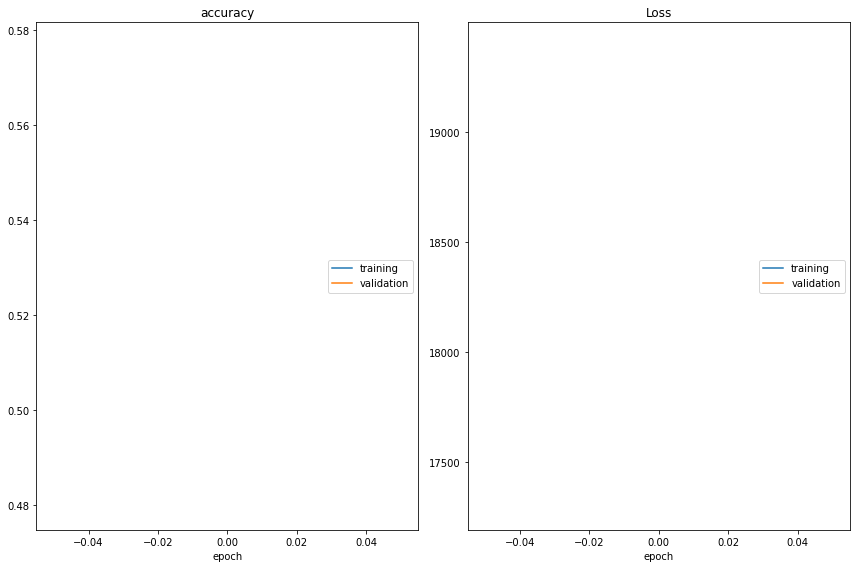

accuracy
	training         	 (min:    0.480, max:    0.480, cur:    0.480)
	validation       	 (min:    0.577, max:    0.577, cur:    0.577)
Loss
	training         	 (min: 19392.994, max: 19392.994, cur: 19392.994)
	validation       	 (min: 17299.057, max: 17299.057, cur: 17299.057)
500/500 [==============================] - 910s 2s/step - loss: 19392.9941 - accuracy: 0.4796 - val_loss: 17299.0566 - val_accuracy: 0.5768
Epoch 2/50
155/500 [========>.....................] - ETA: 9:49 - loss: 19723.3008 - accuracy: 0.4910

KeyboardInterrupt: ignored

In [ ]:
correction.fit(trainGen.getDataIO(),
              validation_data=(testGen.getDataIO()),
              epochs=50,
              steps_per_epoch=500,
              validation_steps=200,
              workers=0,
              callbacks=[PlotLossesKerasTF()]
              )

In [ ]:
name_img_file = '/content/img/X/name_{}.png'.format(0)
arr_16 = imgToArray(name_img_file)
split_high_f, split_width_f = 16, 16
step_high_f, step_width_f = 8, 8
border_high_f, border_width_f = 0, 0

lst_block_img, size_r = splitArrayToBlock(arr_16, split_high_f, split_width_f, step_high_f, step_width_f, border_high_f, border_width_f)
del arr_16

In [ ]:
size_r

(672, 1024, 3)

In [ ]:
lst_block_img.shape

(10541, 16, 16, 3)

In [ ]:
correction_res = model_corection.getAutoencoderRescaling()

In [ ]:
correction_res.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Correction_rescale (InputLa  [(None, 16, 16, 3)]      0         
 yer)                                                            
                                                                 
 rescaling (Rescaling)       (None, 16, 16, 3)         0         
                                                                 
 model_2 (Functional)        (None, 8, 8, 3)           390595    
                                                                 
 rescaling_1 (Rescaling)     (None, 8, 8, 3)           0         
                                                                 
Total params: 390,595
Trainable params: 390,595
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lst_block_img.max()

255

In [ ]:
lst_block_pred = correction_res.predict(lst_block_img)

In [ ]:
lst_block_pred.shape

(10541, 8, 8, 3)

In [ ]:
split_high_t, split_width_t = 8, 8
border_high_t, border_width_t = 4, 4
arr_img = np.array(joinBlockToArray(lst_block_pred, split_high_t, split_width_t, size_r, border_high_t, border_width_t), dtype=np.uint8)

In [ ]:
size_r

(672, 1024, 3)

In [ ]:
name = 'Y_0_comp0_res.png'
arrayToImg(arr_img, name)